In [230]:
import numpy as np
import healpy as hp
import healpy.rotator as hpr
import healpy.pixelfunc as hpf
import healpy.visufunc as hpv
import astropy as ap
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
 
# NSIDE=32
# m=np.arange(hp.nside2npix(NSIDE))
# print m.shape, m[0:10], m[m.shape[0]-10:m.shape[0]]
# hp.mollview(m, title="Test")

In [231]:
from HERA_MapMaking_VisibilitySimulation import DATA_PATH
print (DATA_PATH)

/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data


In [232]:
outfile_GSM_name = DATA_PATH + '/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits'
map_1 = fits.getdata(outfile_GSM_name).squeeze()

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -139.58774575294163 1084.8540418213663
STD of the Map32-wholeday without Fornax A: 30.5973010187


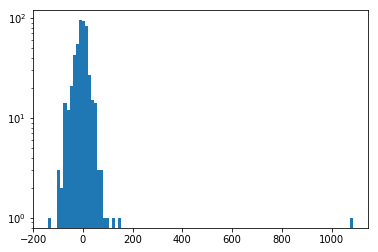

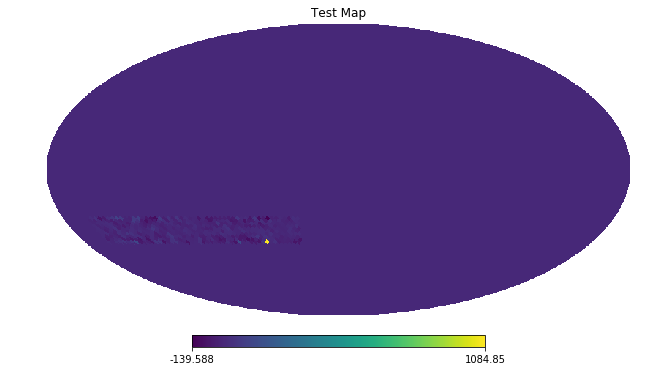

In [233]:
# hdul = fits.open('test.fits')
hdul = fits.open(outfile_GSM_name)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
map_fit = fits.getdata(outfile_GSM_name)
print('STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
plt.hist(map_fit[np.abs(map_fit) > 10.**(-5)],bins=100, log=True)
hdul.close()
hp.mollview(map_fit, nest=True, title="Test Map")

In [234]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_32 = fits.getdata(outfile_GSM_name).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[np.argsort(ww_solution_whole_32)[-40:]]))





Bright_Pixels_Data: [[-35.68533471 -25.94447977 -30.         -32.7971683  -32.7971683
  -32.7971683  -27.27961274 -27.27961274 -30.         -31.38816646
  -25.94447977 -28.63098984 -32.7971683  -37.16889966 -34.22886633
  -28.63098984 -32.7971683  -32.7971683  -31.38816646 -27.27961274
  -30.         -27.27961274 -35.68533471 -30.         -32.7971683
  -30.         -31.38816646 -31.38816646 -31.38816646 -32.7971683
  -32.7971683  -27.27961274 -31.38816646 -35.68533471 -35.68533471
  -24.62431835 -27.27961274 -31.38816646 -24.62431835 -35.68533471
  -30.         -24.62431835 -31.38816646 -31.38816646 -34.22886633
  -30.         -24.62431835 -32.7971683  -34.22886633 -31.38816646
  -30.         -31.38816646 -28.63098984 -24.62431835 -34.22886633
  -32.7971683  -37.16889966 -28.63098984 -27.27961274 -27.27961274
  -25.94447977 -27.27961274 -31.38816646 -31.38816646 -28.63098984
  -34.22886633 -31.38816646 -27.27961274 -32.7971683  -24.62431835
  -37.16889966 -25.94447977 -25.94447977 -25.

80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


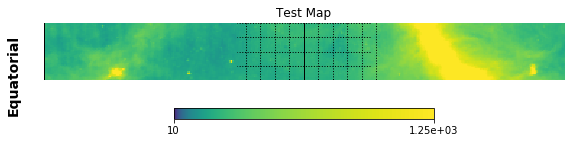

In [235]:
hp.cartview(testmap, title="Test Map", norm='log', min=10, max=1250, coord='C', latra=[-50,-10],xsize=360, nest=True)
hp.graticule(dpar=10,dmer=10)

In [236]:
filenames_32 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [237]:
filenames_64 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [238]:
filenames_32_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [239]:
filenames_64_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [240]:
filenames_32_415 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [241]:
filenames_64_415 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [242]:
filenames_64_415[0].split('/')[-1]

'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt658-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits'

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 68.9714160121
>>>>>>>> Maximum in the Map: 2589.44250758
>>>>>>>> Number of Valid Pixels: 397
110.1074MHz
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-114.79-gW-0.048978-114.7949MHz-dipole-nubl990-nt1567-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-wholeday without Fornax A: 69.010369864
>>>>>>>> Maximum in the Map: 3074.09060525
>>>>>>>> Number of Valid Pixels: 397
114.7949MHz
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-

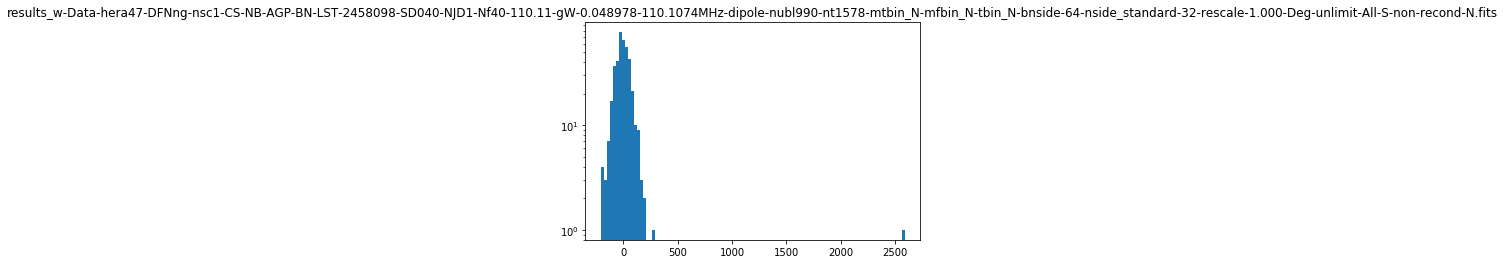

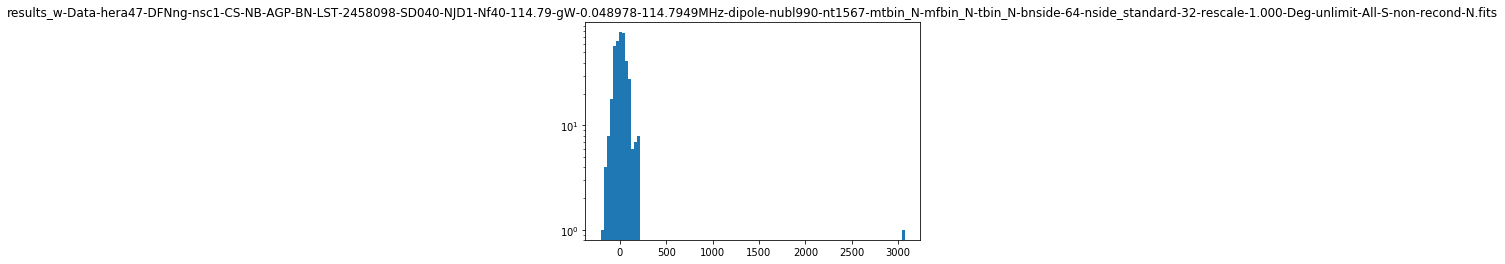

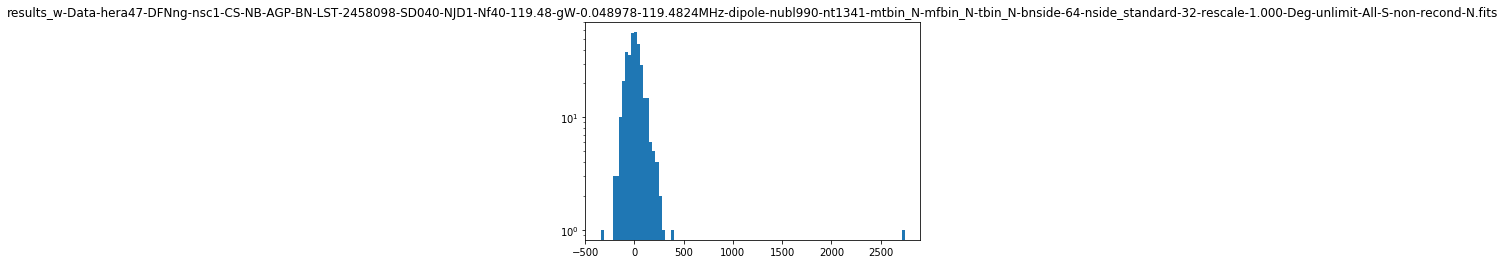

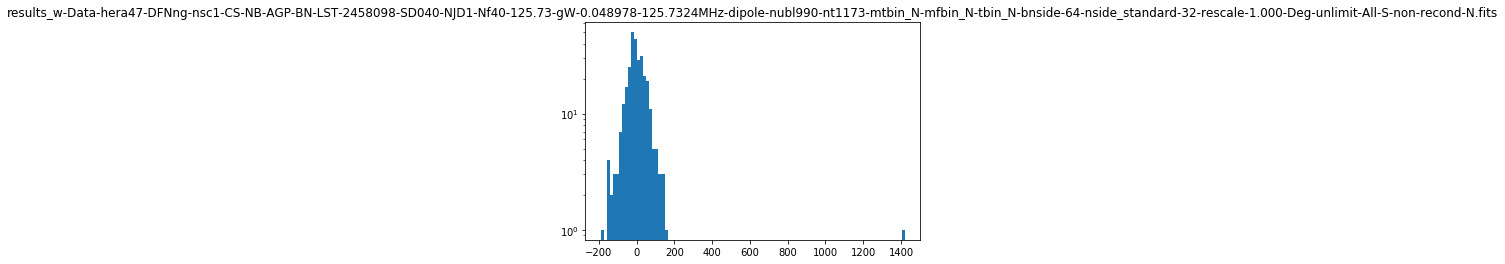

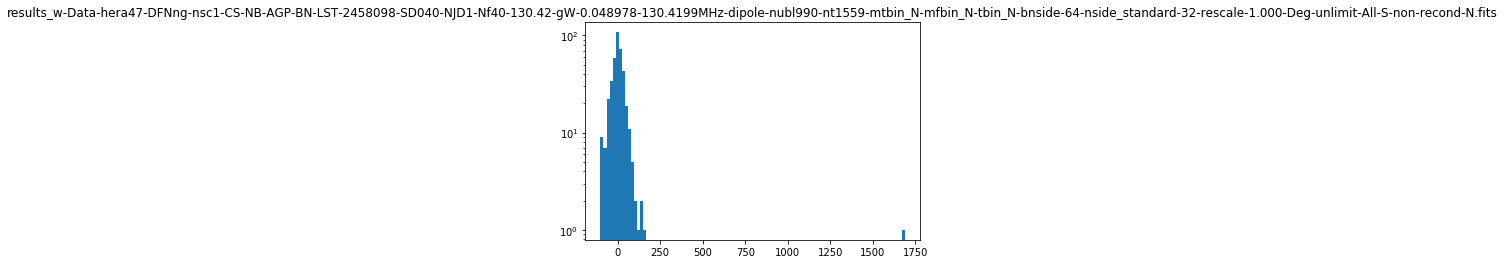

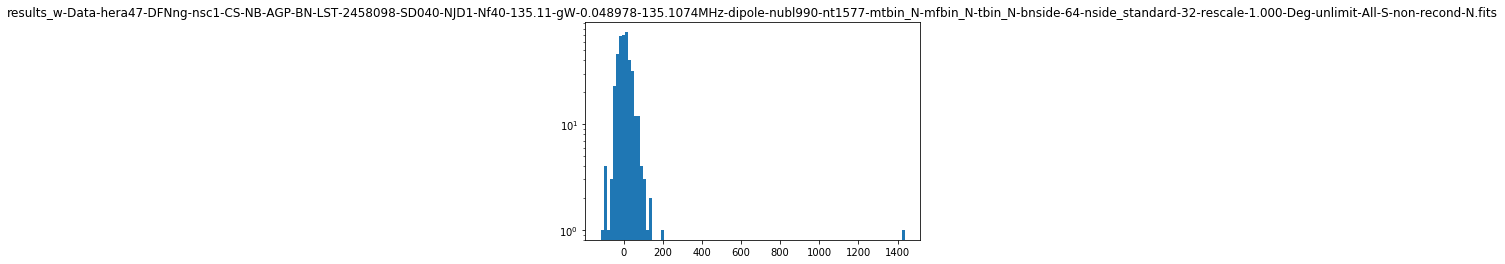

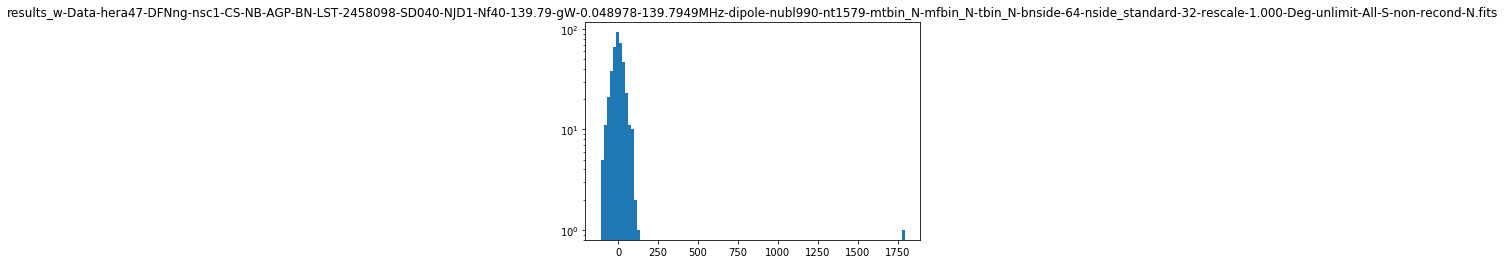

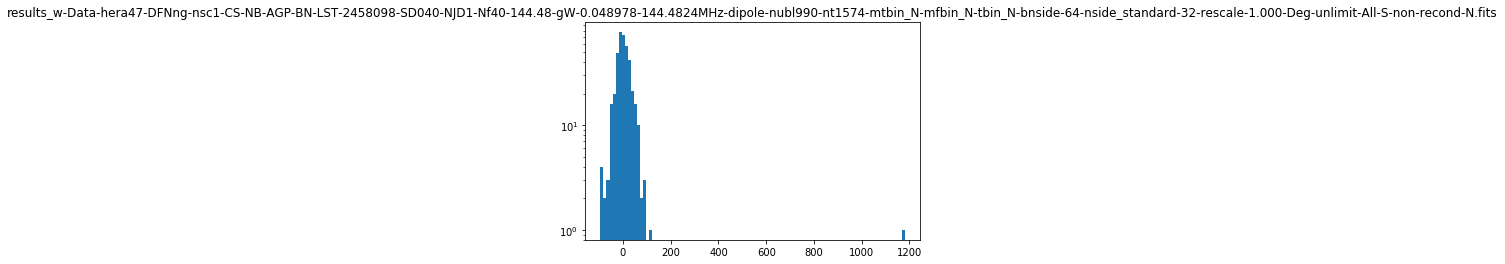

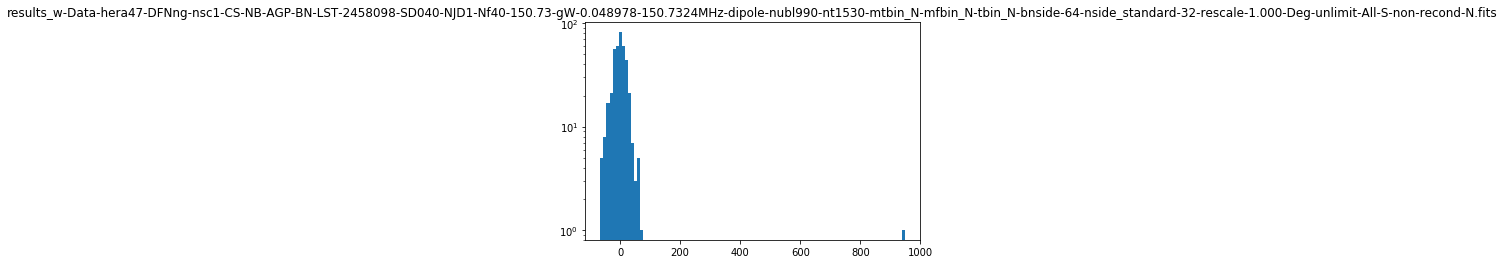

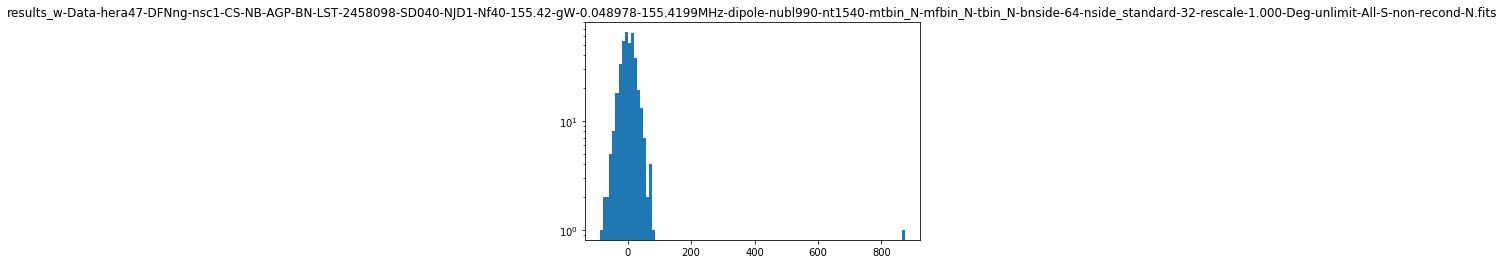

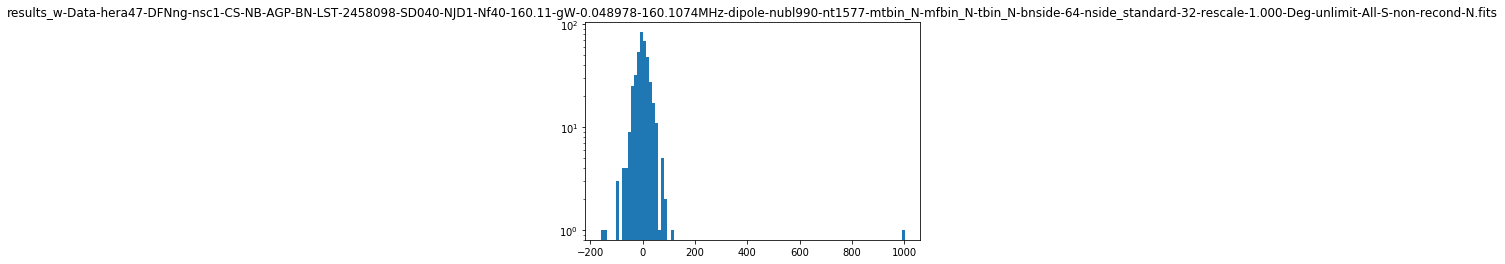

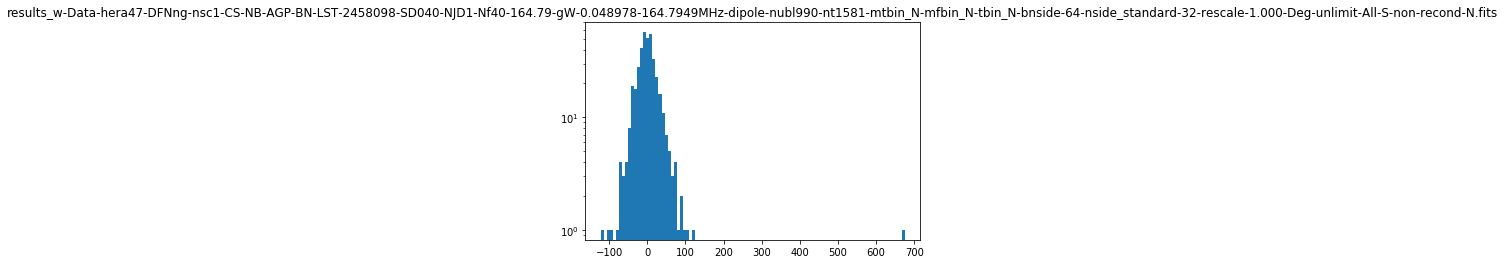

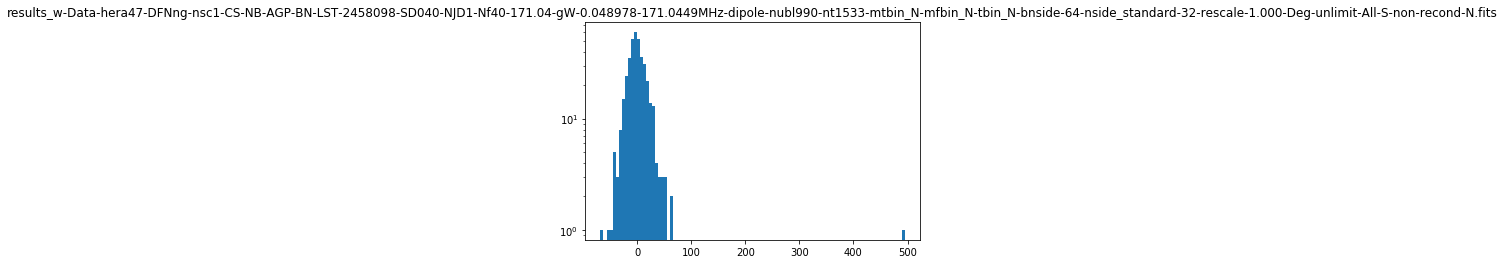

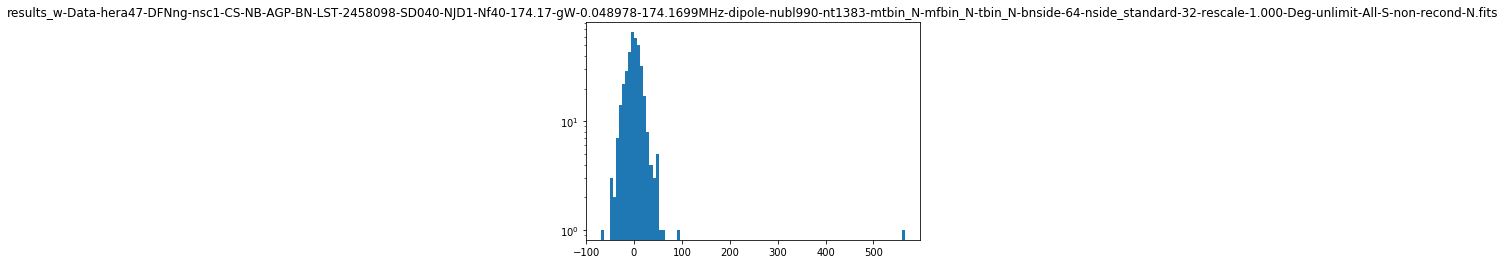

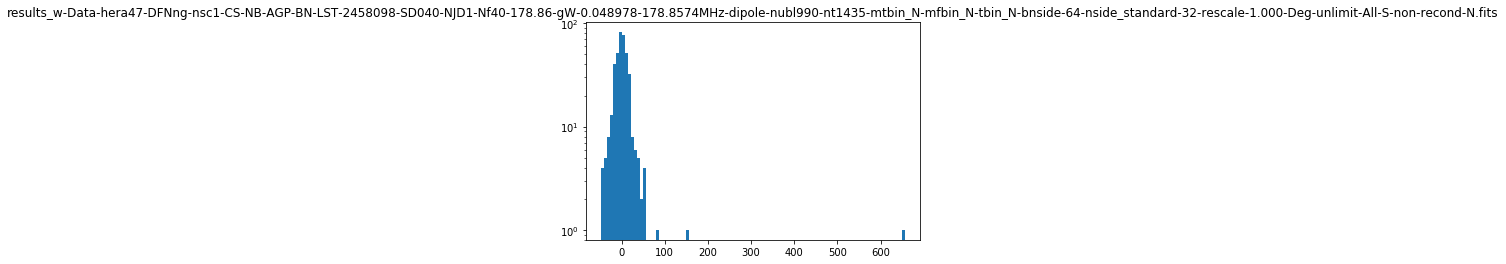

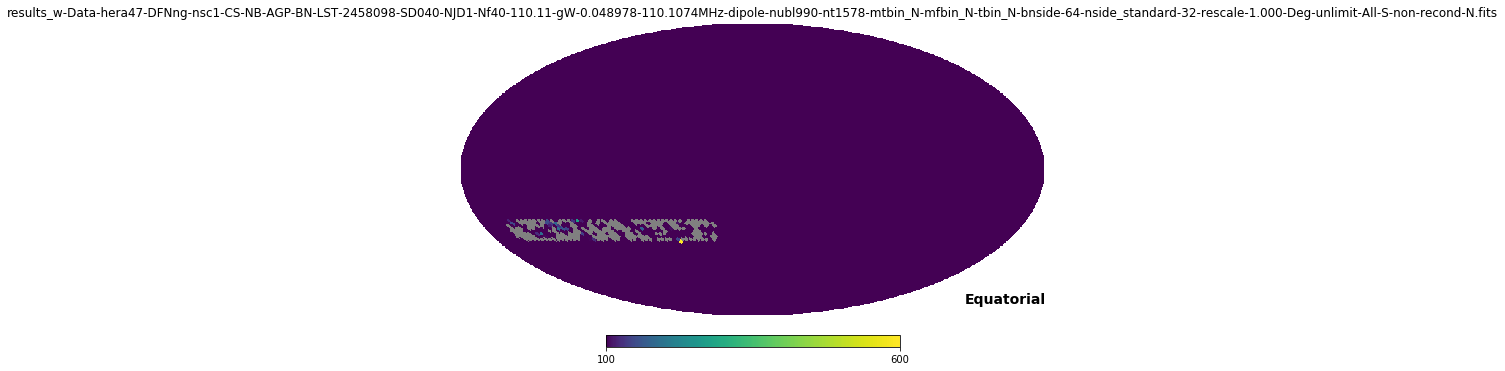

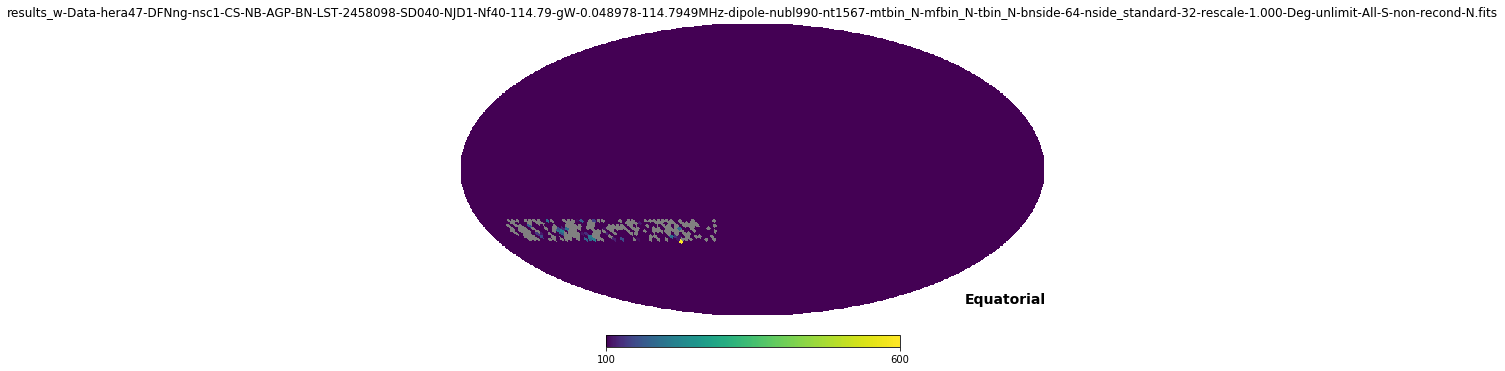

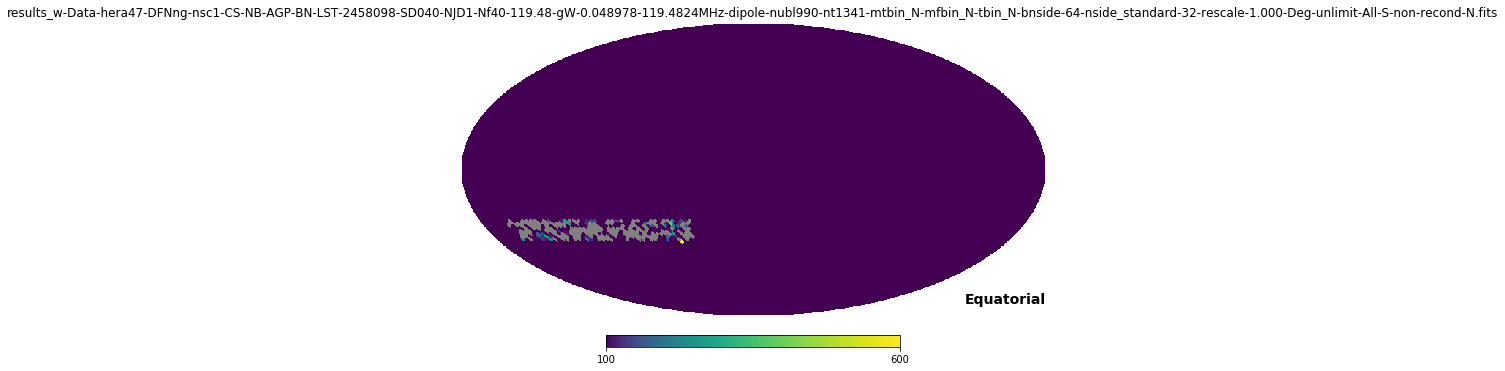

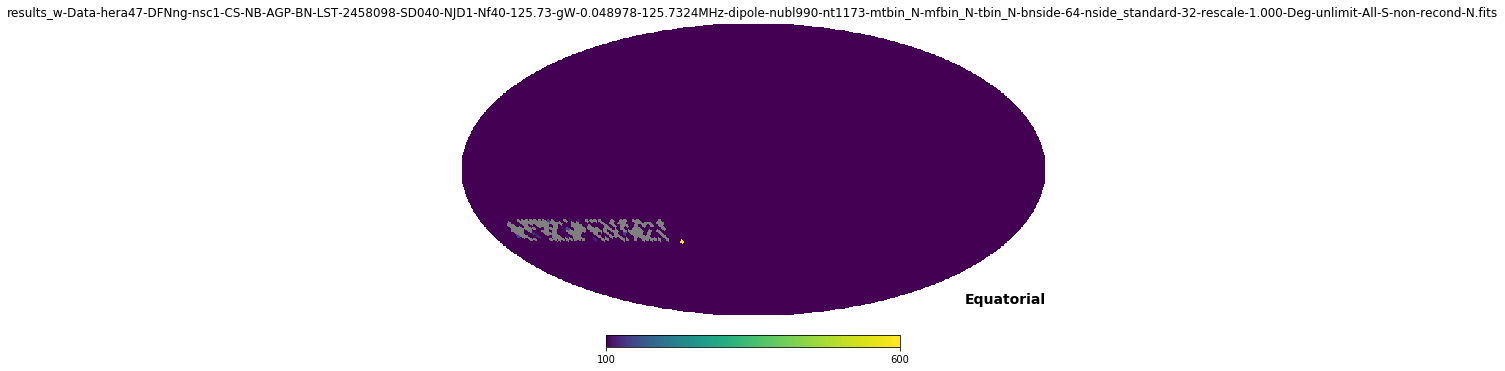

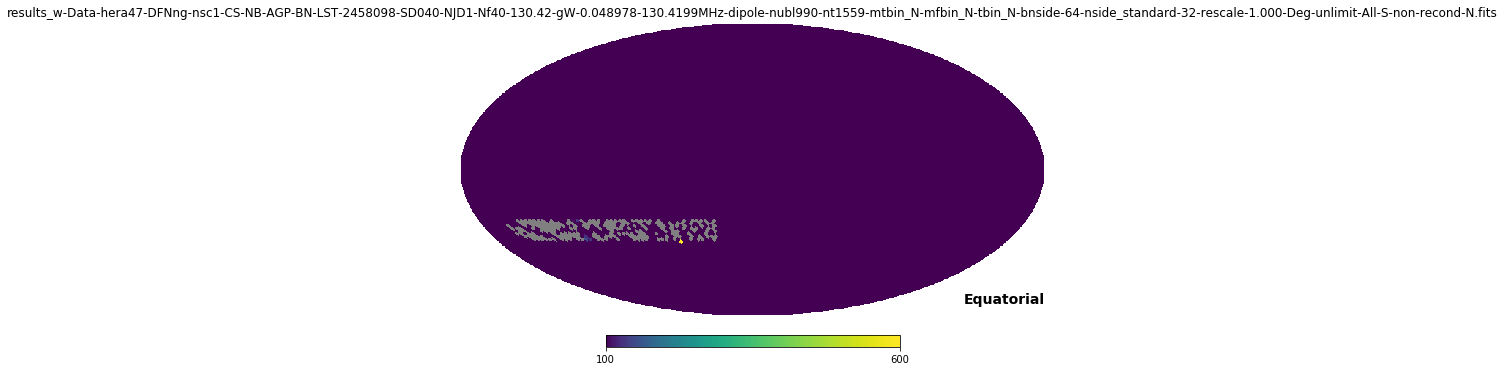

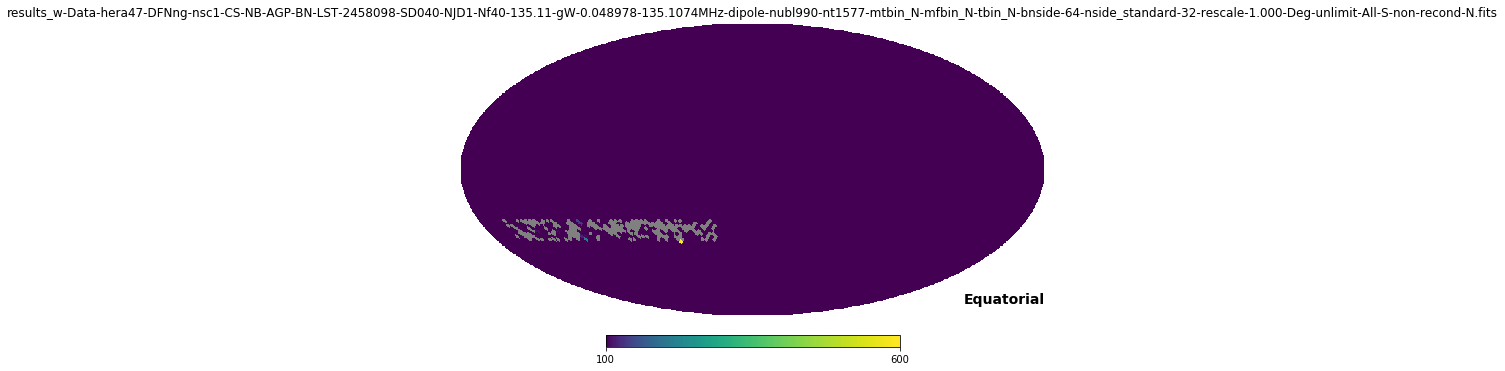

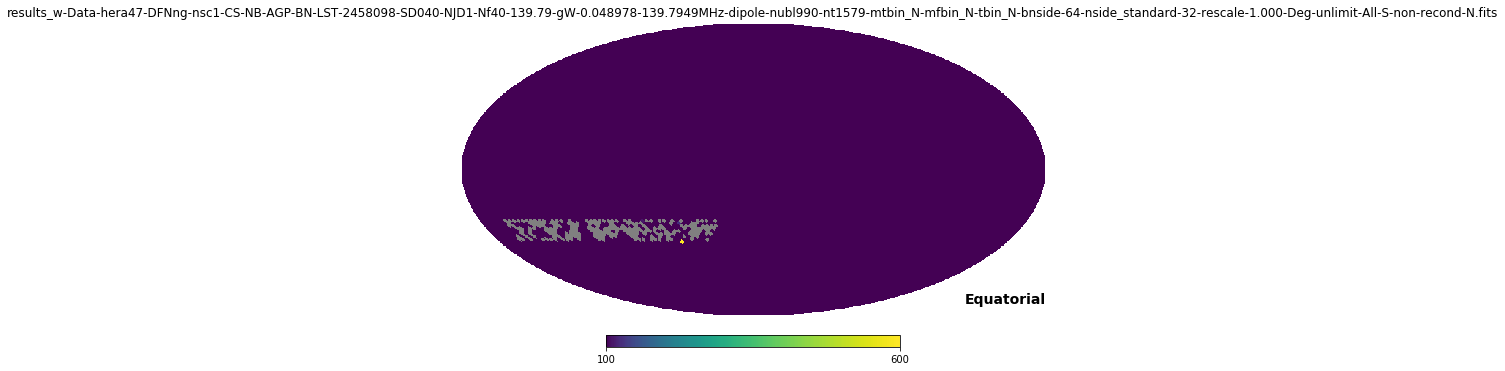

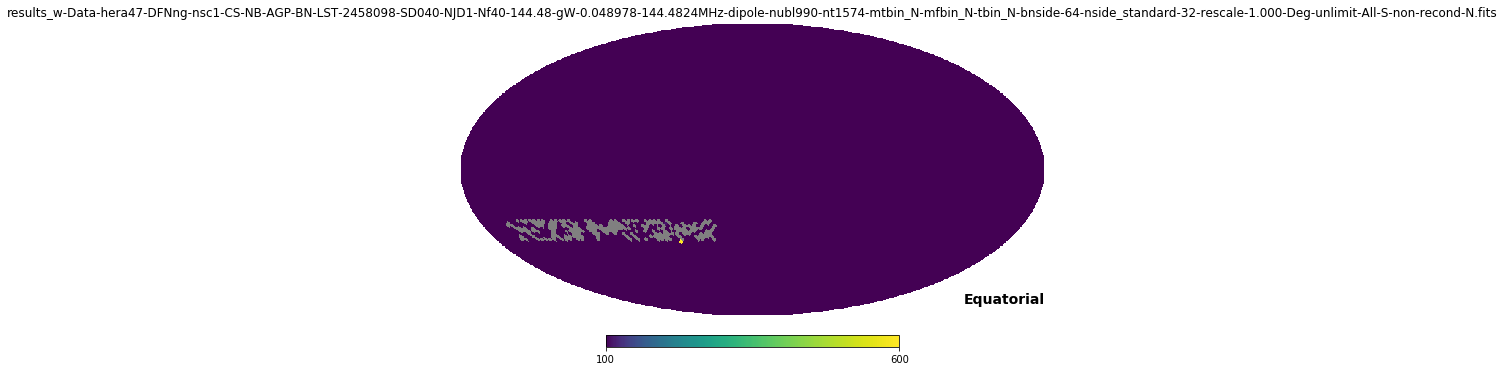

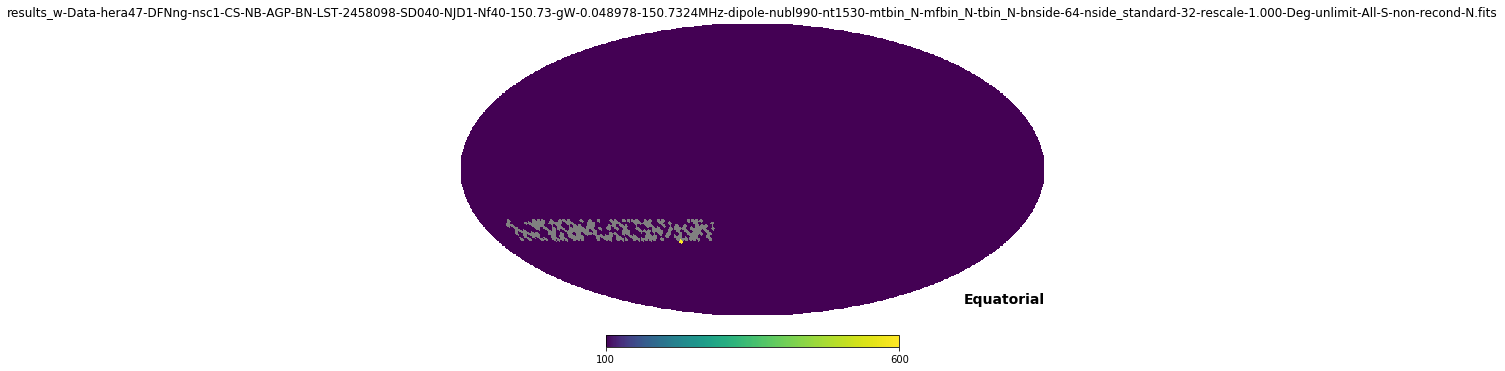

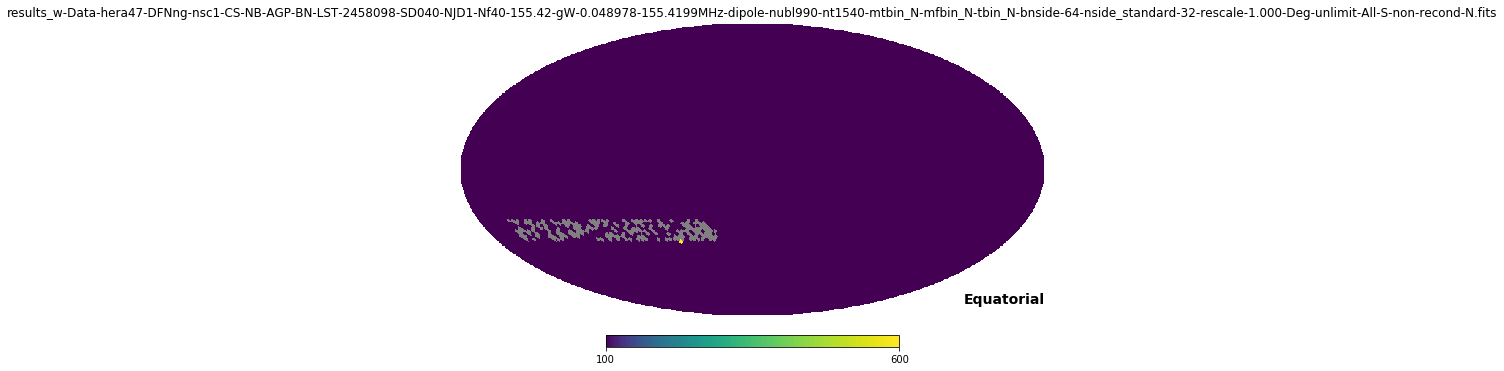

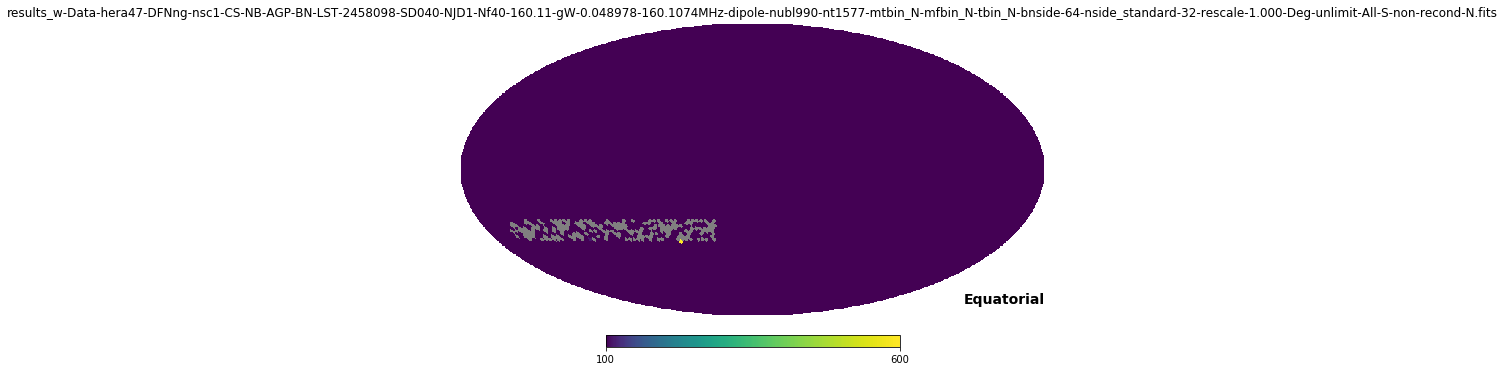

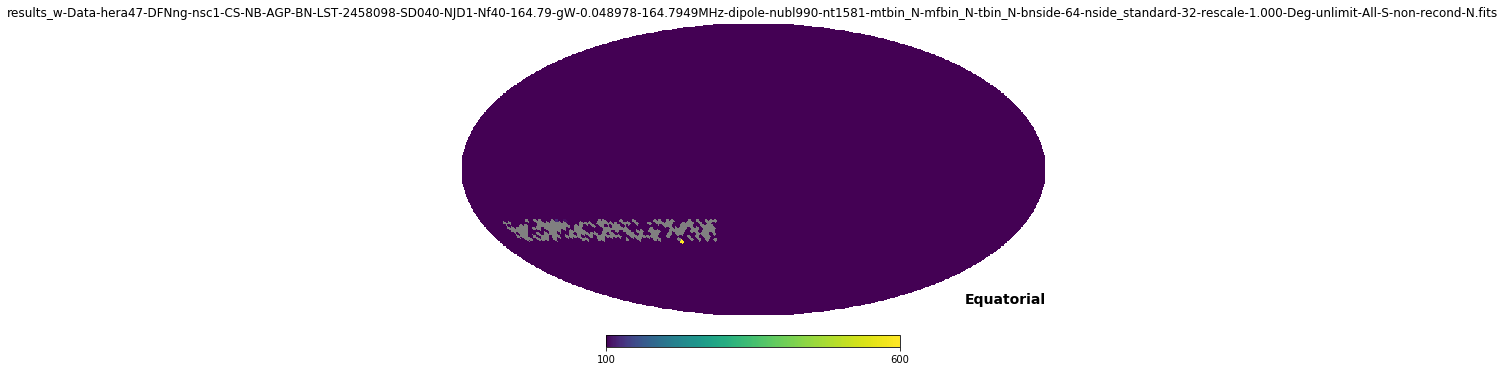

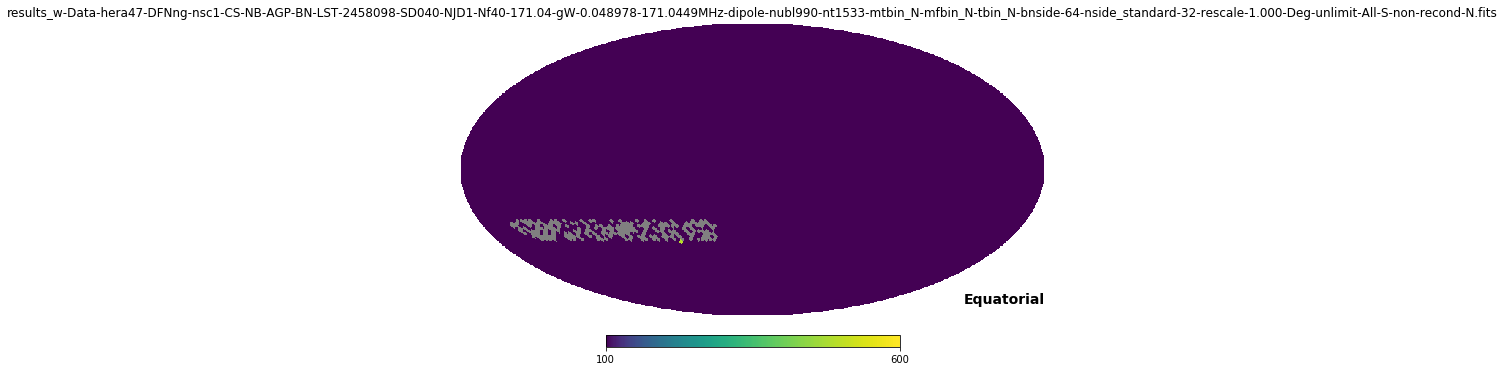

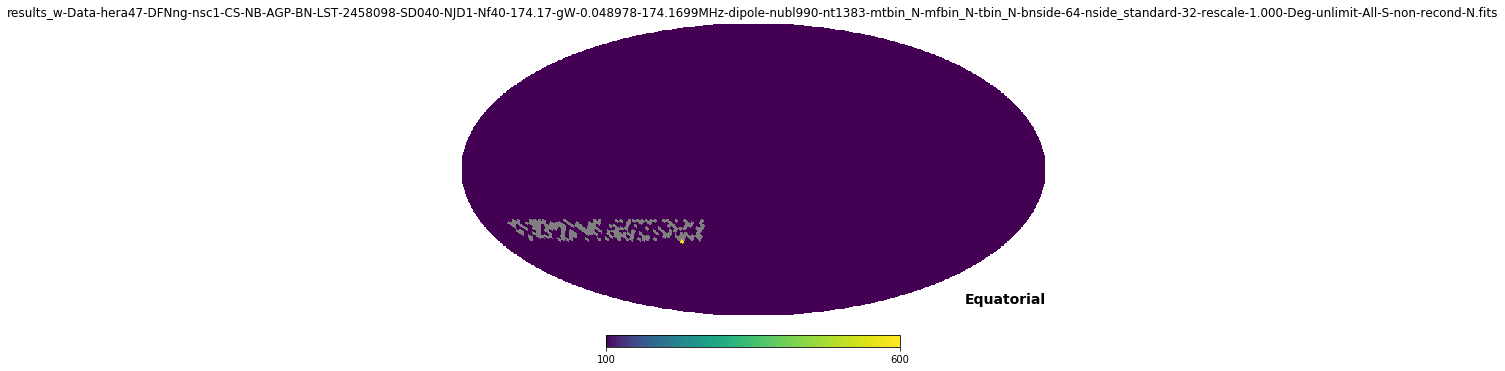

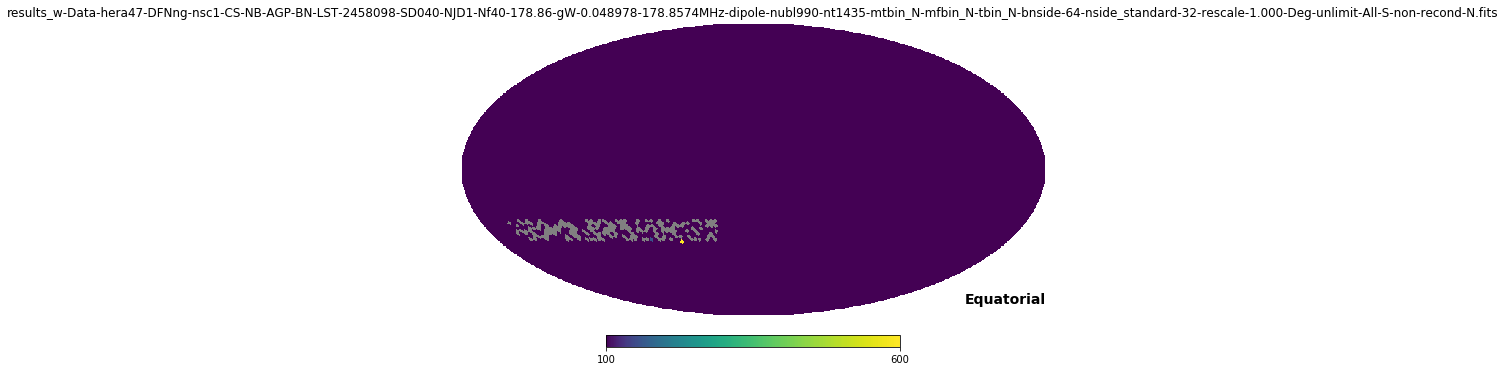

In [631]:
maps_mfreq = []
freqs_common = []
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 350:
        maps_mfreq.append(map_fit)
        for string_piece in name.split('-'):
            if 'MHz' in string_piece:
                freqs_common.append(float(string_piece[:-3]))
                print(string_piece)
    
    plt.figure(10000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(50000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()
    

In [662]:
maps_mfreq_32 = []
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 350.:
        maps_mfreq_32.append(map_fit)
        
maps_mfreq_32 = np.array(maps_mfreq_32)
commom_vp_mask_32 = np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32 = maps_mfreq_32[:, commom_vp_mask_32]
print('maps_mfreq_32 shape: {}'.format(maps_mfreq_32.shape))
print('maps_mfreq_common_32 shape: {}'.format(maps_mfreq_common_32.shape))
print('Number of Common Valid Pixels-32: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32.T)
maps_mfreq_common_32_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_eigValues =  pca.explained_variance_
# maps_mfreq_common_32_eigValues = pca.singular_values_
maps_mfreq_common_32_eigVectors = pca.components_
maps_mfreq_common_32_newspace = pca.fit_transform(maps_mfreq_common_32.T)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_newspace.shape))
print('Maps32_Common_NewSpace: {}\n'.format(maps_mfreq_common_32_newspace))

maps_mfreq_common_32_reconstruct = np.dot(maps_mfreq_common_32_newspace, maps_mfreq_common_32_eigVectors).T
print('Shape of maps_mfreq_common_32_reconstruct:{}\n'.format(maps_mfreq_common_32_reconstruct.shape))
Discrepancy_reconstruct = maps_mfreq_common_32 - maps_mfreq_common_32_reconstruct
Discrepancy_reconstruct_ratio = np.linalg.norm(Discrepancy_reconstruct, axis=1) / np.linalg.norm(maps_mfreq_common_32, axis=1)
print('Discrepancy_reconstruct_ratio: {}\n'.format(Discrepancy_reconstruct_ratio))

ai = np.ones_like(maps_mfreq_common_32_newspace)
Discrepancy_reconstruct_square = np.corrcoef(maps_mfreq_common_32)
for id_pix in range(maps_mfreq_common_32.shape[1]):
    #Discrepancy_reconstruct_square = np.cov(Discrepancy_reconstruct[:, id_pix])
    PtNiPi = np.linalg.inv((maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square))).dot(maps_mfreq_common_32_eigVectors.T))
    PtNi = maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square))
    ai[id_pix] = PtNiPi.dot(PtNi.dot(maps_mfreq_common_32[:, id_pix]))
maps_mfreq_common_32_reconstruct_fit = np.dot(ai, maps_mfreq_common_32_eigVectors).T
print('Shape of maps_mfreq_common_32_reconstruct_fit:{}\n'.format(maps_mfreq_common_32_reconstruct_fit.shape))
Discrepancy_reconstruct_fit = maps_mfreq_common_32 - maps_mfreq_common_32_reconstruct_fit
Discrepancy_reconstruct_ratio_fit = np.linalg.norm(Discrepancy_reconstruct_fit, axis=1) / np.linalg.norm(maps_mfreq_common_32, axis=1)
print('Discrepancy_reconstruct_ratio_fit: {}\n'.format(Discrepancy_reconstruct_ratio_fit))
    
from scipy.interpolate import interp1d
from scipy import interpolate
inter_mfreq_cubic = {}
inter_mfreq_cubic_eigVectors = np.ones_like(maps_mfreq_common_32_eigVectors)
freq_shift = 0.
for id_pc in range(maps_mfreq_common_32_eigVectors.shape[0]):
    inter_mfreq_cubic[id_pc] = interp1d(np.log(freqs_common), maps_mfreq_common_32_eigVectors[id_pc], kind='cubic', fill_value='extrapolate')
    #inter_mfreq_cubic[id_pc] = interpolate.splrep(6. + np.log10(freqs_common), maps_mfreq_common_32_eigVectors[id_pc], s=0)
    inter_mfreq_cubic_eigVectors[id_pc] = inter_mfreq_cubic[id_pc](np.log(np.array(freqs_common) + freq_shift))
discrepancy_cubicspline_fit = maps_mfreq_common_32_eigVectors - inter_mfreq_cubic_eigVectors
discrepancy_cubicspline_fit_ratio = discrepancy_cubicspline_fit / maps_mfreq_common_32_eigVectors
print('discrepancy_cubicspline_fit_ratio:\n {}\n'.format(discrepancy_cubicspline_fit_ratio))
    
id_freq = 7
id_pc = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_eigVectors, axis=1)[:, -10:]))
print('Top pixels {0}th principle component: \n{1}\n'.format(id_pc, np.argsort(maps_mfreq_common_32_newspace[:, id_pc])[-number_to_show:]))
print(np.sort(maps_mfreq_common_32[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_newspace[:, id_pc])[-number_to_show:])

>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 349
>>>>>>>> Number of Valid Pixels: 297
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 401
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 393
>>>>>>>> Number of Valid Pixels: 389
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 401
>>>>>>>> Number of Valid Pixels: 389
>>>>>>>> Number of Valid Pixels: 369
>>>>>>>> Number of Valid Pixels: 393
maps_mfreq_32 shape: (13, 12288)
maps_mfreq_common_32 shape: (13, 365)
Number of Common Valid Pixels-32: 365
EigenValues: 
[89719.54345044  3158.51960562  2168.09405739  1190.49785899
   911.29054457   858.26992735   698.31339828   634.03708261
   529.26784955   441.08668923   374.89714943   277.21542877
   193.53679911]

EigenValuesRatio: 
[0.88695492 0.03122469 0.02143348 0.0117691  0.00900889 0.00848474
 0.00690343 0.006268   0.00523227 0

In [632]:
len(freqs_common)

13

In [597]:
# cor_mat_32_2 = np.corrcoef(maps_mfreq_common_32)
# eig_vals_32_2, eig_vecs_32_2 = np.linalg.eig(cor_mat_32_2)
# u,s,v = np.linalg.svd(cor_mat_32_2)
# print('shape of cor_mat_32_2: {}\n'.format(cor_mat_32_2.shape))
# print('eig_vals_32_2: {}'.format(eig_vals_32_2))
# print(np.linalg.norm((u - maps_mfreq_common_32_eigVectors)[0]))
# print(np.linalg.norm((u - eig_vecs_32_2), axis=1))
# print(np.linalg.norm((maps_mfreq_common_32_eigVectors - eig_vecs_32_2), axis=1))
# print(np.linalg.norm(maps_mfreq_common_32_eigVectors, axis=1))
# print(np.linalg.norm(u, axis=1))
# print(np.linalg.norm(eig_vecs_32_2, axis=1))
# print(eig_vecs_32_2.dot(cor_mat_32_2.dot(eig_vecs_32_2.T)))
# print(u.dot(cor_mat_32_2.dot(u.T)))
# print(maps_mfreq_common_32_eigVectors.dot(np.cov(maps_mfreq_common_32).dot(maps_mfreq_common_32_eigVectors.T)))

shape of cor_mat_32_2: (13, 13)

eig_vals_32_2: [10.72977615  0.40845055  0.32220783  0.26734661  0.27575389  0.20223085
  0.16480157  0.07398229  0.07914186  0.13876968  0.09883662  0.12700684
  0.11169527]
1.2186158601732862
[1.0899909  1.08714971 1.25204016 1.00100302 1.15107919 1.22741476
 1.68750605 0.68995905 1.23990263 0.24805691 0.62527073 1.46692535
 1.66235948]
[1.40739451 1.18050903 1.46275382 1.68277537 1.27304837 1.18989214
 1.56147767 1.30842455 1.48902279 1.46052828 1.34751824 1.51578114
 1.39050806]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[ 0.28793078 -0.0365058  -0.02806156 -0.05706093 -0.06378527 -0.02111204
   0.01566668  0.00873619  0.01731274 -0.01136558 -0.00620912 -0.0417942
  -0.02919827]
 [-0.0365058   0.29679224 -0.26788655 -0.46462063 -0.35029278  0.44956666
   0.20590534 -0.21298891  0.33068956 -0.24285048 -0.55905576 -0.31108057
   0.04381644]
 [-0.02806156 -0.26788655  0.87

In [577]:
0.88695492 / 0.03122469
10.72977615 /  0.40845055

26.26946187243474

In [608]:
ai = np.ones_like(maps_mfreq_common_32_newspace)
Discrepancy_reconstruct_square = np.corrcoef(maps_mfreq_common_32)
for id_pix in range(maps_mfreq_common_32.shape[1]):
    #Discrepancy_reconstruct_square = np.cov(Discrepancy_reconstruct[:, id_pix])
    PtNiPi = np.linalg.inv((maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square))).dot(maps_mfreq_common_32_eigVectors.T))
    PtNi = maps_mfreq_common_32_eigVectors.dot(np.linalg.inv(Discrepancy_reconstruct_square))
    ai[id_pix] = PtNiPi.dot(PtNi.dot(maps_mfreq_common_32[:, id_pix]))

In [613]:
((ai - maps_mfreq_common_32_newspace) / maps_mfreq_common_32_newspace)[0]
# maps_mfreq_common_32_newspace[0]

array([-0.69394636,  0.10537061, -0.02981259,  0.09471664, -0.21108938,
        0.01579938, -0.09899085,  0.02447996, -0.03314082, -0.01513463,
       -5.29295121, -0.11862364,  0.04068494])

In [570]:
Discrepancy_reconstruct[:, id_pix]

array([ 2.46419575, 17.36395756,  4.30098112,  9.07202203,  4.77130026,
        4.3361605 ,  0.48721811,  4.32390378,  2.84415155,  2.82355393,
        1.43460426,  1.99727347,  3.51015249])

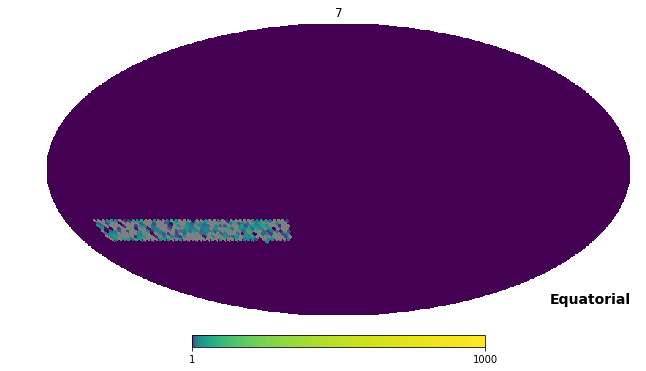

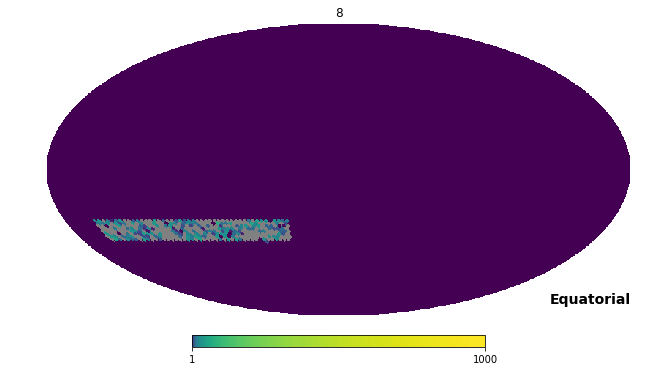

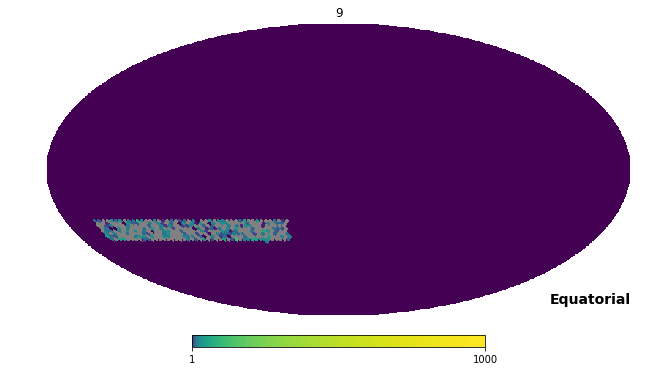

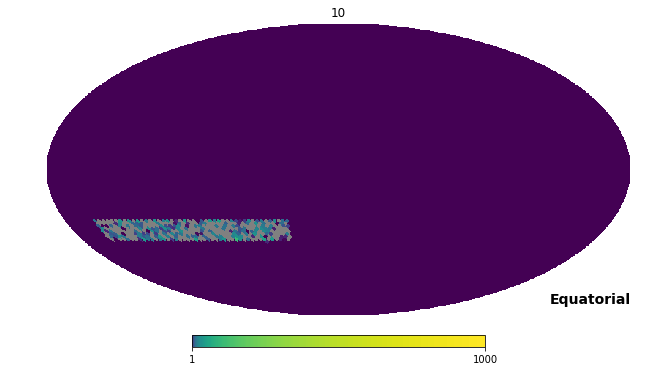

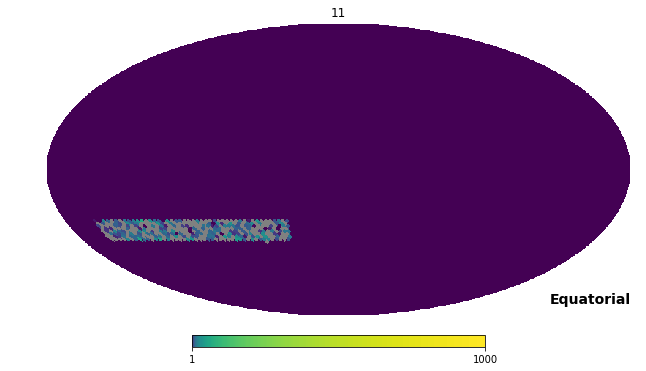

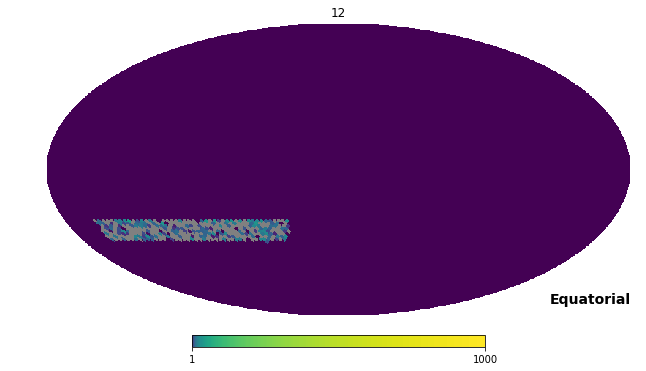

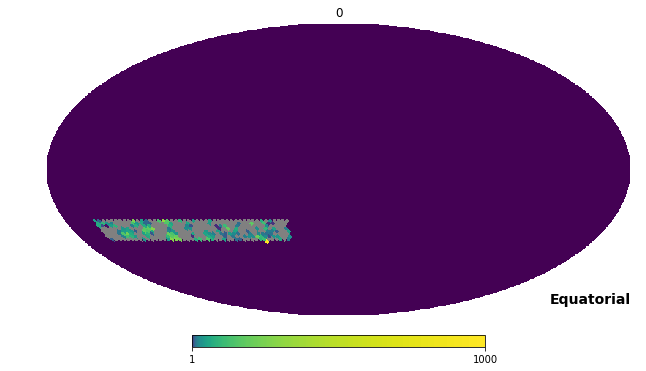

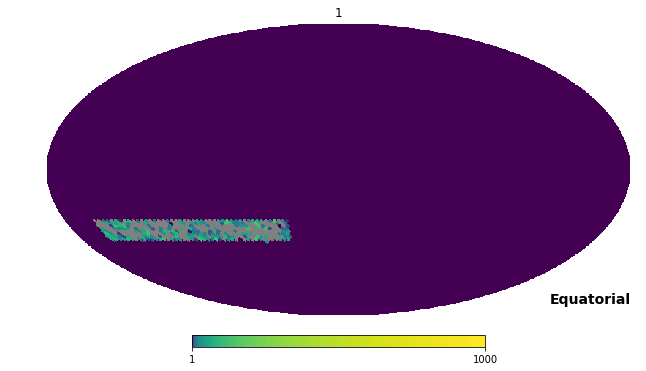

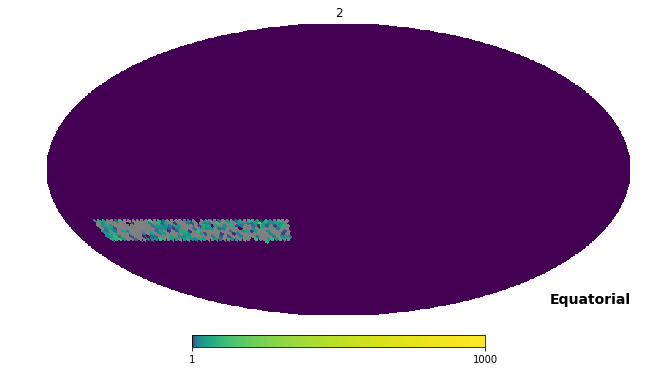

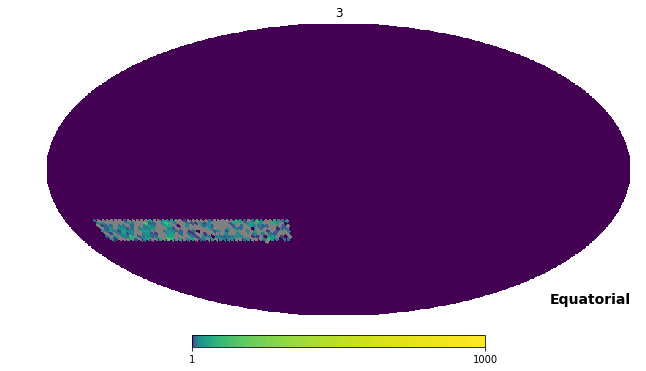

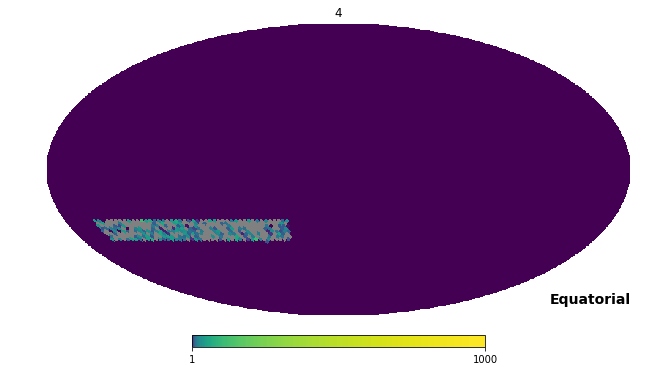

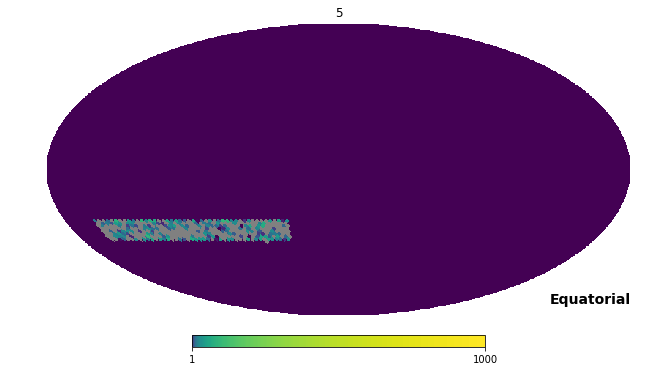

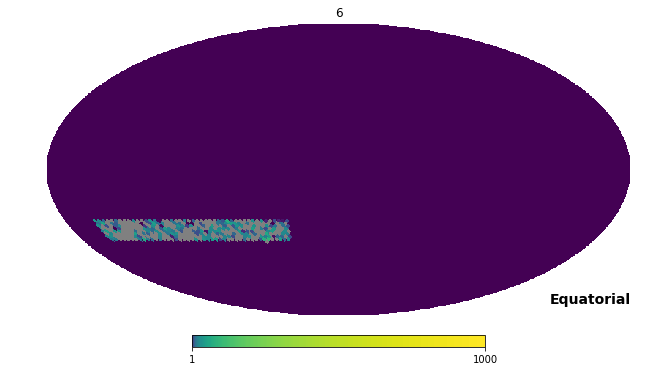

In [562]:
maps_mfreq_common_32_eigVectors_full = np.ones_like(maps_mfreq_32) * 10**(-5)
maps_mfreq_common_32_eigVectors_full[:, commom_vp_mask_32] = maps_mfreq_common_32_newspace.T
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=1, max=1000, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()

In [518]:
maps_mfreq_32 = []
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 350.:
        maps_mfreq_32.append(map_fit)
        
maps_mfreq_32 = np.array(maps_mfreq_32)
commom_vp_mask_32 = np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32 = maps_mfreq_32[:, commom_vp_mask_32]
print('maps_mfreq_32 shape: {}'.format(maps_mfreq_32.shape))
print('maps_mfreq_common_32 shape: {}'.format(maps_mfreq_common_32.shape))
print('Number of Common Valid Pixels-32: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32)
maps_mfreq_common_32_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_eigValues = pca.singular_values_
maps_mfreq_common_32_eigVectors = pca.components_
maps_mfreq_common_32_newspace = pca.fit_transform(maps_mfreq_common_32)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_newspace.shape))
print('Maps32_Common_NewSpace: {}'.format(maps_mfreq_common_32_newspace))

id_freq = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_newspace[id_freq].dot(maps_mfreq_common_32_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_32[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_newspace[id_freq].dot(maps_mfreq_common_32_eigVectors))[-number_to_show:])

>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 349
>>>>>>>> Number of Valid Pixels: 297
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 401
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 393
>>>>>>>> Number of Valid Pixels: 389
>>>>>>>> Number of Valid Pixels: 397
>>>>>>>> Number of Valid Pixels: 401
>>>>>>>> Number of Valid Pixels: 389
>>>>>>>> Number of Valid Pixels: 369
>>>>>>>> Number of Valid Pixels: 393
maps_mfreq_32 shape: (13, 12288)
maps_mfreq_common_32 shape: (13, 365)
Number of Common Valid Pixels-32: 365
EigenValues: 
[3.04739324e+03 1.08665728e+03 7.31766957e+02 6.22326050e+02
 5.65624861e+02 5.41089797e+02 4.96839380e+02 4.63938594e+02
 4.19939561e+02 3.73486714e+02 3.19786362e+02 2.66012535e+02
 4.45981243e-13]

EigenValuesRatio: 
[7.16898282e-01 9.11560981e-02 4.13376830e-02 2.98976121e-02
 2.46977574e-02 2.26016024e-02 1.90560360

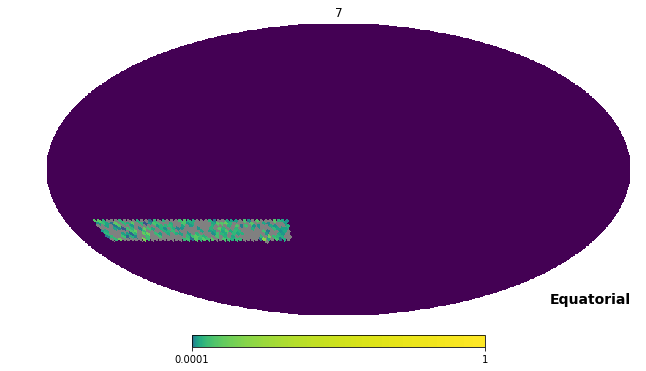

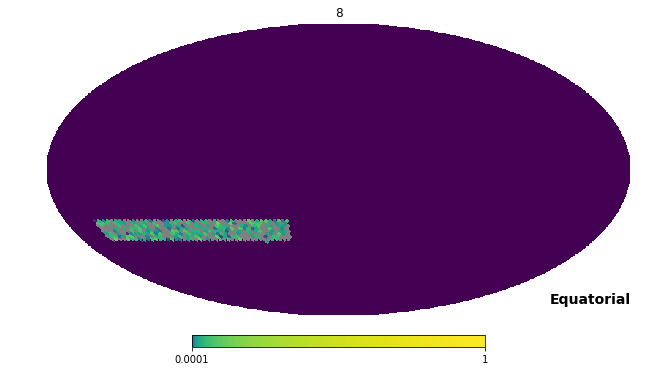

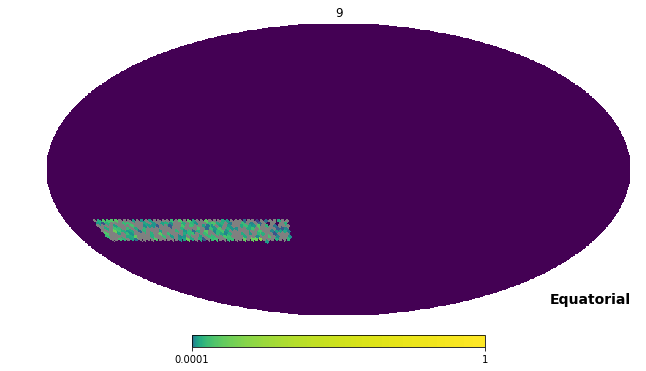

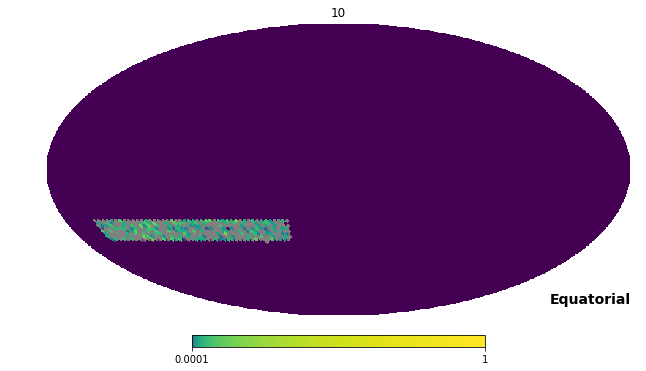

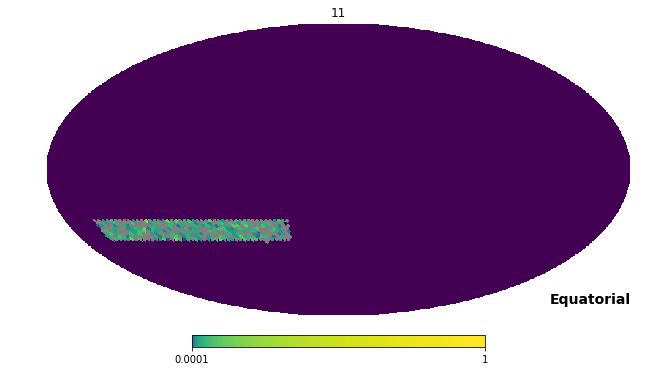

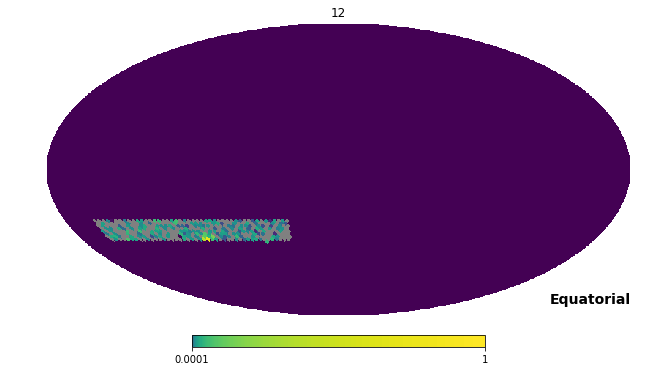

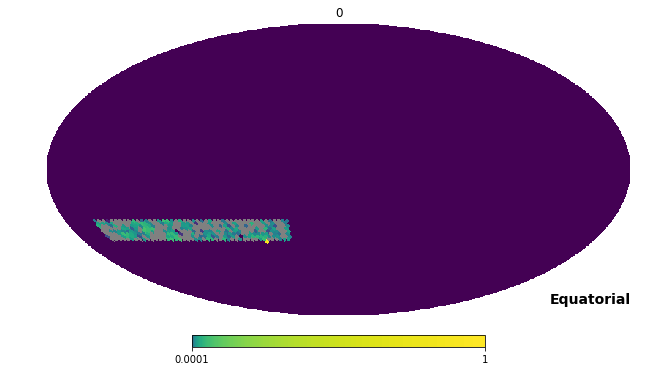

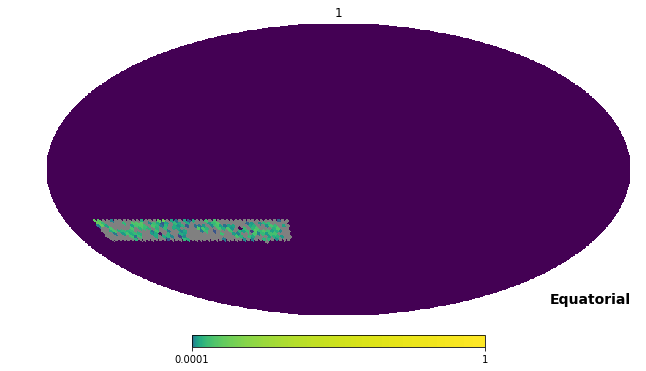

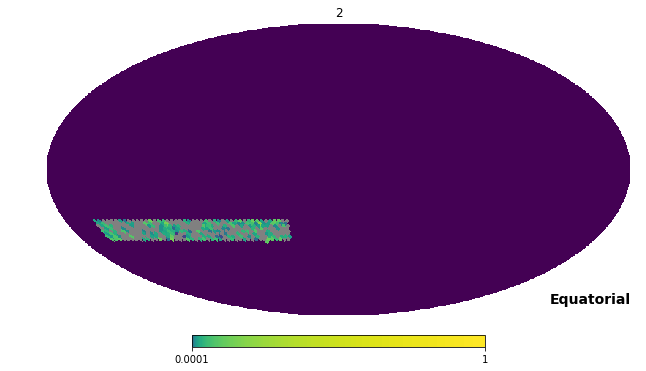

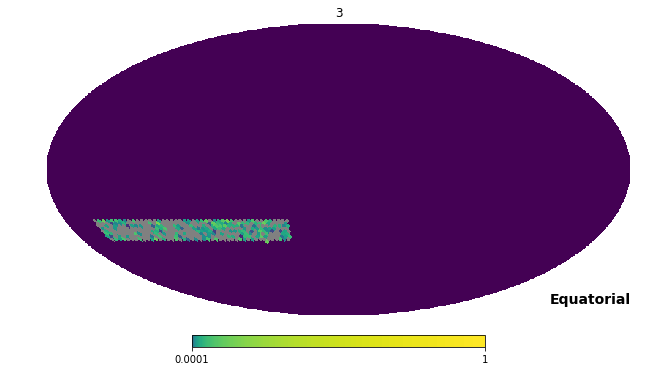

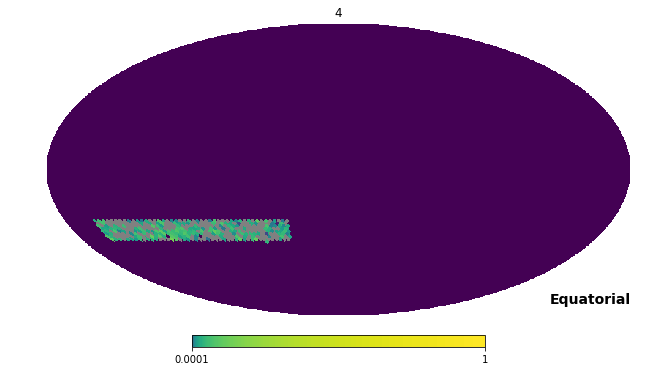

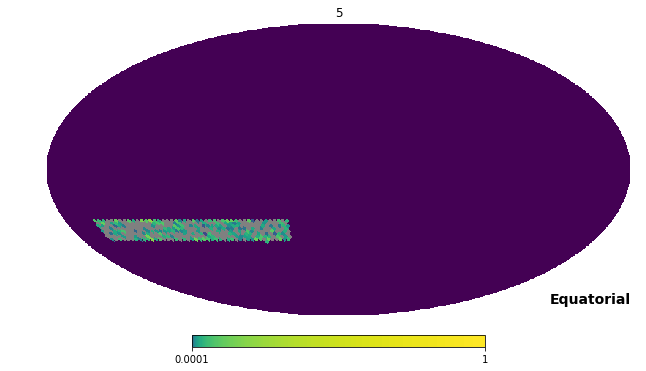

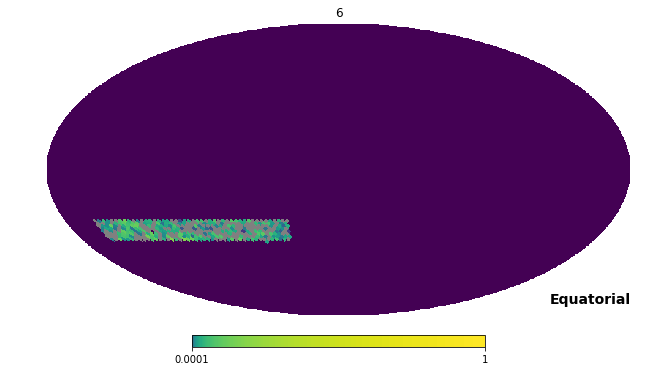

In [519]:
maps_mfreq_common_32_eigVectors_full = np.ones_like(maps_mfreq_32) * 10**(-5)
maps_mfreq_common_32_eigVectors_full[:, commom_vp_mask_32] = maps_mfreq_common_32_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-4), max=10.**(-0), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()

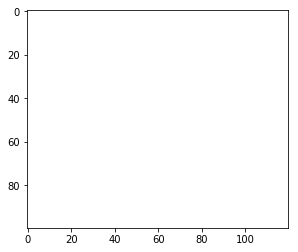

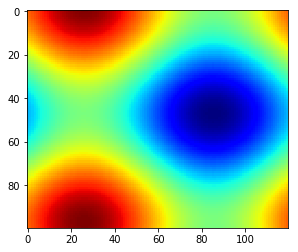

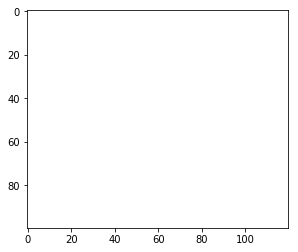

In [543]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

#!/usr/bin/env python
"""
An animated image
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), cmap=plt.get_cmap('jet'))

def updatefig(*args):
    global x,y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x,y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

#!/usr/bin/env python
"""
An animated image
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y))
#     im = plt.plot(x, label='{}'.format(i))
#     plt.title('The number {} plot.'.format(i))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
    repeat_delay=1000)

# ani.save('/Users/JianshuLi/Downloads/' + 'dynamic_images.mp4')


plt.show()

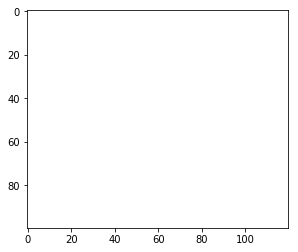

In [547]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
#     pullData = open("sampleText.txt","r").read()
#     dataArray = pullData.split('\n')
    i = i % 10
    xar = np.arange(i)
    yar = np.arange(i)**2
#     for id_data in range(i):
#         xar.append(id_data)
#         yar.append(id_data**2)
    ax1.clear()
    ax1.plot(xar,yar, label='{}'.format(i))
    ax1.legend(loc='best')
#     ax1.title('The number {} plot.'.format(i))
    
    
ani = animation.FuncAnimation(fig, animate, interval=100)
try:
    ani.save(DATA_PATH + '/../Output/dynamic_images_2.html')
except:
    print('Something get wrong when saving .html file')
try:
    ani.save(DATA_PATH + '/../Output/dynamic_images_2.mp4')
except:
    print('Necessary Modules such as ffmpeg have not been installed yet')
# ani = animation.ArtistAnimation(fig, animate, interval=100)
# ani.save('/Users/JianshuLi/Downloads/' + 'dynamic_images.mp4')
plt.show(block=False)

Necessary Modules such as ffmpeg have not been installed yet


In [406]:
# for ev in maps_mfreq_common_32_eigVectors:
#     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# print('Everything ok!')
# # maps_mfreq_common_32_eigVectors.dot(maps_mfreq_common_32_eigVectors.T)
# maps_mfreq_common_32_eigVectors.dot(np.cov(maps_mfreq_common_32.T).dot(maps_mfreq_common_32_eigVectors.T))
# # print(maps_mfreq_common_32_eigVectors.dot(cov_mat_32.dot(maps_mfreq_common_32_eigVectors.T)))
# from sklearn.preprocessing import StandardScaler
# maps_mfreq_common_std_32 = StandardScaler().fit_transform(maps_mfreq_common_32)
# cov_mat_32 = np.cov(maps_mfreq_common_std_32.T)

# eig_vals_32, eig_vecs_32 = np.linalg.eig(cov_mat_32)
# print('\nEigenvalues: {}'.format(-np.sort(-np.abs(eig_vals_32))[:20]))
# # for ev in eig_vecs_32:
# #     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# # print('Everything ok!')
# cor_mat_32_2 = np.corrcoef(maps_mfreq_common_32.T)
# eig_vals_32_2, eig_vecs_32_2 = np.linalg.eig(cor_mat_32_2)
# # for ev in eig_vecs_32_2:
# #     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# # print('Everything ok!')

# u,s,v = np.linalg.svd(maps_mfreq_common_std_32.T)
# print(u.shape)
# print(np.linalg.norm(u[10]))
# for ev in u:
#     np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# print('Everything ok!')
# # print(np.abs(eig_vals_32 - eig_vals_32_2))
# # print(np.abs(eig_vecs_32 - eig_vecs_32_2) / np.abs(eig_vecs_32))
# # print(eig_vals_32_2)

array([282, 231,  73, 347, 150, 200, 235, 338, 348,  97, 340, 343,  75,
       232, 349, 201, 337, 344, 303,  70])

In [263]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_32 = fits.getdata(filenames_32[13]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[np.argsort(ww_solution_whole_32)[-40:]]))




Bright_Pixels_Data: [[-30.         -31.38816646 -28.63098984 -34.22886633 -28.63098984
  -28.63098984 -30.         -31.38816646 -27.27961274 -28.63098984
  -28.63098984 -32.7971683  -34.22886633 -27.27961274 -25.94447977
  -27.27961274 -30.         -35.68533471 -32.7971683  -31.38816646
  -28.63098984 -30.         -32.7971683  -27.27961274 -25.94447977
  -30.         -35.68533471 -35.68533471 -35.68533471 -28.63098984
  -35.68533471 -30.         -30.         -25.94447977 -34.22886633
  -31.38816646 -31.38816646 -35.68533471 -27.27961274 -25.94447977
  -35.68533471 -34.22886633 -35.68533471 -27.27961274 -32.7971683
  -34.22886633 -34.22886633 -35.68533471 -28.63098984 -28.63098984
  -31.38816646 -27.27961274 -27.27961274 -31.38816646 -30.
  -31.38816646 -31.38816646 -30.         -32.7971683  -34.22886633
  -30.         -31.38816646 -27.27961274 -25.94447977 -30.
  -27.27961274 -34.22886633 -32.7971683  -25.94447977 -30.
  -32.7971683  -27.27961274 -34.22886633 -32.7971683  -28.63098984


(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 882.208780813
>>>>>>>> Number of Valid Pixels: 1696
>>>>>>>> Maximum in the Map: 6995.02889507
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-wholeday without Fornax A: 1253.60607848
>>>>>>>> Number of Valid Pixels: 1492
>>>>>>>> Maximum in the Map: 5764.00288156
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')

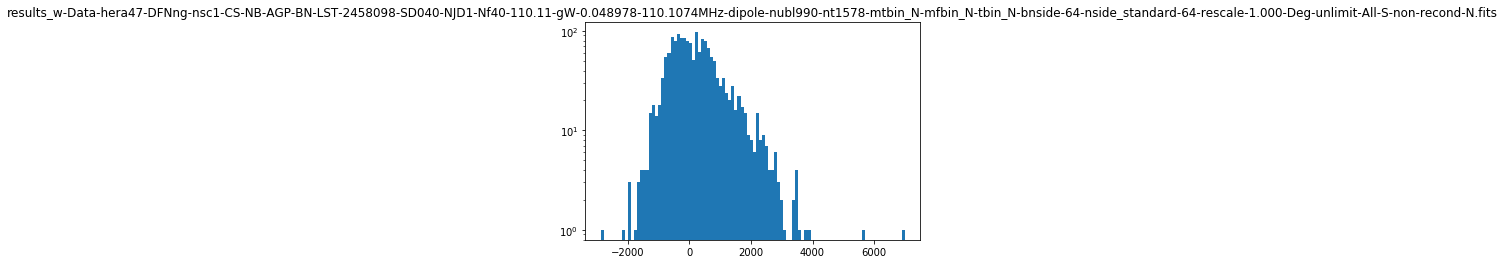

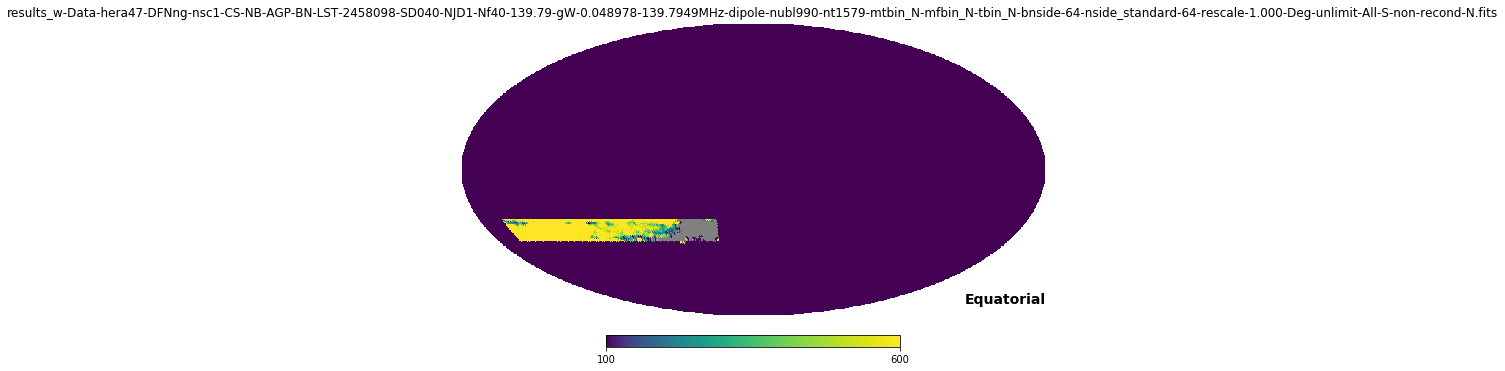

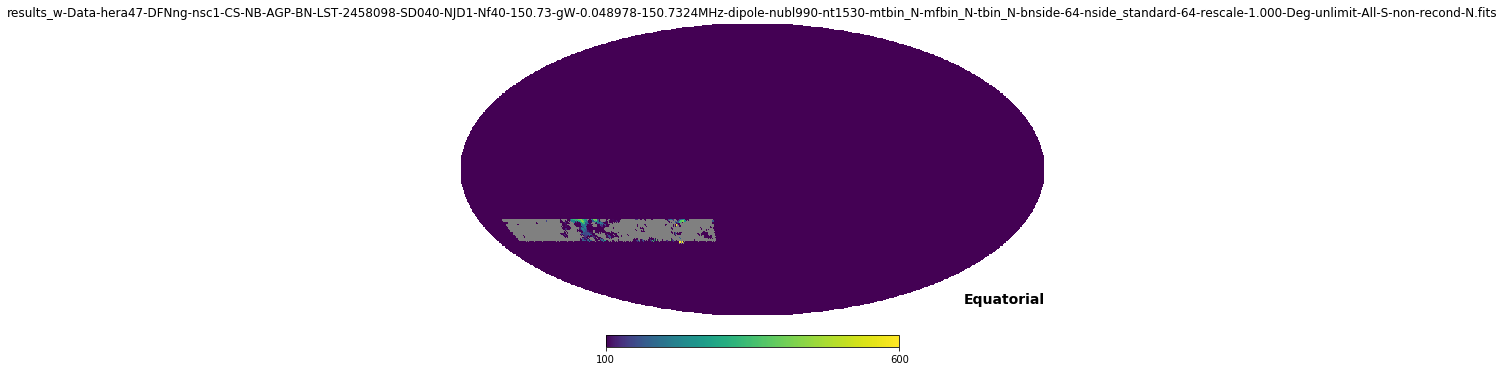

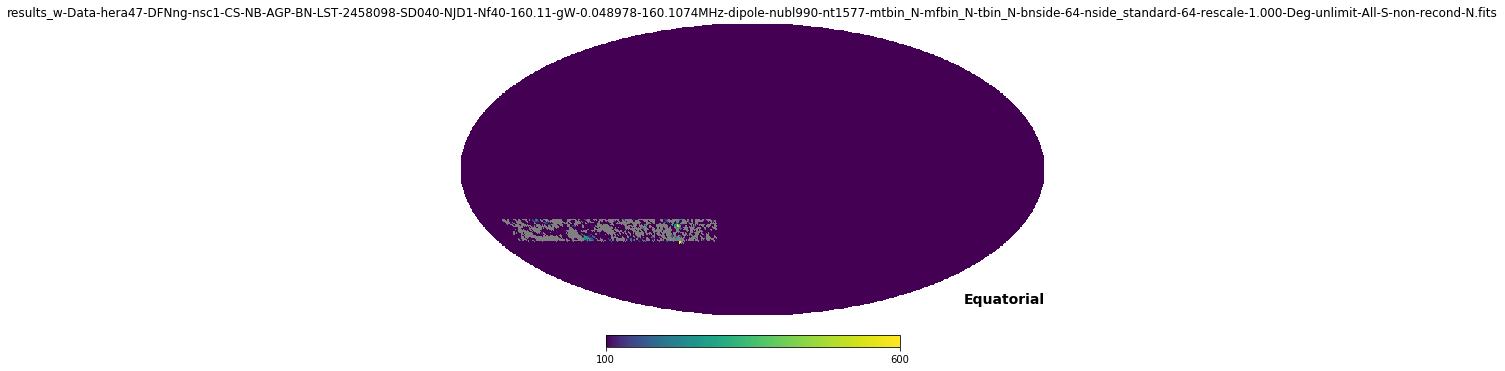

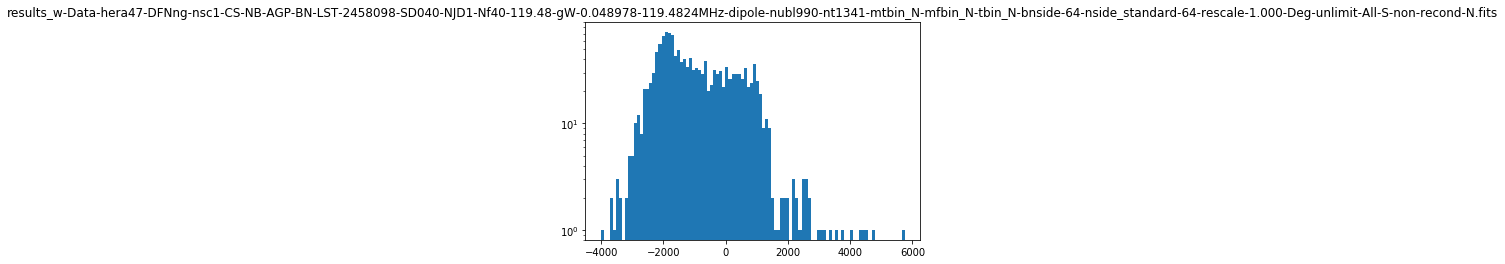

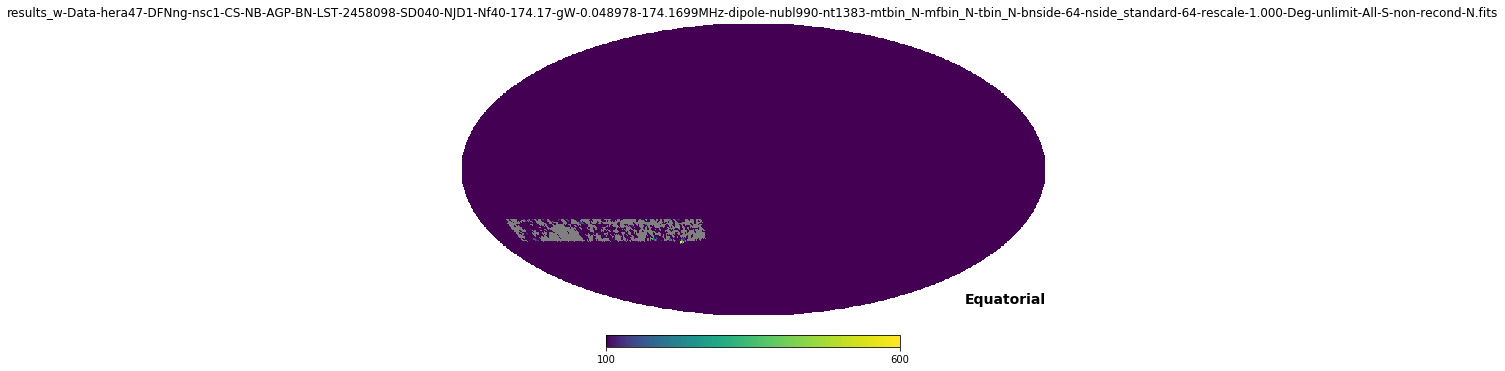

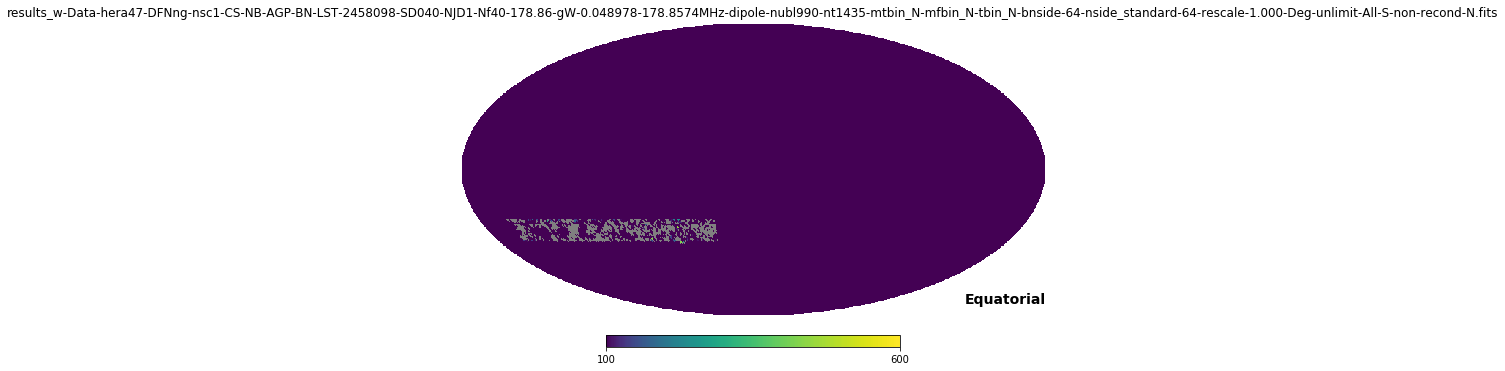

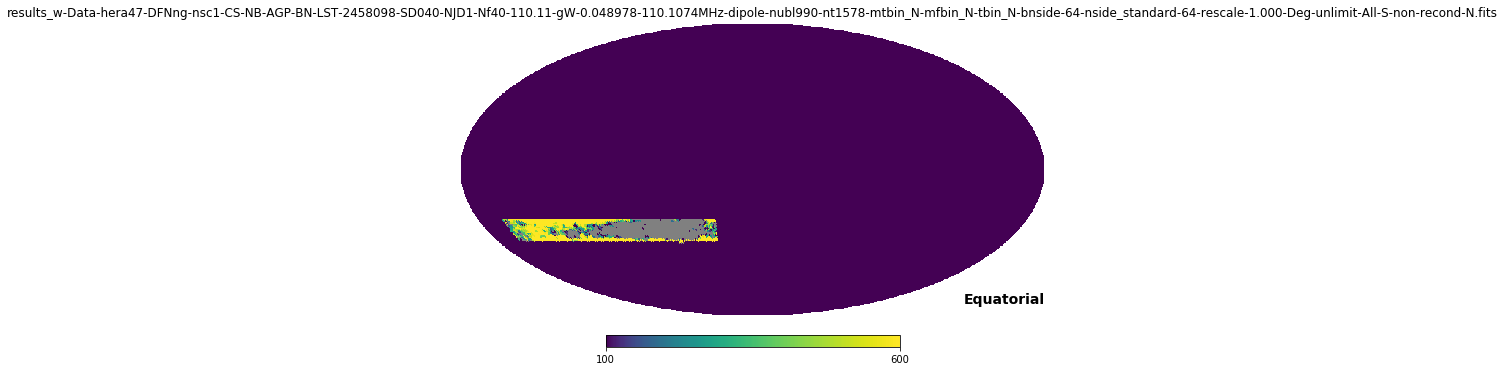

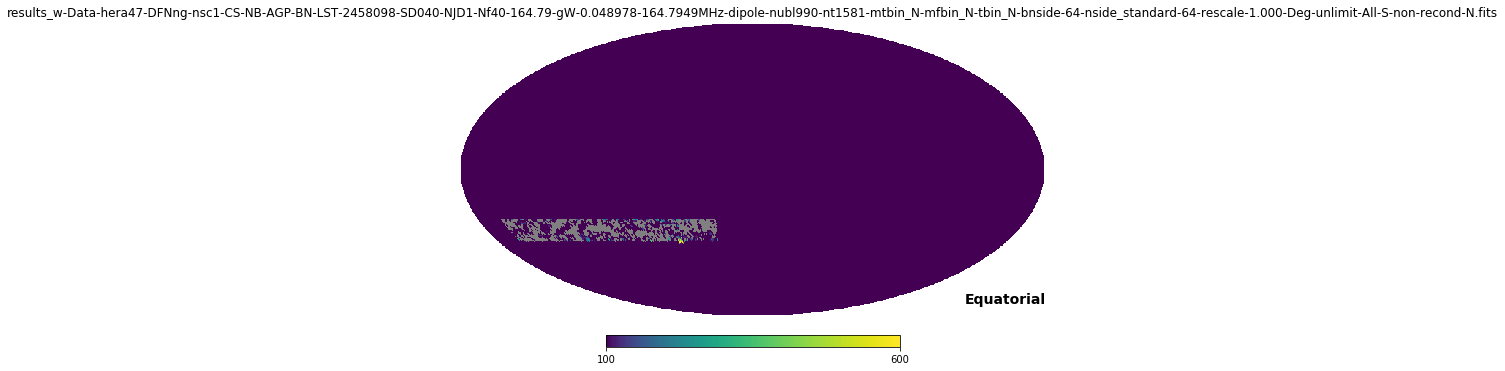

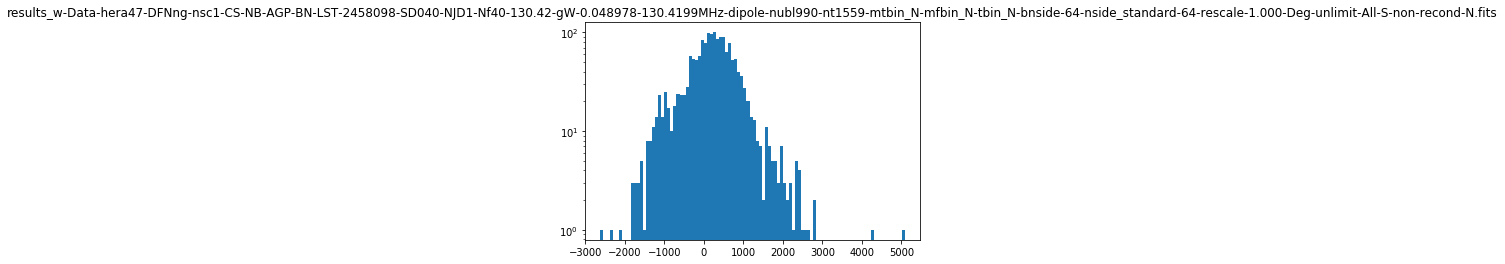

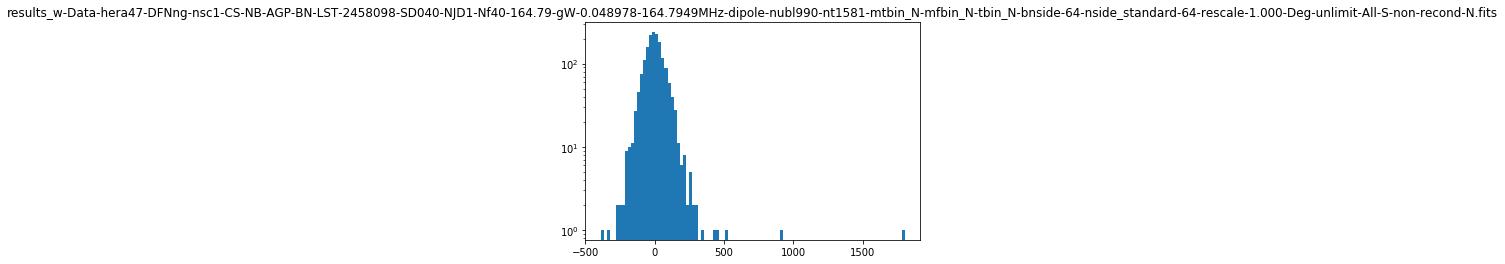

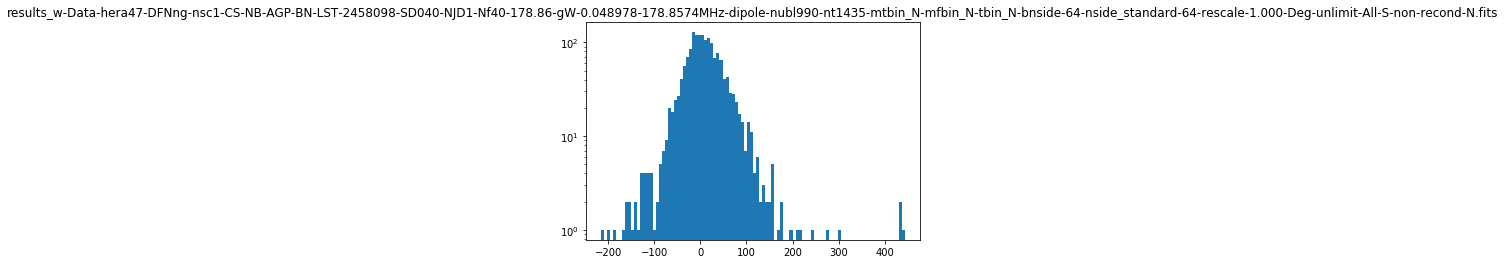

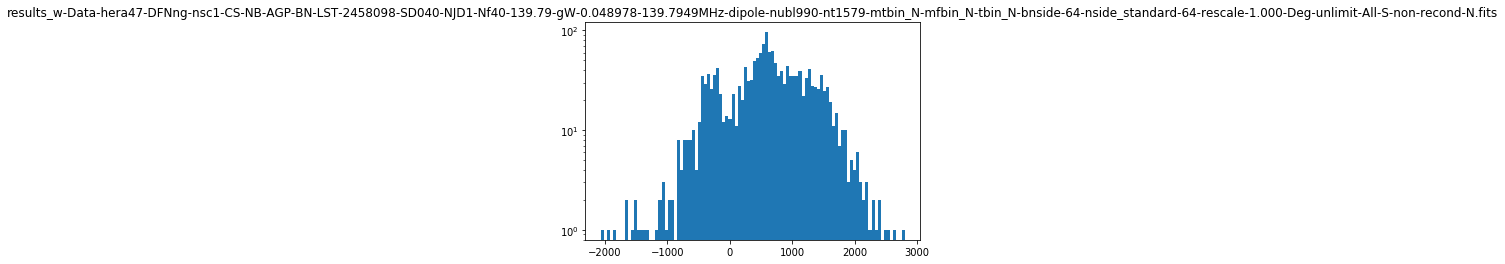

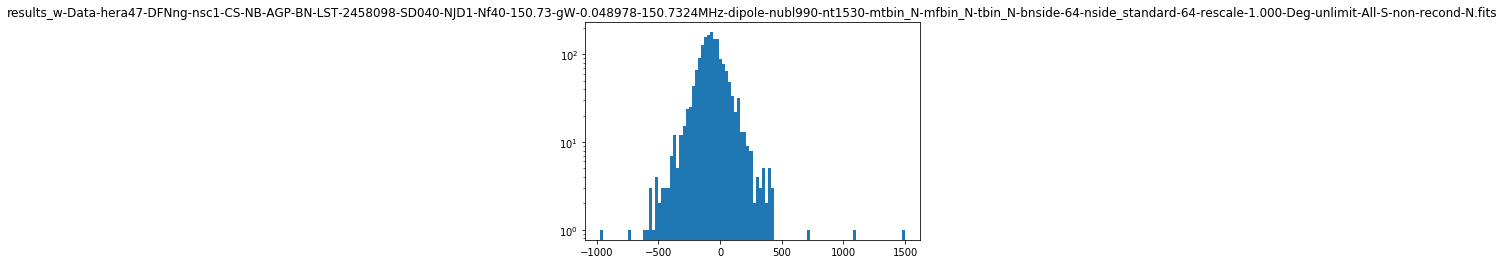

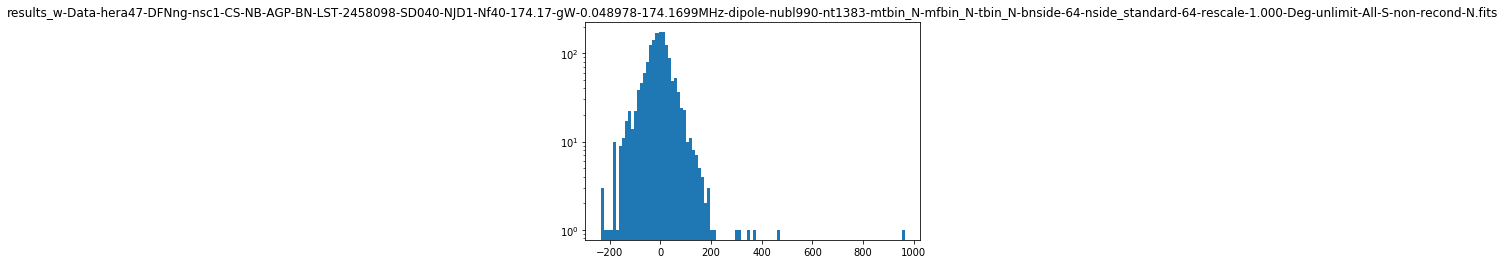

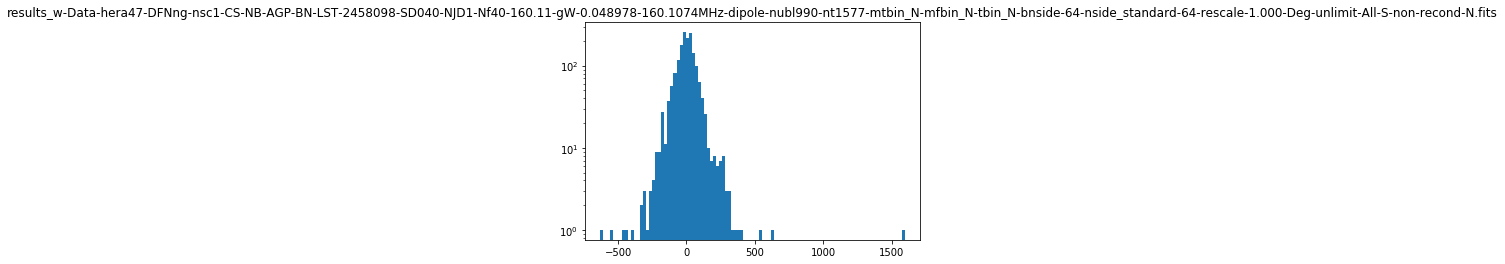

In [265]:
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map64-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(100000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(500000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [502]:
maps_mfreq_64 = []
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 1250.:
        maps_mfreq_64.append(map_fit)
        
maps_mfreq_64 = np.array(maps_mfreq_64)
commom_vp_mask_64 = np.prod(np.abs(maps_mfreq_64) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_64 = maps_mfreq_64[:, commom_vp_mask_64]
print('maps_mfreq_64 shape: {}'.format(maps_mfreq_64.shape))
print('maps_mfreq_common_64 shape: {}'.format(maps_mfreq_common_64.shape))
print('Number of Common Valid Pixels-64: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_64) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca_64 = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca_64.fit(maps_mfreq_common_64)
maps_mfreq_common_64_eigValues_ratio = pca_64.explained_variance_ratio_
maps_mfreq_common_64_eigValues = pca_64.singular_values_
maps_mfreq_common_64_eigVectors = pca_64.components_
maps_mfreq_common_64_newspace = pca_64.fit_transform(maps_mfreq_common_64)
print('EigenValues_64: \n{}\n'.format(maps_mfreq_common_64_eigValues))
print('EigenValuesRatio_64: \n{}\n'.format(maps_mfreq_common_64_eigValues_ratio))
print('EigenVectorsShape_64: {}\n'.format(maps_mfreq_common_64_eigVectors.shape))
print('Maps64_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_64_newspace.shape))
print('Maps64_Common_NewSpace: {}'.format(maps_mfreq_common_64_newspace))

id_freq = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_64_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_newspace[id_freq].dot(maps_mfreq_common_64_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_64[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_64_newspace[id_freq].dot(maps_mfreq_common_64_eigVectors))[-number_to_show:])

>>>>>>>> Number of Valid Pixels: 1696
>>>>>>>> Number of Valid Pixels: 1492
>>>>>>>> Number of Valid Pixels: 1680
>>>>>>>> Number of Valid Pixels: 1705
>>>>>>>> Number of Valid Pixels: 1679
>>>>>>>> Number of Valid Pixels: 1696
>>>>>>>> Number of Valid Pixels: 1705
>>>>>>>> Number of Valid Pixels: 1569
>>>>>>>> Number of Valid Pixels: 1671
maps_mfreq_64 shape: (9, 49152)
maps_mfreq_common_64 shape: (9, 1475)
Number of Common Valid Pixels-64: 1475
EigenValues_64: 
[5.88453815e+04 3.68775370e+04 2.63928222e+04 2.23141696e+04
 4.71271706e+03 3.18224405e+03 2.76848782e+03 1.76932360e+03
 6.32549143e-12]

EigenValuesRatio_64: 
[5.71381127e-01 2.24401079e-01 1.14940422e-01 8.21604078e-02
 3.66474583e-03 1.67096785e-03 1.26469662e-03 5.16553928e-04
 6.60221509e-33]

EigenVectorsShape_64: (9, 1475)

Maps64_Common_NewSpace shape: (9, 9)

Maps64_Common_NewSpace: [[-5.73417205e+03  2.25222271e+04 -1.44083170e+04 -1.01672890e+04
  -1.21187987e+02  2.96728695e+01 -7.07110810e+00 -5.72805632e+00
   

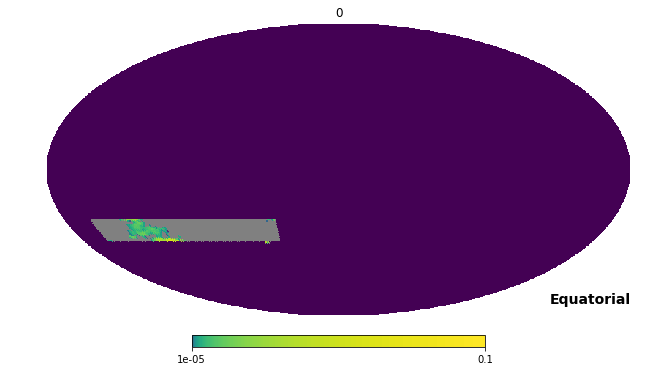

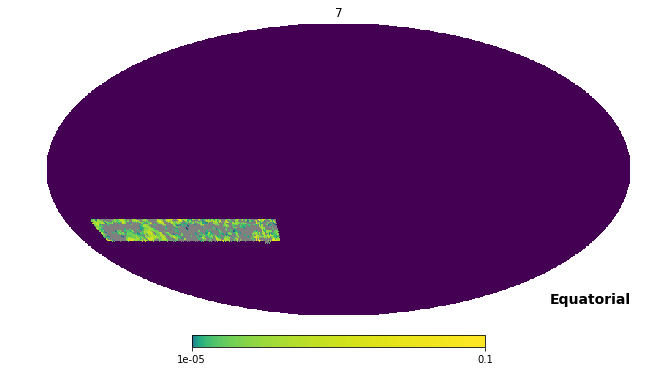

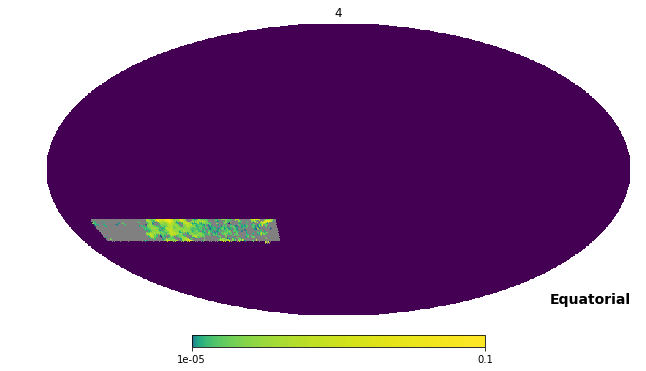

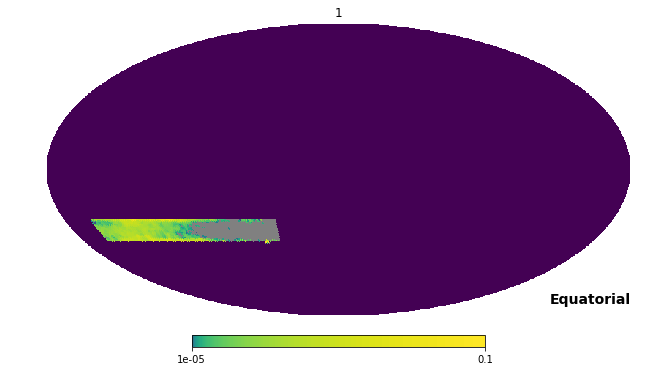

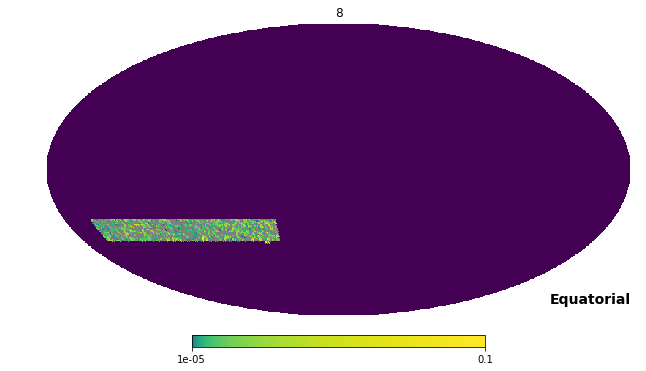

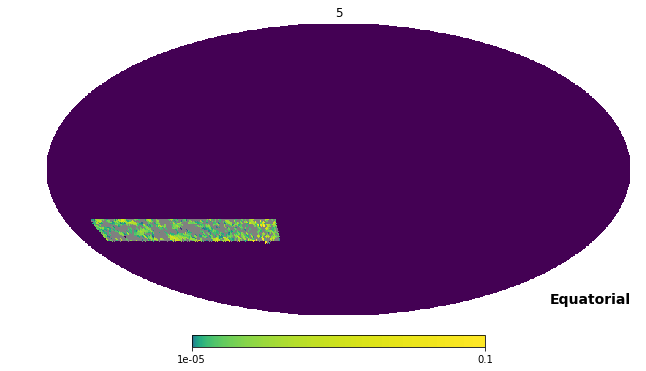

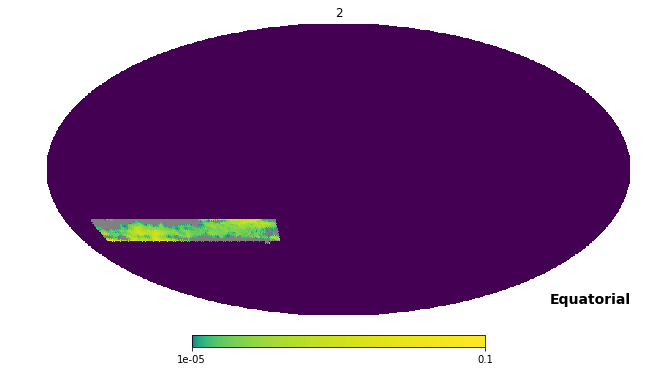

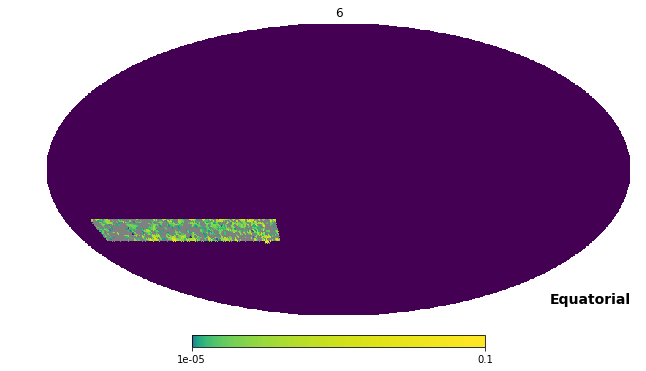

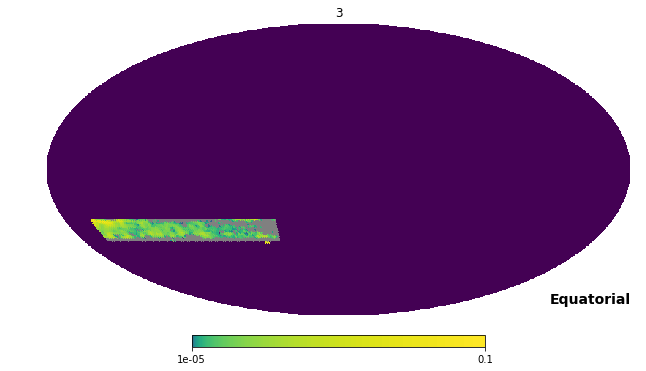

In [512]:
maps_mfreq_common_64_eigVectors_full = np.ones_like(maps_mfreq_64) * 10**(-5)
maps_mfreq_common_64_eigVectors_full[:, commom_vp_mask_64] = maps_mfreq_common_64_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_64_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-5), max=10.**(-1), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()

In [266]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_64 = fits.getdata(filenames_64[2]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_64[np.argsort(ww_solution_whole_64)[-80:]]))

Bright_Pixels_Data: [[-27.95318688 -34.22886633 -25.94447977 -34.22886633 -27.95318688
  -25.28260304 -25.28260304 -34.95386526 -25.28260304 -25.28260304
  -25.28260304 -34.22886633 -28.63098984 -33.51005607 -25.94447977
  -25.28260304 -29.31319896 -25.28260304 -26.61009781 -34.95386526
  -25.94447977 -29.31319896 -25.94447977 -25.94447977 -29.31319896
  -25.28260304 -34.22886633 -28.63098984 -25.28260304 -27.27961274
  -25.94447977 -25.28260304 -36.42357364 -28.63098984 -25.94447977
  -25.94447977 -25.28260304 -27.95318688 -28.63098984 -34.95386526
  -28.63098984 -34.95386526 -28.63098984 -27.95318688 -27.27961274
  -34.95386526 -27.27961274 -27.95318688 -27.27961274 -25.28260304
  -28.63098984 -25.28260304 -25.94447977 -25.28260304 -34.95386526
  -27.95318688 -27.27961274 -34.22886633 -34.95386526 -27.95318688
  -25.28260304 -27.95318688 -25.28260304 -27.95318688 -37.92165078
  -28.63098984 -27.95318688 -26.61009781 -25.28260304 -27.27961274
  -27.27961274 -25.94447977 -25.94447977 -

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-part without Fornax A: 51.3984160812
>>>>>>>> Maximum in the Map: 2458.14553411
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-114.79-gW-0.048978-114.7949MHz-dipole-nubl990-nt1035-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-part without Fornax A: 66.5326967061
>>>>>>>> Maximum in the Map: 3108.53607258
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-part without Fornax A: 72.6326436825
>>>>>>>> Maximum in t

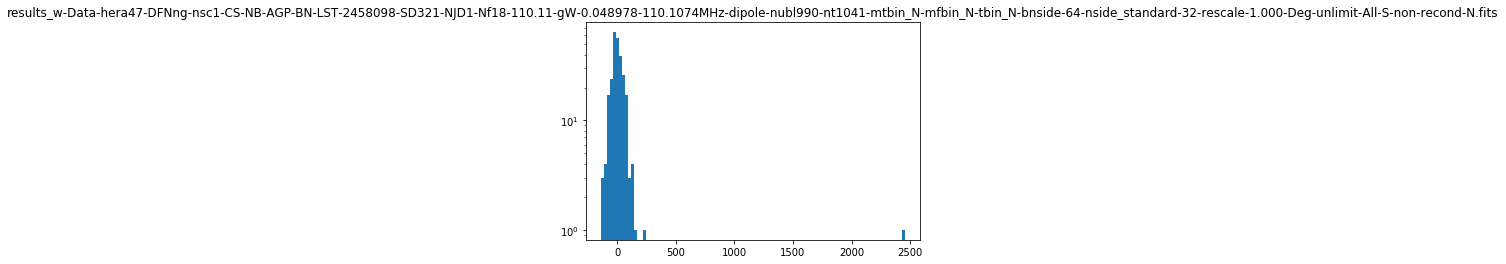

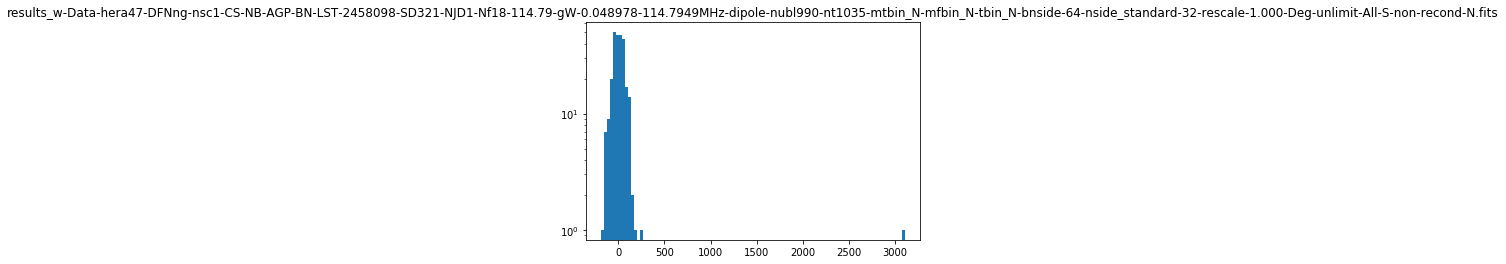

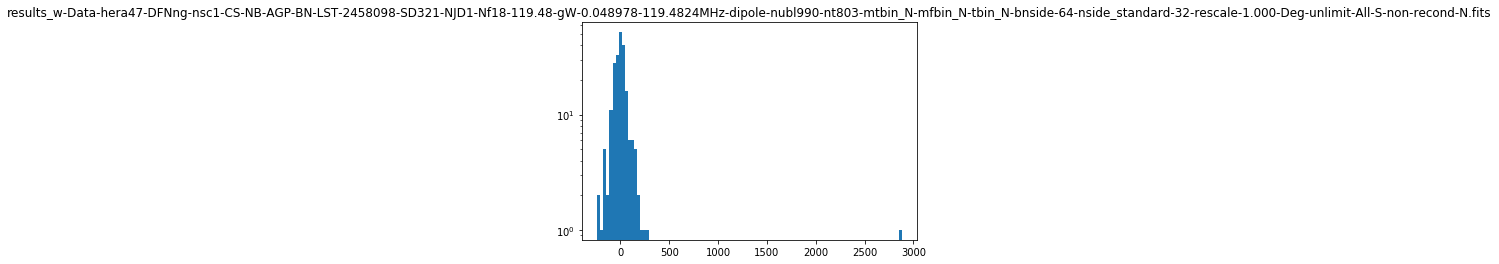

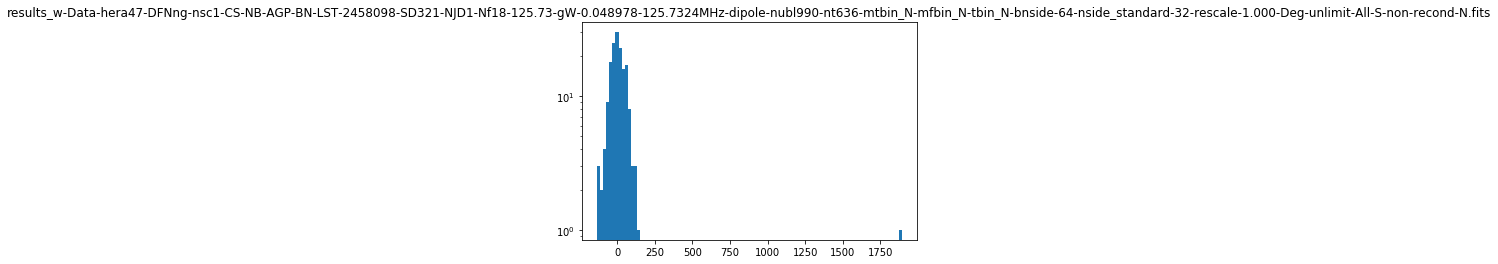

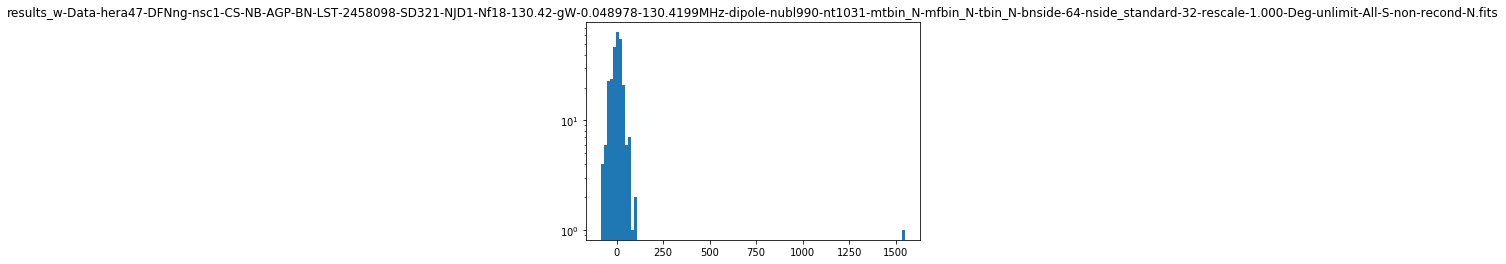

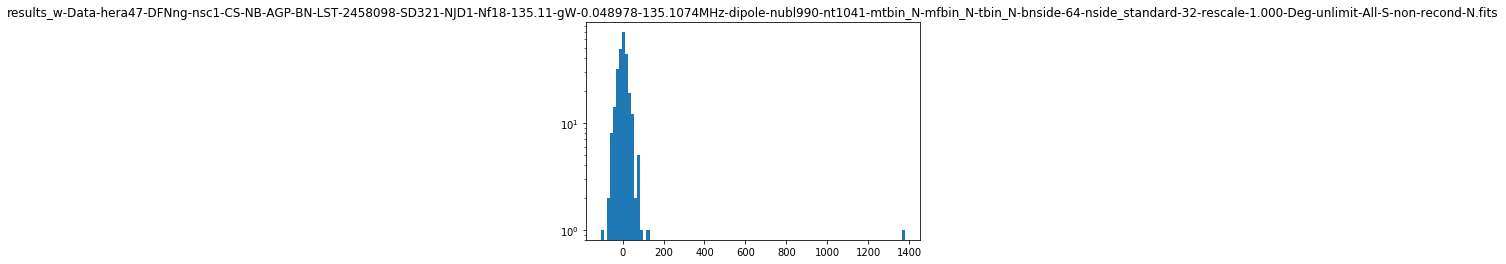

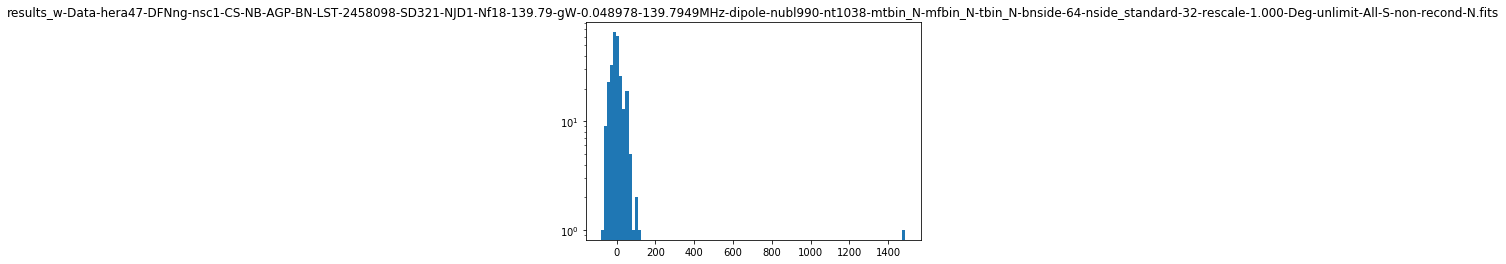

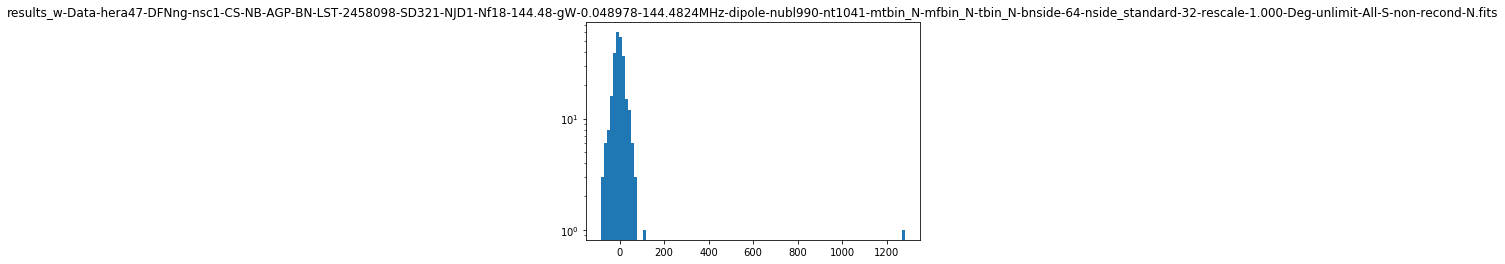

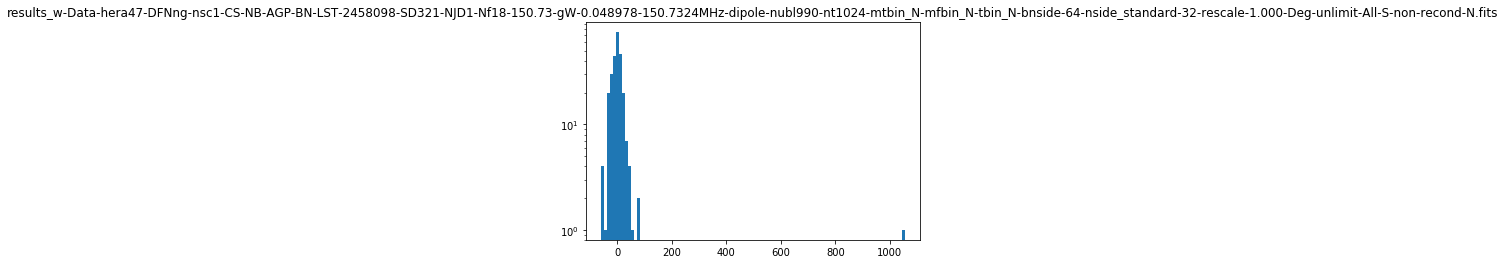

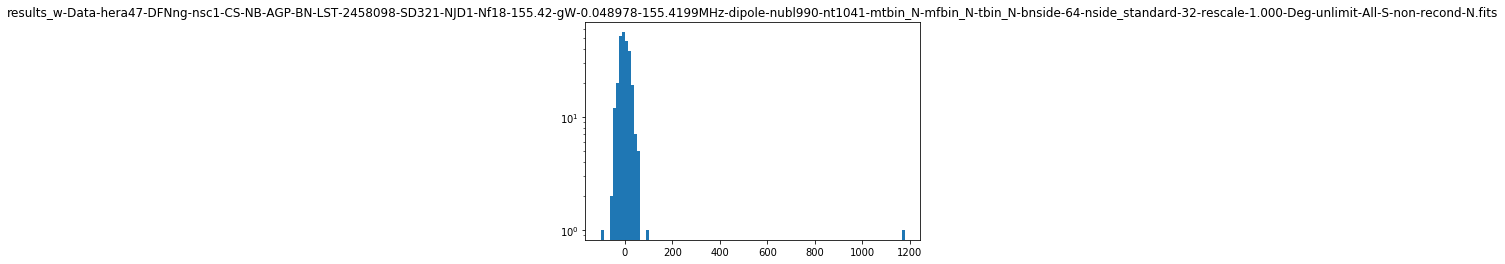

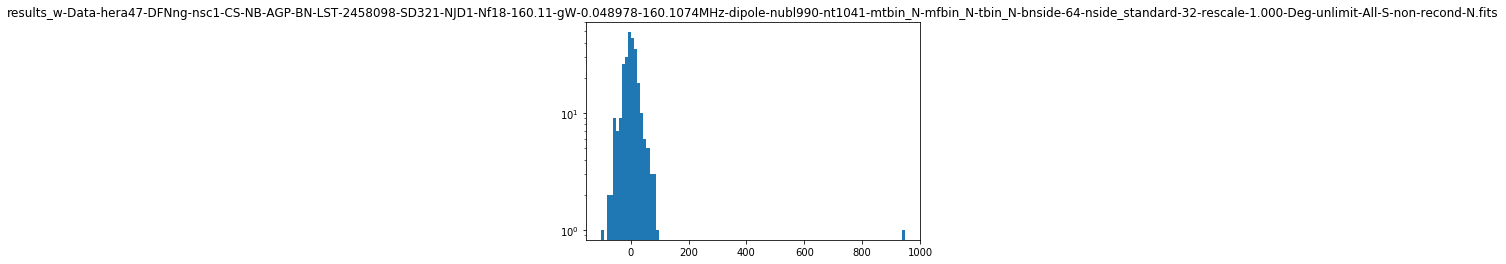

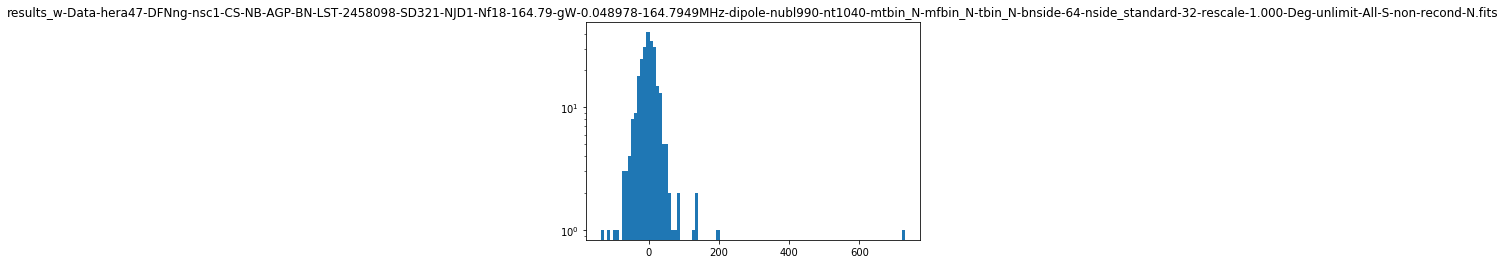

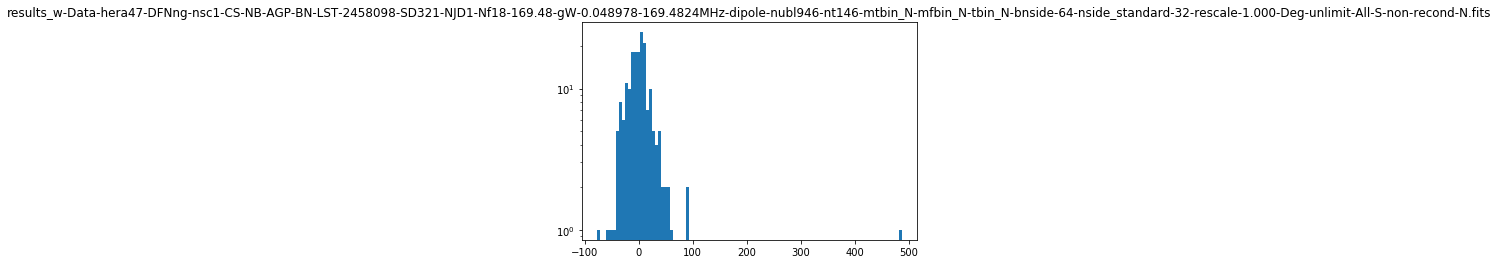

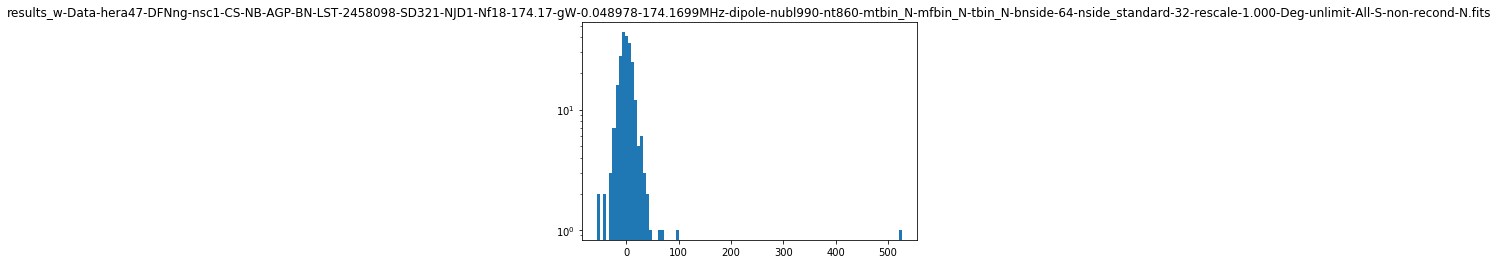

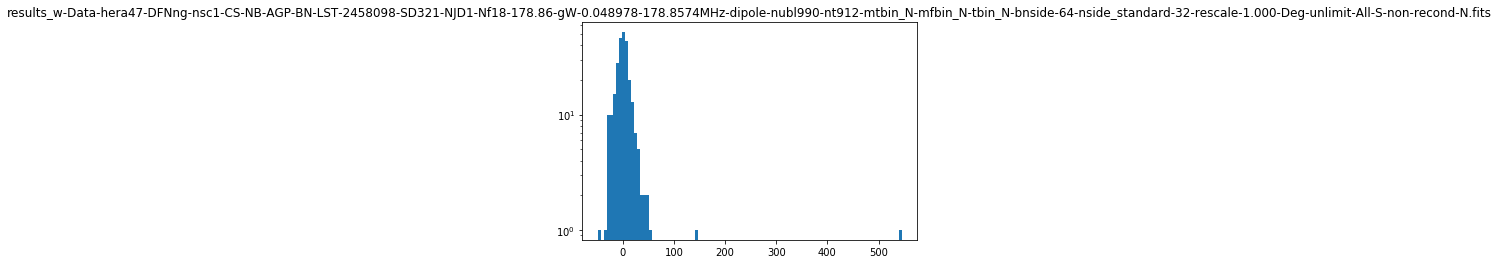

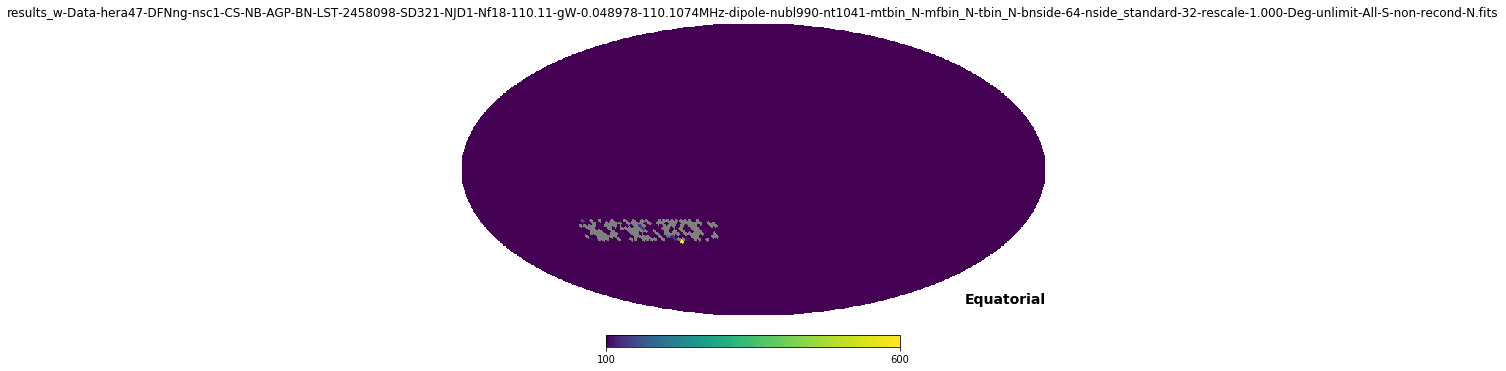

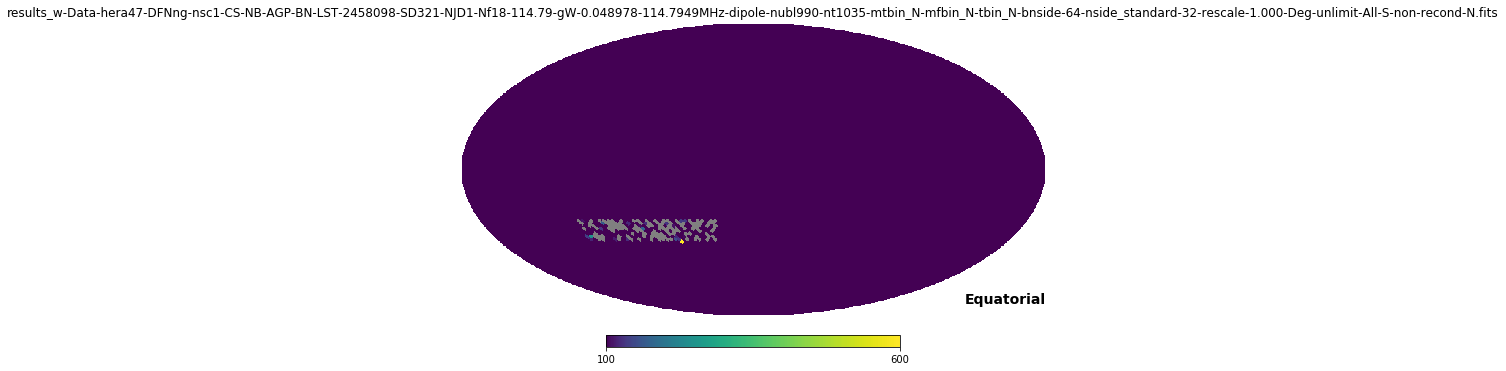

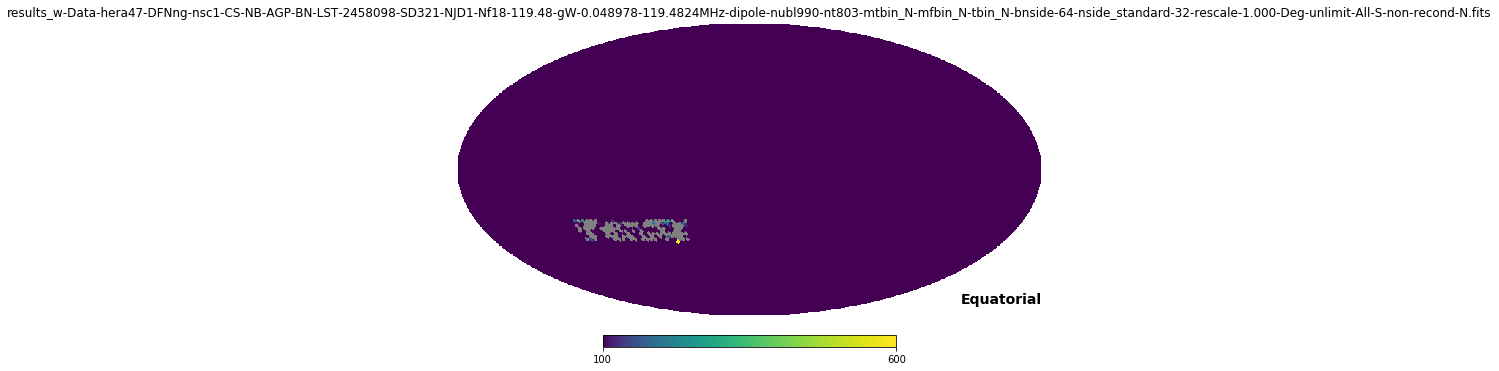

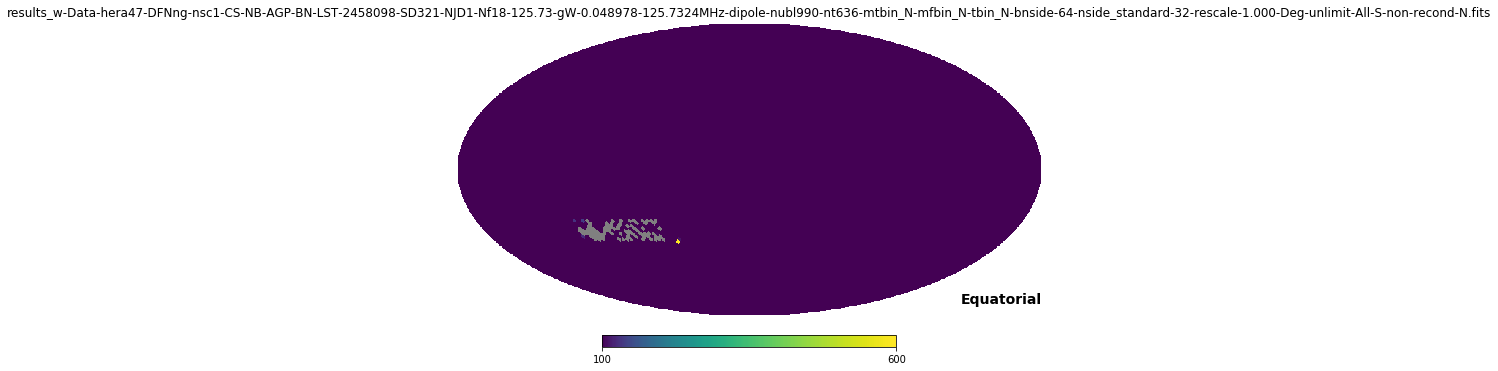

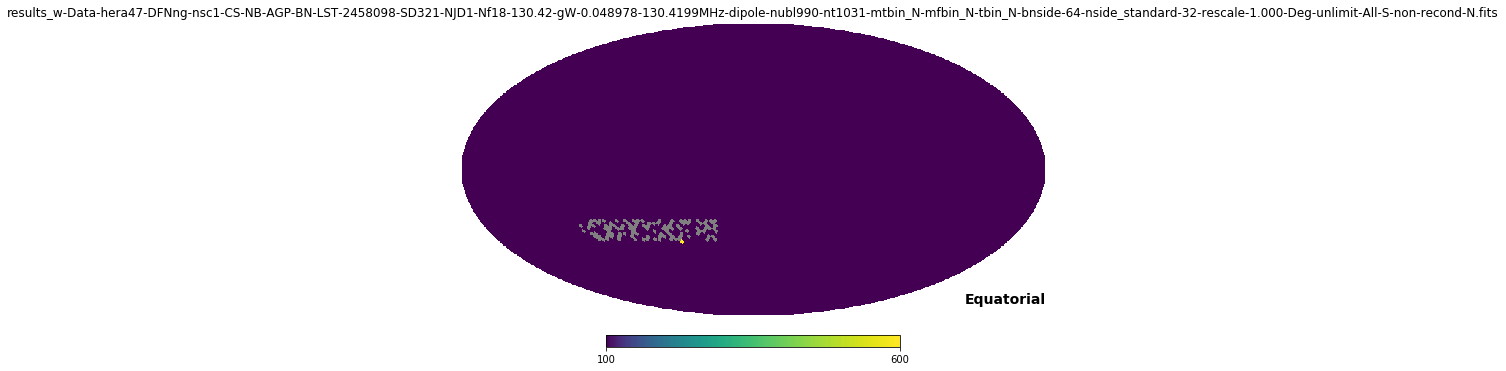

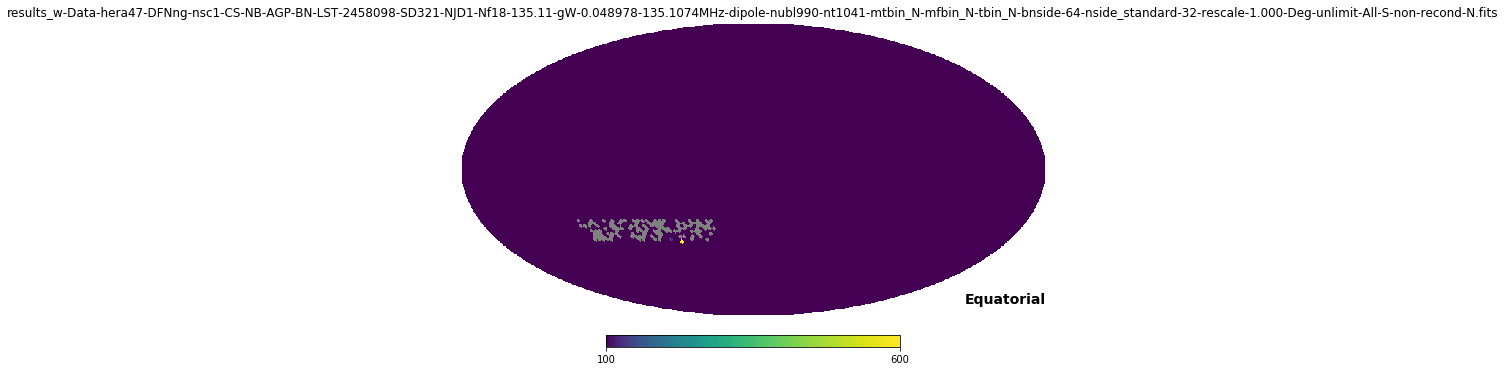

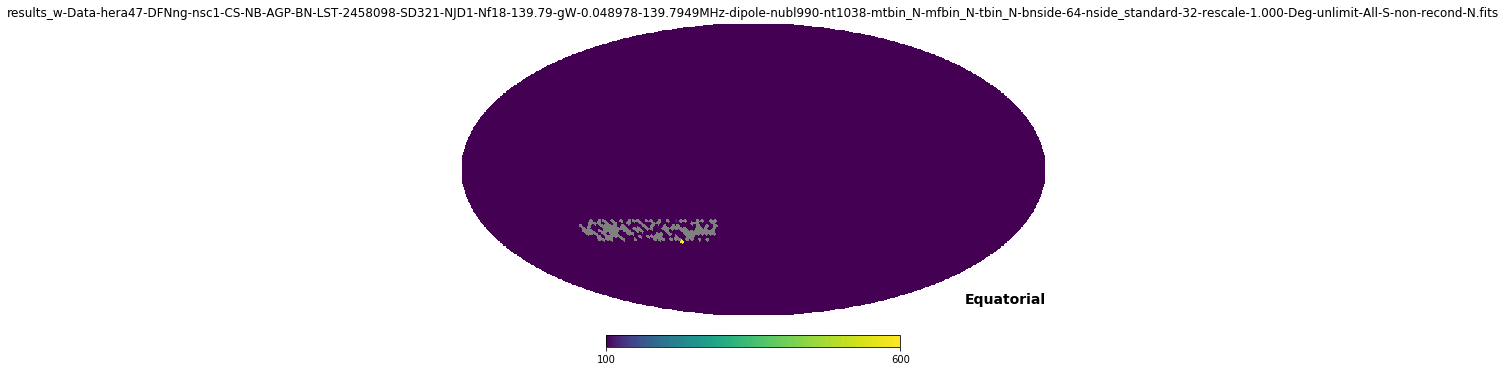

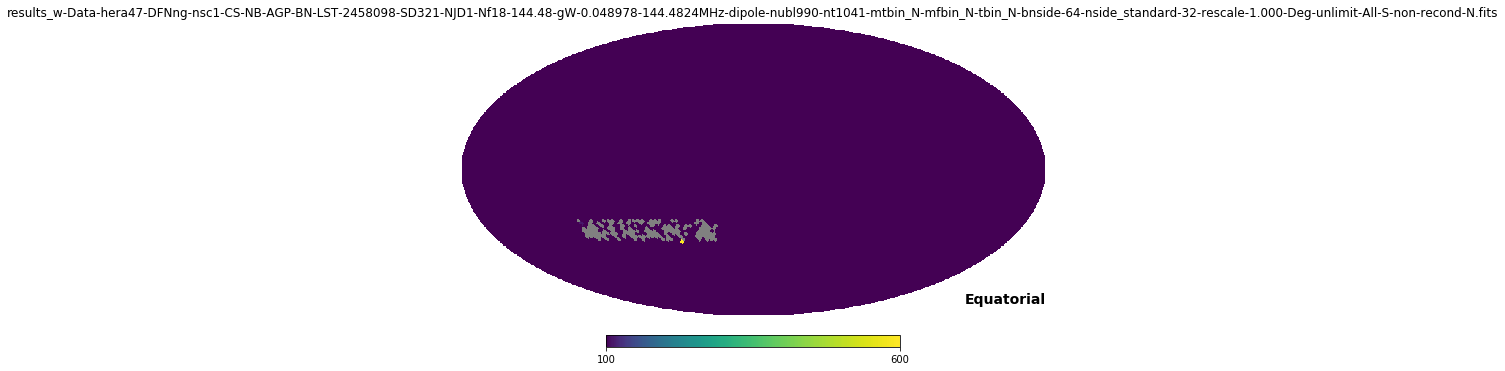

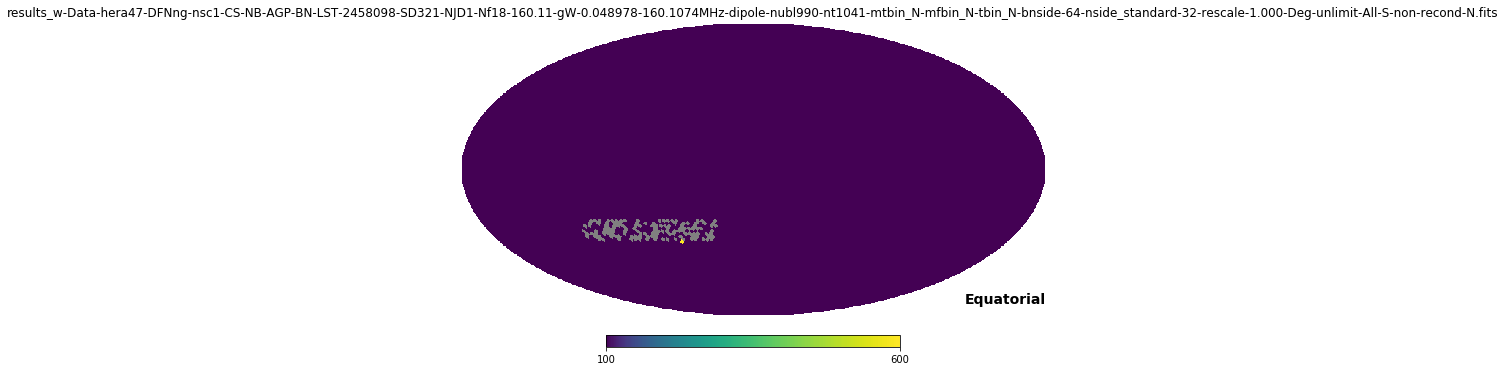

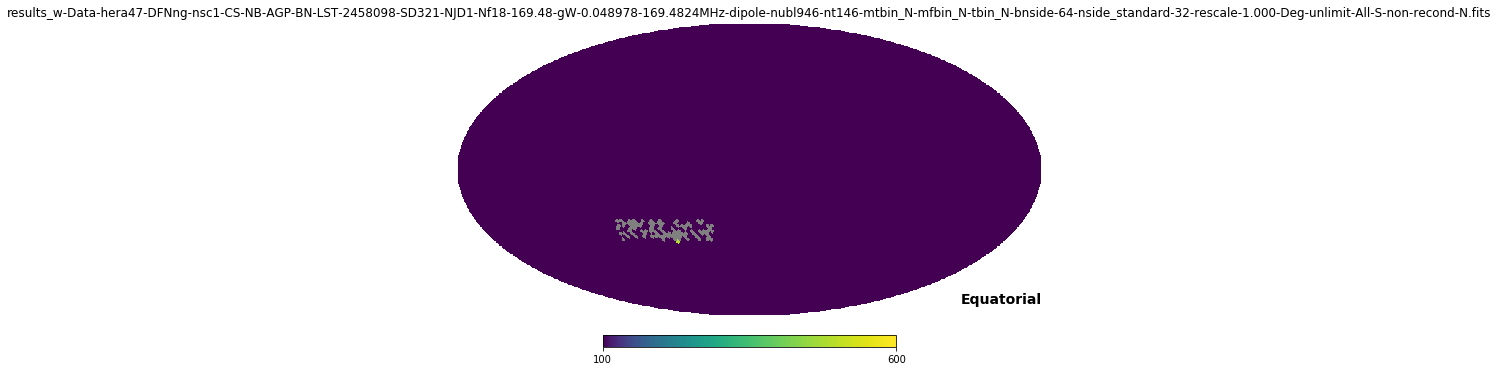

In [247]:
for id_file, fitfile in enumerate(filenames_32_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map32-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(25000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(65000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 213
>>>>>>>> Number of Valid Pixels: 163
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 257
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 261
>>>>>>>> Number of Valid Pixels: 185
>>>>>>>> Number of Valid Pixels: 237
>>>>>>>> Number of Valid Pixels: 261
maps_mfreq_32_321 shape: (15, 12288)
maps_mfreq_common_32_321 shape: (15, 87)
Number of Common Valid Pixels-32_321: 87
EigenValues: 
[3.14006021e+03 5.49307072e+02 4.67413050e+02 4.20030902e+02
 3.08175368e+02 3.04012925e+02 2.81869603e+02 2.63551922e+02
 2.44785263e+02 2.19657177e+02 2.02212279e+02 1.96322041e+02
 1.52647337e+02 1.22159508e+02 1.67345485e-13]

EigenValuesRatio: 
[8.86788467e-01 2.71377892e-02 1.96492397e-02 1.58674293e-02
 

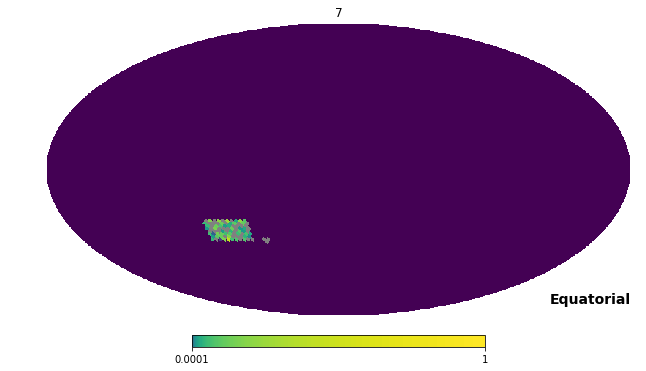

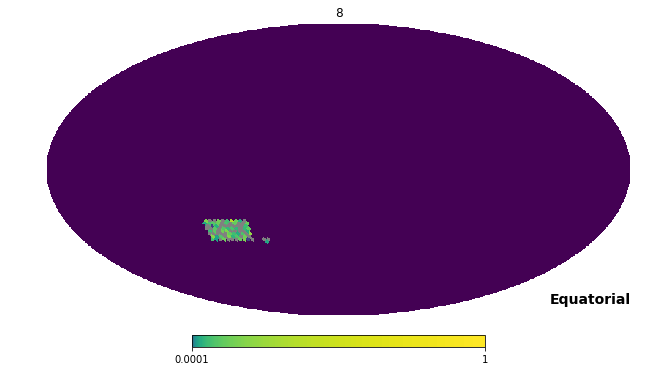

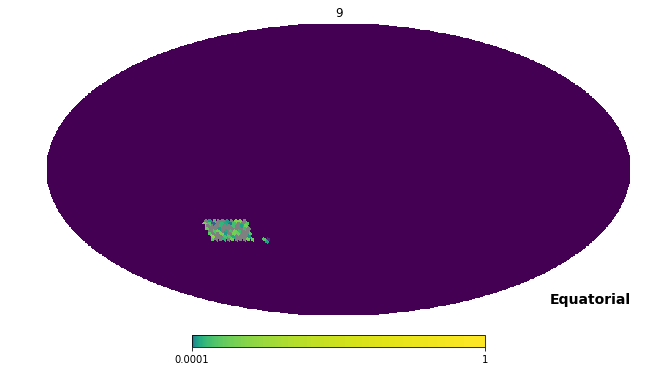

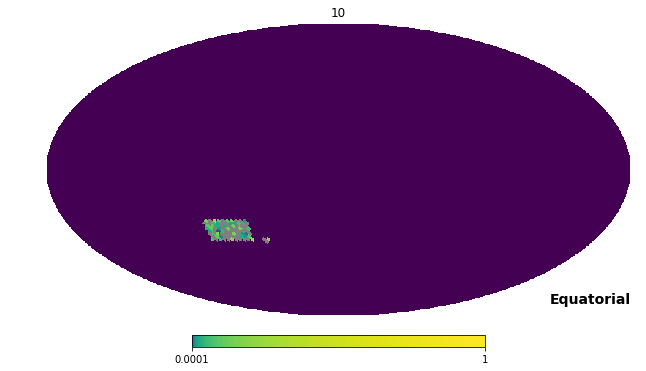

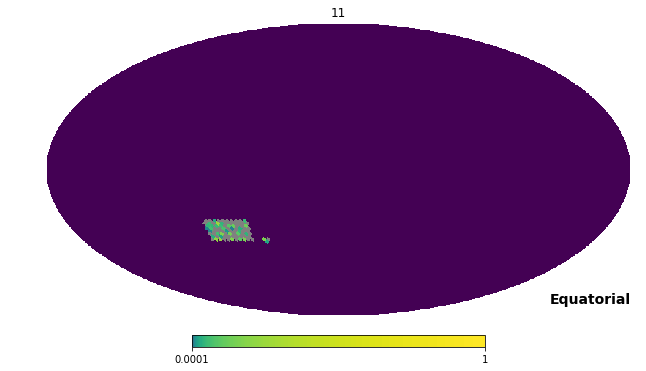

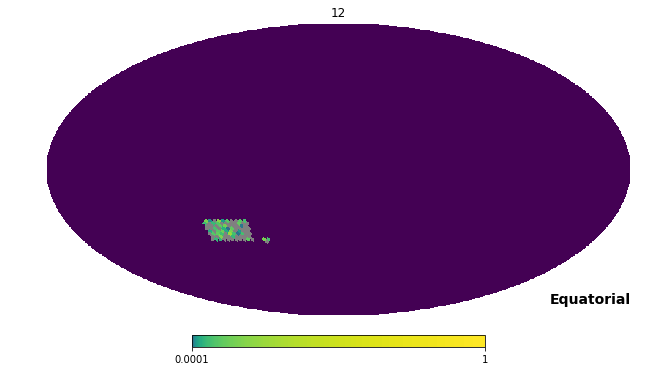

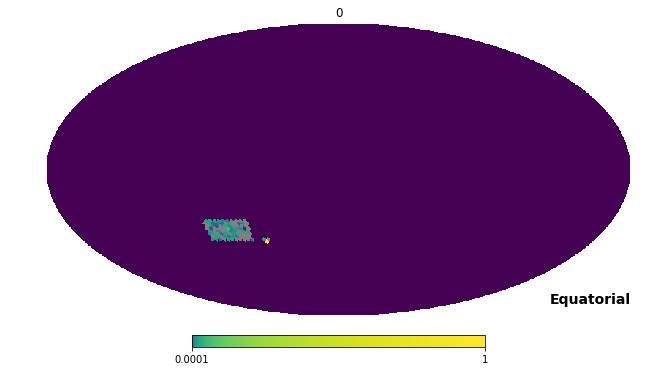

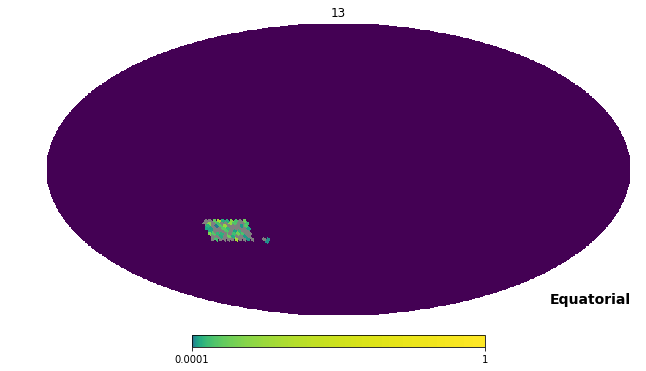

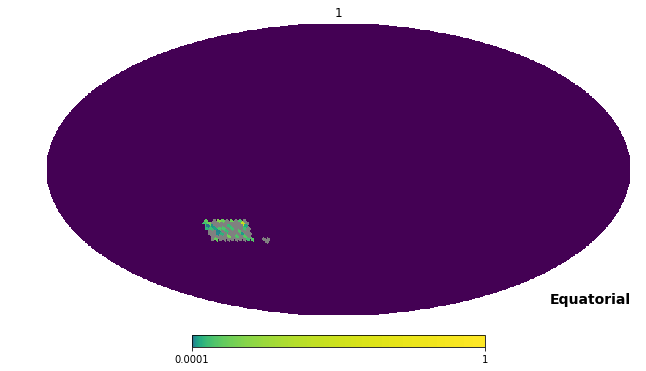

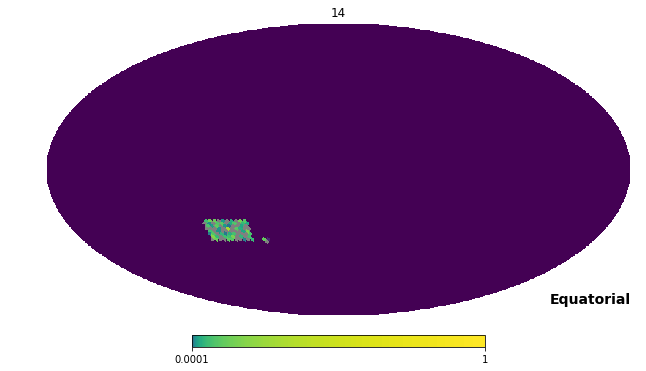

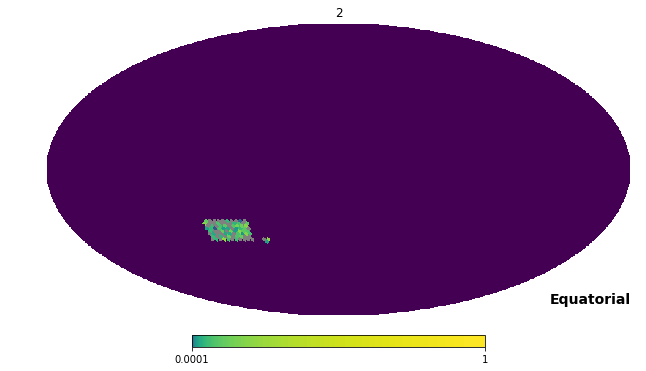

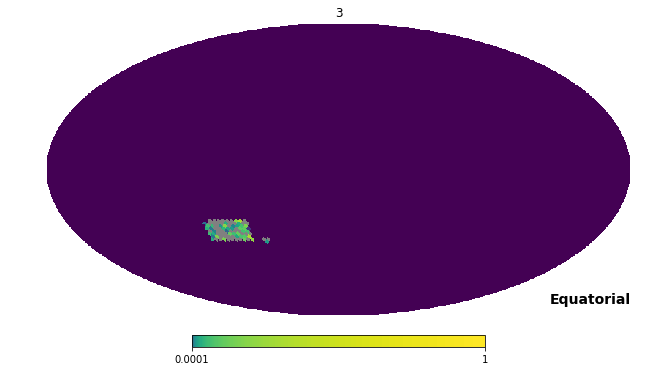

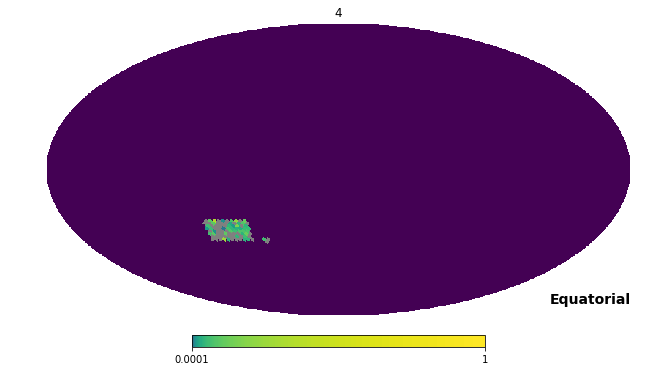

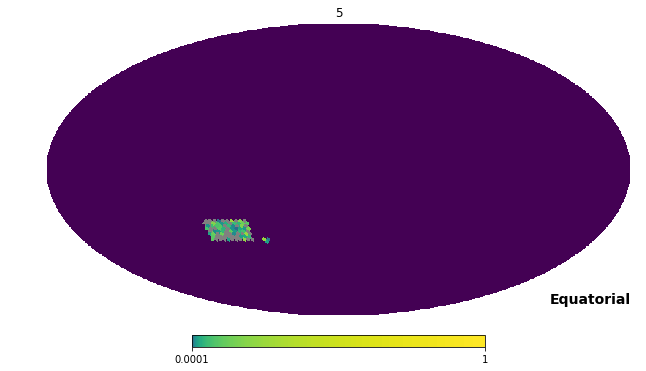

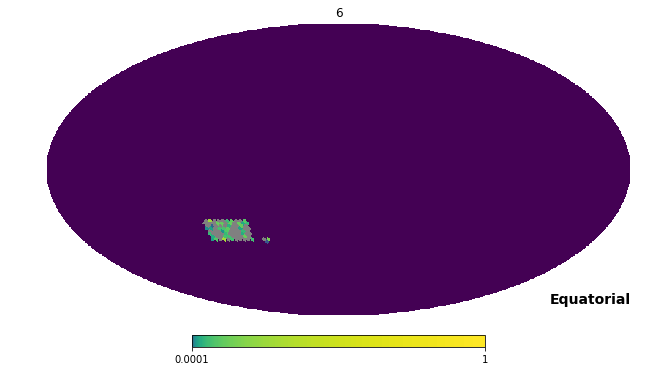

In [514]:
maps_mfreq_32_321 = []
for id_file, fitfile in enumerate(filenames_32_321):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 150.:
        maps_mfreq_32_321.append(map_fit)
        
maps_mfreq_32_321 = np.array(maps_mfreq_32_321)
commom_vp_mask_32_321 = np.prod(np.abs(maps_mfreq_32_321) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32_321 = maps_mfreq_32_321[:, commom_vp_mask_32_321]
print('maps_mfreq_32_321 shape: {}'.format(maps_mfreq_32_321.shape))
print('maps_mfreq_common_32_321 shape: {}'.format(maps_mfreq_common_32_321.shape))
print('Number of Common Valid Pixels-32_321: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32_321) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32_321)
maps_mfreq_common_32_321_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_321_eigValues = pca.singular_values_
maps_mfreq_common_32_321_eigVectors = pca.components_
maps_mfreq_common_32_321_newspace = pca.fit_transform(maps_mfreq_common_32_321)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_321_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_321_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_321_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_321_newspace.shape))
print('Maps32_Common_NewSpace: {}'.format(maps_mfreq_common_32_321_newspace))

id_freq = 8
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_321[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_321_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_321_newspace[id_freq].dot(maps_mfreq_common_32_321_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_32_321[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_321_newspace[id_freq].dot(maps_mfreq_common_32_321_eigVectors))[-number_to_show:])

maps_mfreq_common_32_321_eigVectors_full = np.ones_like(maps_mfreq_32_321) * 10**(-5)
maps_mfreq_common_32_321_eigVectors_full[:, commom_vp_mask_32_321] = maps_mfreq_common_32_321_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_321_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-4), max=10.**(-0), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [260]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_32 = fits.getdata(filenames_32_321[8]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_32[np.argsort(ww_solution_part_32)[-40:]]))



Bright_Pixels_Data: [[ 66.44353569 -30.         -31.38816646 -25.94447977 -32.7971683
  -27.27961274 -31.38816646 -32.7971683  -30.         -34.22886633
  -31.38816646 -35.68533471 -28.63098984 -27.27961274 -30.
  -32.7971683  -34.22886633 -27.27961274 -31.38816646 -28.63098984
  -27.27961274 -34.22886633 -35.68533471 -28.63098984 -31.38816646
  -30.         -28.63098984 -27.27961274 -34.22886633 -25.94447977
  -31.38816646 -25.94447977 -32.7971683  -28.63098984 -31.38816646
  -35.68533471 -30.         -31.38816646 -31.38816646 -28.63098984
  -32.7971683  -35.68533471 -25.94447977 -28.63098984 -28.63098984
  -31.38816646 -32.7971683  -27.27961274 -25.94447977 -25.94447977
  -28.63098984 -25.94447977 -27.27961274 -25.94447977 -28.63098984
  -28.63098984 -31.38816646 -34.22886633 -25.94447977 -31.38816646
  -32.7971683  -35.68533471 -32.7971683  -35.68533471 -31.38816646
  -30.         -35.68533471 -31.38816646 -32.7971683  -27.27961274
  -32.7971683  -27.27961274 -34.22886633 -34.228866

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-part without Fornax A: 757.510156356
>>>>>>>> Maximum in the Map: 5157.98572225
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-part without Fornax A: 918.623924167
>>>>>>>> Maximum in the Map: 4754.05013353
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1031-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-part without Fornax A: 535.006105208
>>>>>>>> Maximum in t

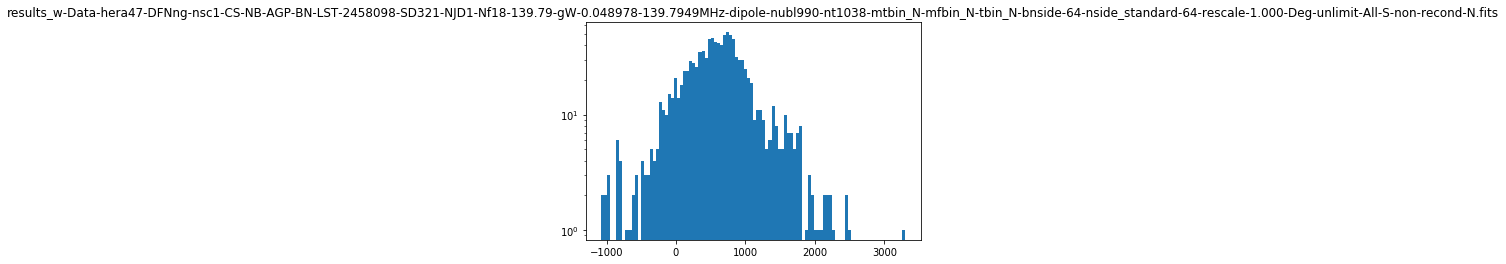

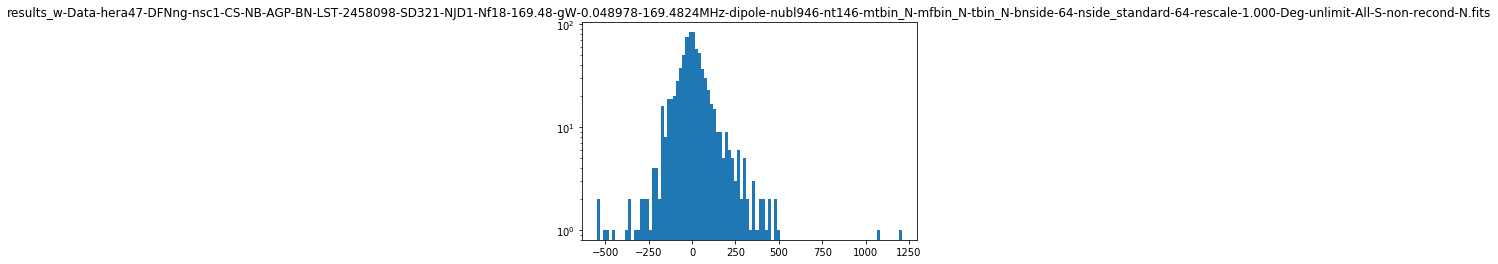

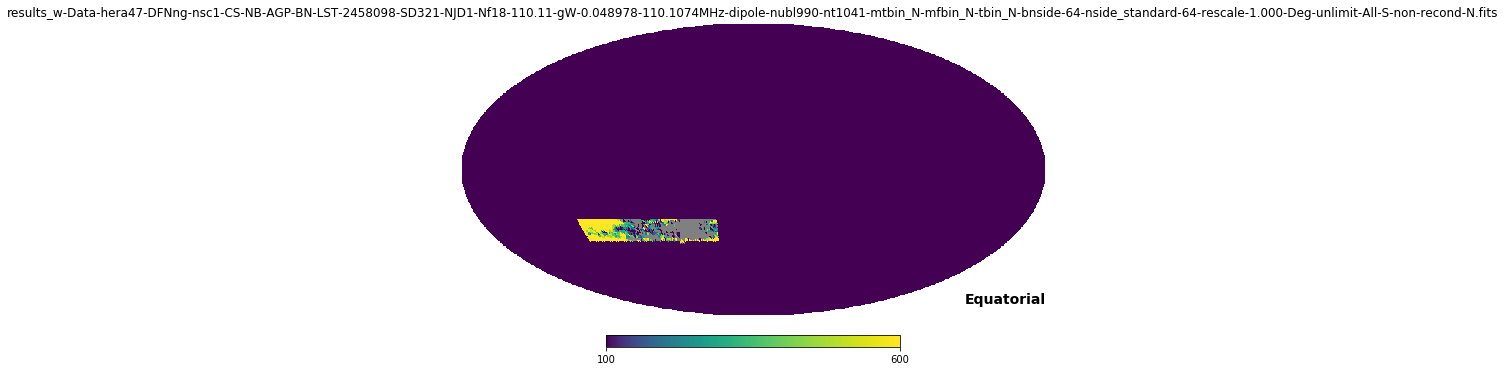

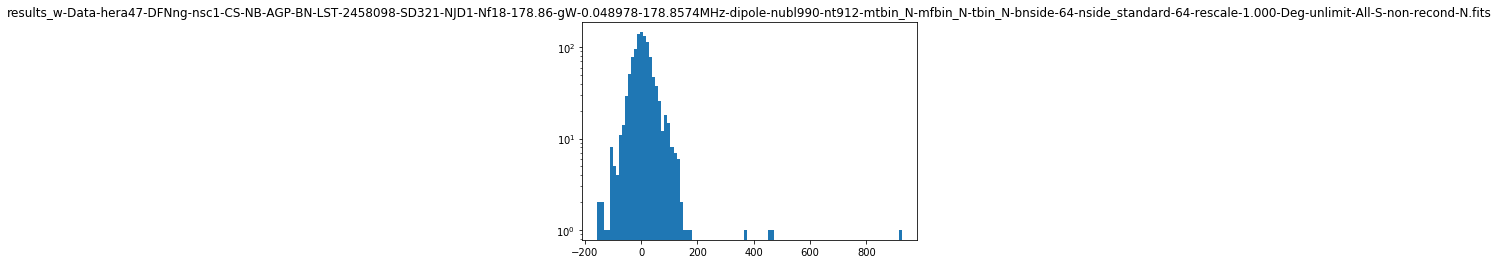

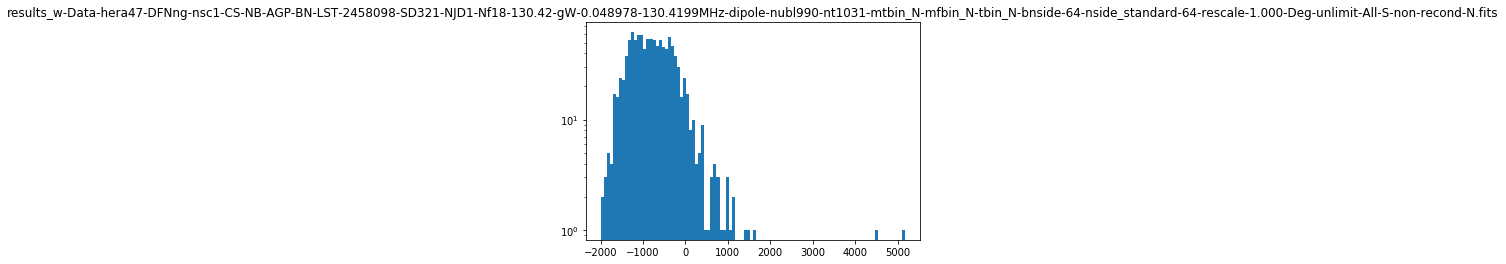

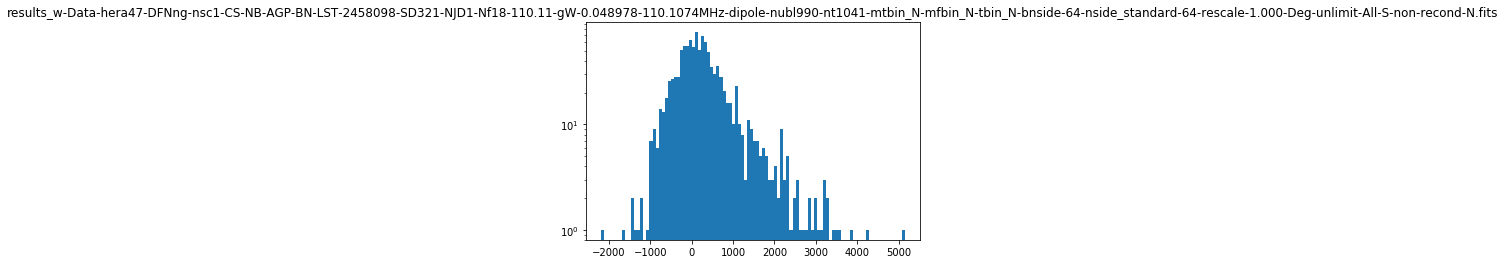

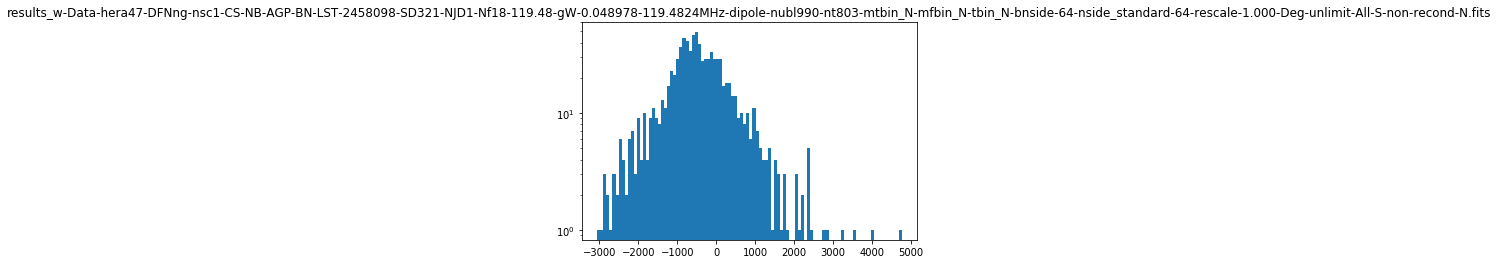

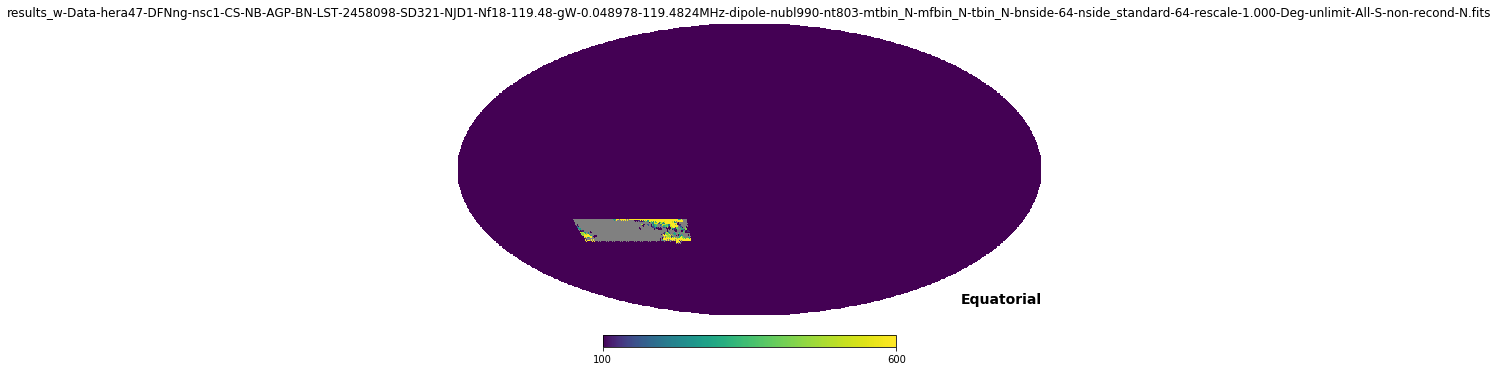

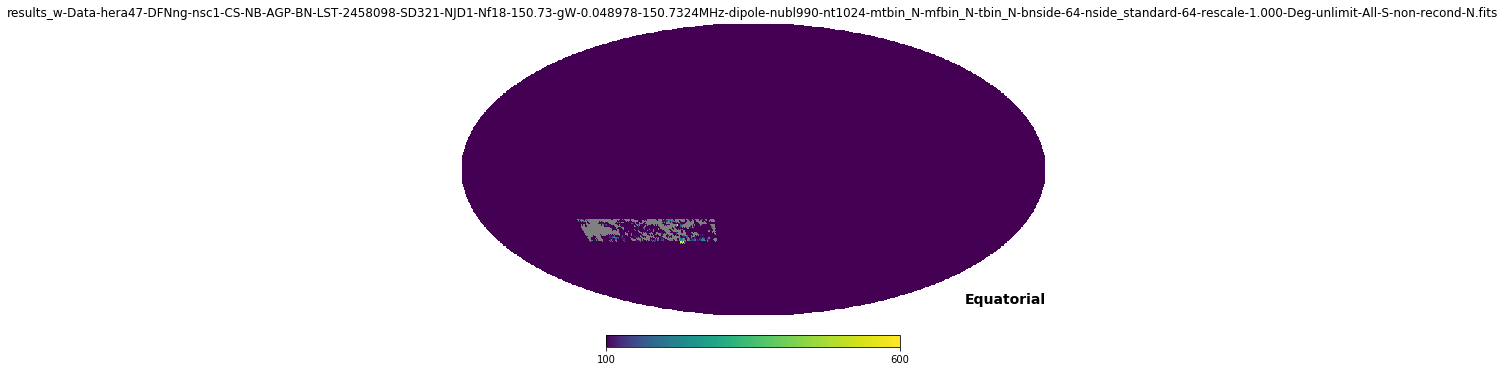

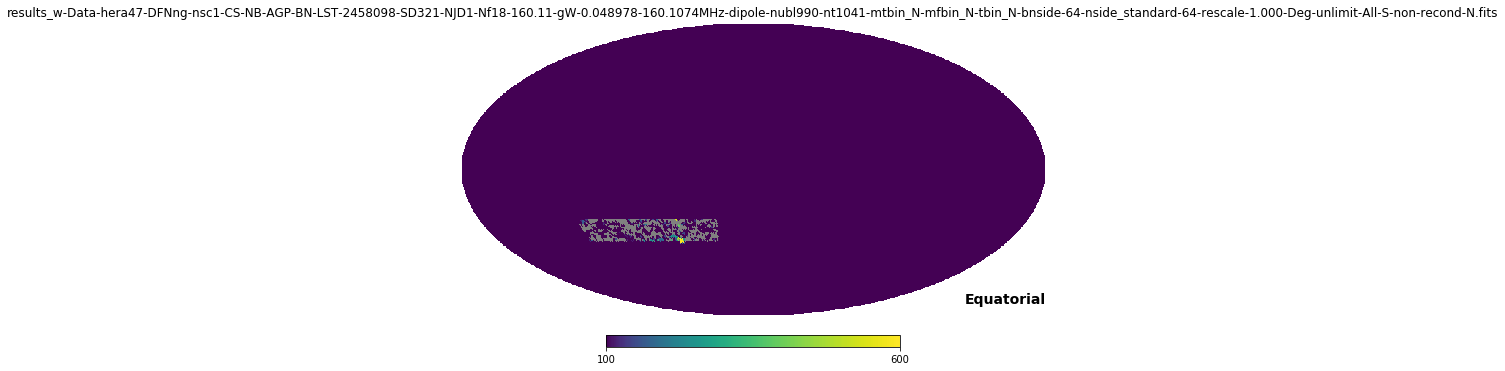

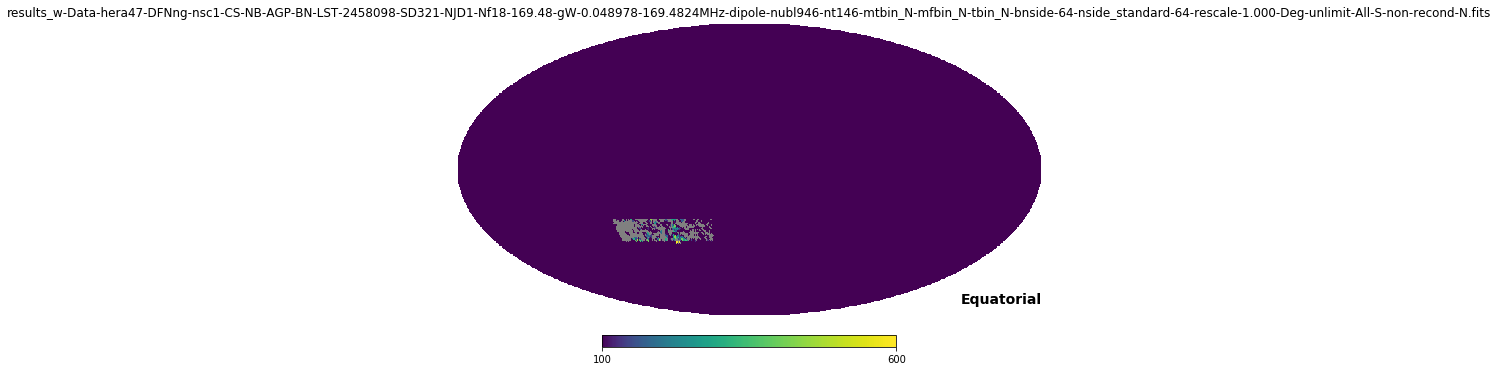

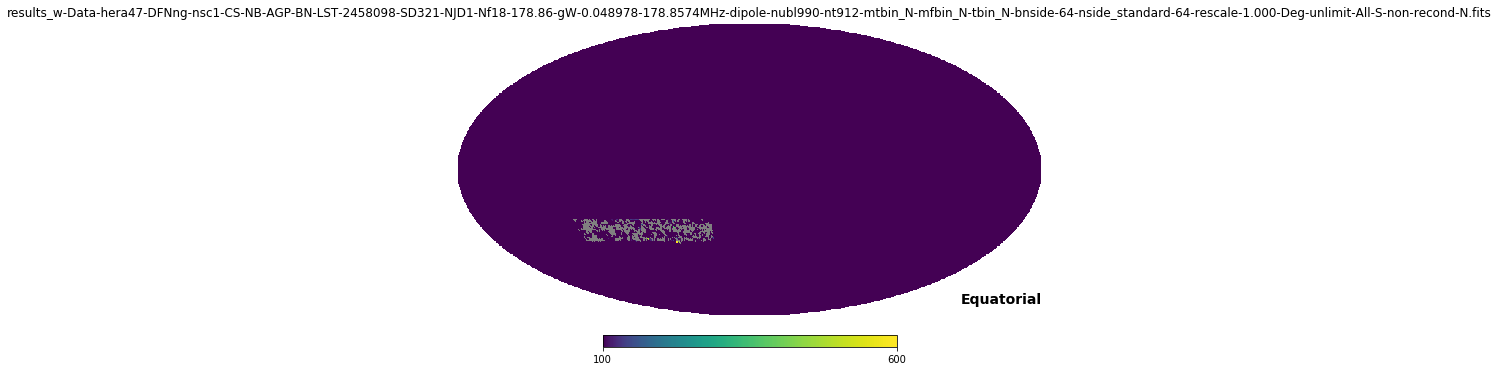

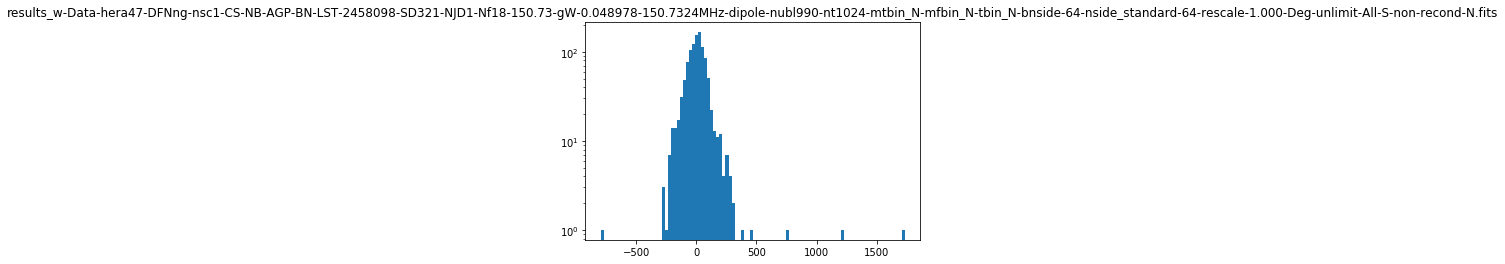

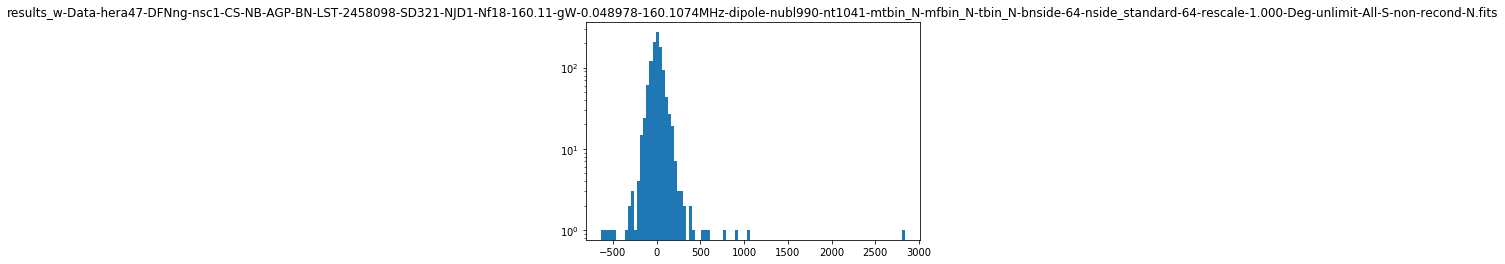

In [250]:
for id_file, fitfile in enumerate(filenames_64_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map64-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(250000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(650000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

>>>>>>>> Number of Valid Pixels: 1110
>>>>>>>> Number of Valid Pixels: 906
>>>>>>>> Number of Valid Pixels: 1102
>>>>>>>> Number of Valid Pixels: 1110
>>>>>>>> Number of Valid Pixels: 1093
>>>>>>>> Number of Valid Pixels: 1110
>>>>>>>> Number of Valid Pixels: 780
>>>>>>>> Number of Valid Pixels: 1102
maps_mfreq_64_321 shape: (8, 49152)
maps_mfreq_common_64_321 shape: (8, 584)
Number of Common Valid Pixels-64_321: 584
EigenValues: 
[2.97763378e+04 1.77410313e+04 1.03088163e+04 9.25708174e+03
 3.31046350e+03 2.51584957e+03 1.67136782e+03 2.60740074e-12]

EigenValuesRatio: 
[6.27293455e-01 2.22682411e-01 7.51875257e-02 6.06284390e-02
 7.75364296e-03 4.47813860e-03 1.97638826e-03 4.80998541e-33]

EigenVectorsShape: (8, 584)

Maps64_Common_NewSpace shape: (8, 8)

Maps64_Common_NewSpace: [[ 2.49423016e+03 -3.36054347e+03  9.30082843e+03  1.12280493e+03
  -1.43571425e+02 -1.06358910e+01  6.45132460e+01  9.21855372e-13]
 [-8.42400696e+03  1.51160467e+04  1.02716860e+03 -2.24184674e+03
   3.511

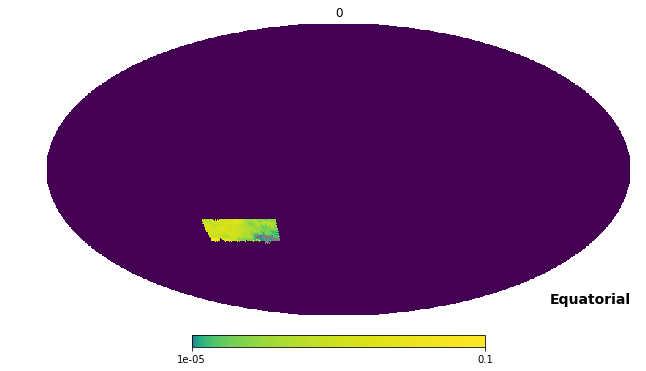

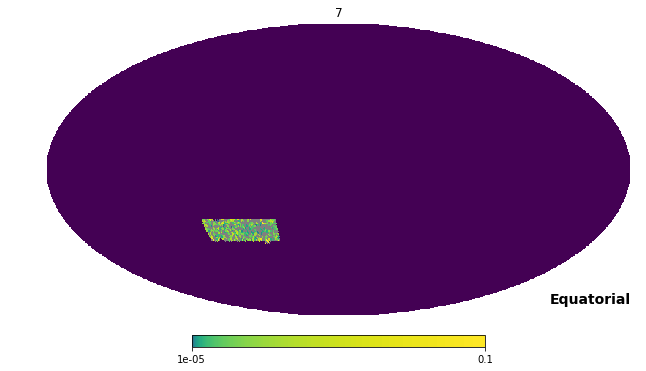

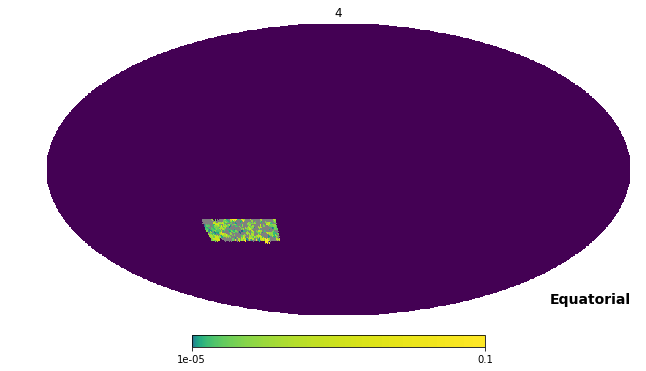

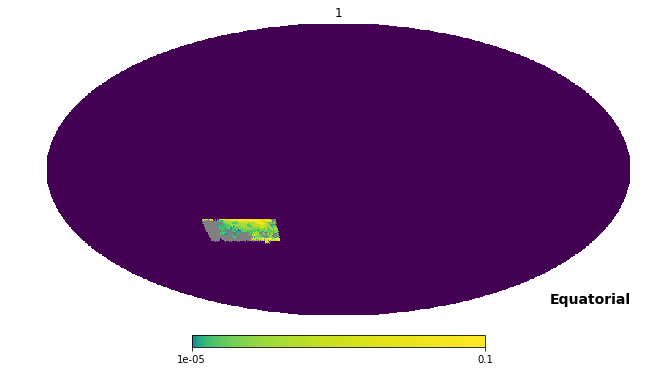

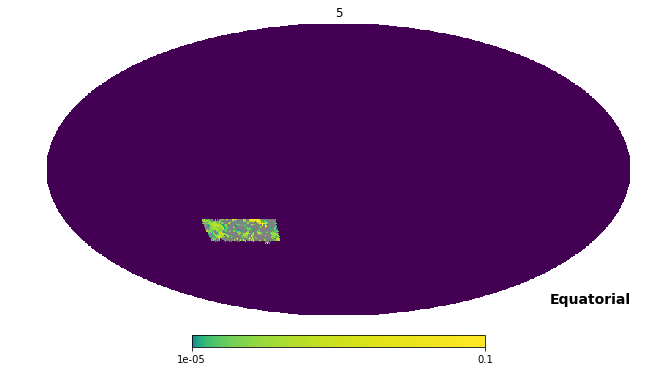

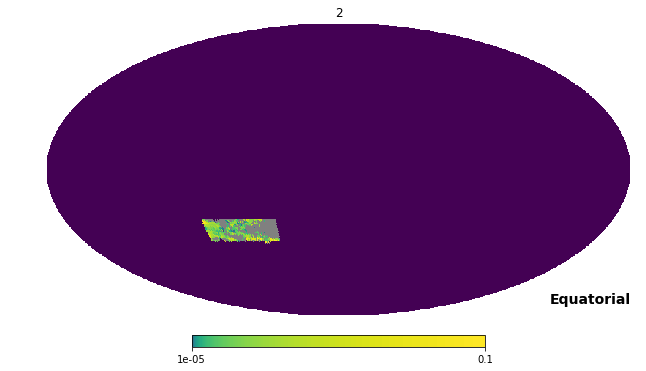

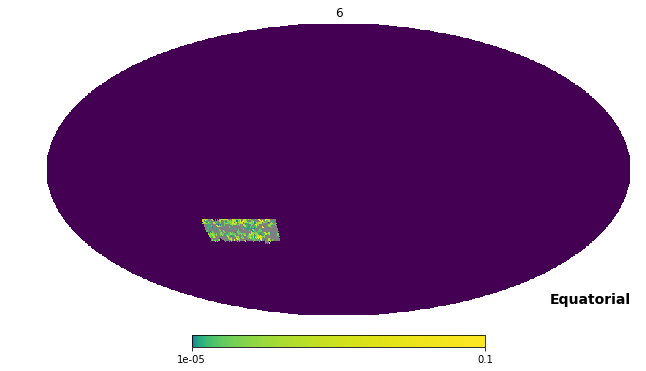

In [515]:
maps_mfreq_64_321 = []
for id_file, fitfile in enumerate(filenames_64_321):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 750.:
        maps_mfreq_64_321.append(map_fit)
        
maps_mfreq_64_321 = np.array(maps_mfreq_64_321)
commom_vp_mask_64_321 = np.prod(np.abs(maps_mfreq_64_321) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_64_321 = maps_mfreq_64_321[:, commom_vp_mask_64_321]
print('maps_mfreq_64_321 shape: {}'.format(maps_mfreq_64_321.shape))
print('maps_mfreq_common_64_321 shape: {}'.format(maps_mfreq_common_64_321.shape))
print('Number of Common Valid Pixels-64_321: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_64_321) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_64_321)
maps_mfreq_common_64_321_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_64_321_eigValues = pca.singular_values_
maps_mfreq_common_64_321_eigVectors = pca.components_
maps_mfreq_common_64_321_newspace = pca.fit_transform(maps_mfreq_common_64_321)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_64_321_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_64_321_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_64_321_eigVectors.shape))
print('Maps64_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_64_321_newspace.shape))
print('Maps64_Common_NewSpace: {}'.format(maps_mfreq_common_64_321_newspace))

id_freq = 0
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_321[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_64_321_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_321_newspace[id_freq].dot(maps_mfreq_common_64_321_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_64_321[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_64_321_newspace[id_freq].dot(maps_mfreq_common_64_321_eigVectors))[-number_to_show:])

maps_mfreq_common_64_321_eigVectors_full = np.ones_like(maps_mfreq_64_321) * 10**(-5)
maps_mfreq_common_64_321_eigVectors_full[:, commom_vp_mask_64_321] = maps_mfreq_common_64_321_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_64_321_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-5), max=10.**(-1), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [251]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_64 = fits.getdata(filenames_64_321[4]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_64[np.argsort(ww_solution_part_64)[-80:]]))




Bright_Pixels_Data: [[-34.22886633 -35.68533471 -30.69158768 -35.68533471 -34.95386526
  -27.27961274 -32.08995126 -27.27961274 -32.7971683  -35.68533471
  -34.22886633 -34.95386526 -34.22886633 -27.95318688 -28.63098984
  -26.61009781 -35.68533471 -34.95386526 -28.63098984 -27.27961274
  -27.95318688 -34.22886633 -30.         -35.68533471 -25.94447977
  -28.63098984 -34.22886633 -25.94447977 -26.61009781 -34.22886633
  -33.51005607 -33.51005607 -36.42357364 -27.95318688 -25.94447977
  -27.27961274 -29.31319896 -34.22886633 -34.95386526 -27.27961274
  -32.7971683  -34.22886633 -25.28260304 -35.68533471 -29.31319896
  -36.42357364 -35.68533471 -33.51005607 -35.68533471 -32.7971683
  -35.68533471 -29.31319896 -35.68533471 -34.22886633 -34.22886633
  -27.95318688 -34.95386526 -28.63098984 -34.95386526 -25.94447977
  -34.95386526 -36.42357364 -34.95386526 -36.42357364 -25.28260304
  -34.95386526 -25.28260304 -34.95386526 -35.68533471 -27.95318688
  -27.95318688 -36.42357364 -36.42357364 -3

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt658-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-part without Fornax A: 48.3393048953
>>>>>>>> Maximum in the Map: 2528.58789102
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-114.79-gW-0.048978-114.7949MHz-dipole-nubl990-nt653-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-part without Fornax A: 49.5559955969
>>>>>>>> Maximum in the Map: 3094.13164375
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt443-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map32-part without Fornax A: 76.0483798289
>>>>>>>> Maximum in the

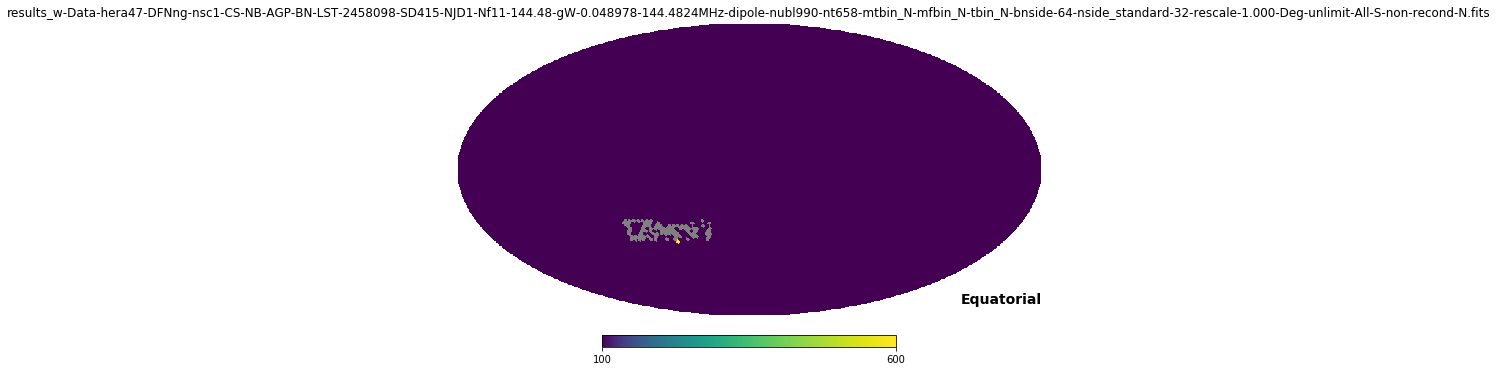

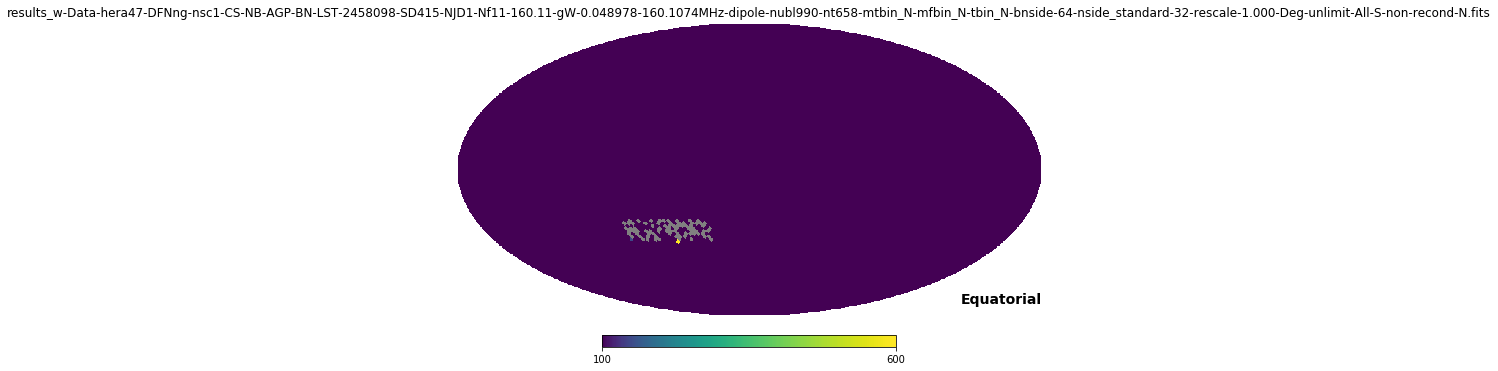

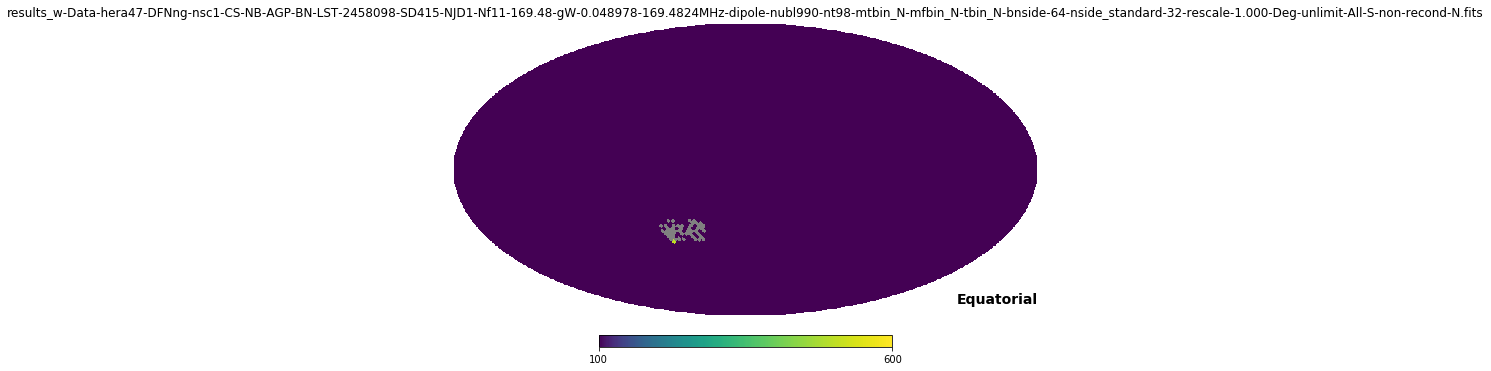

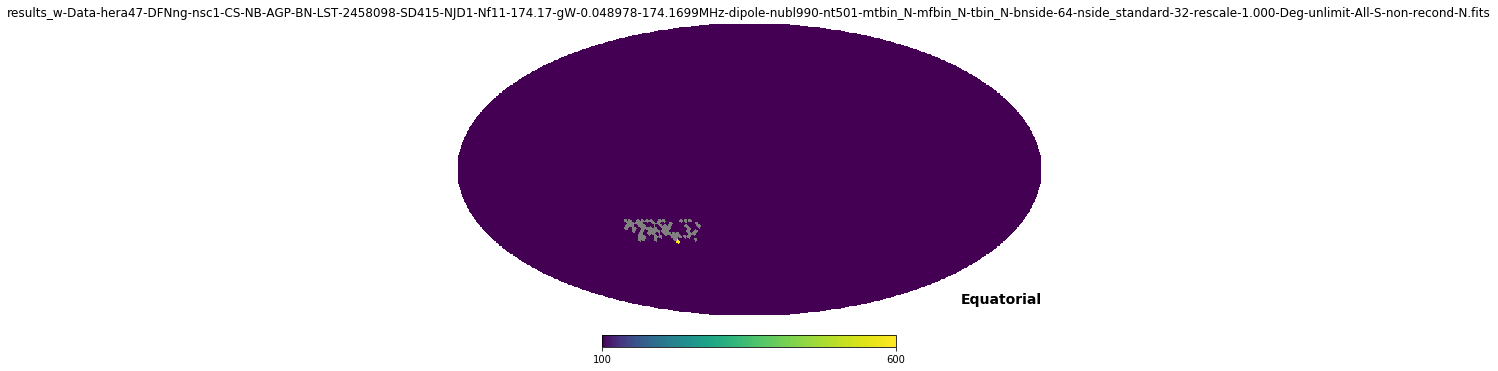

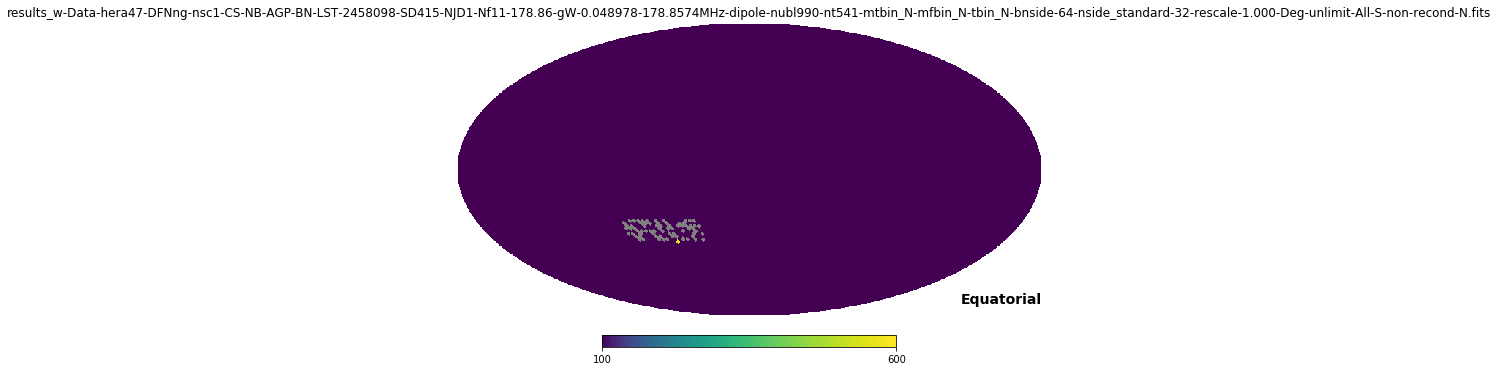

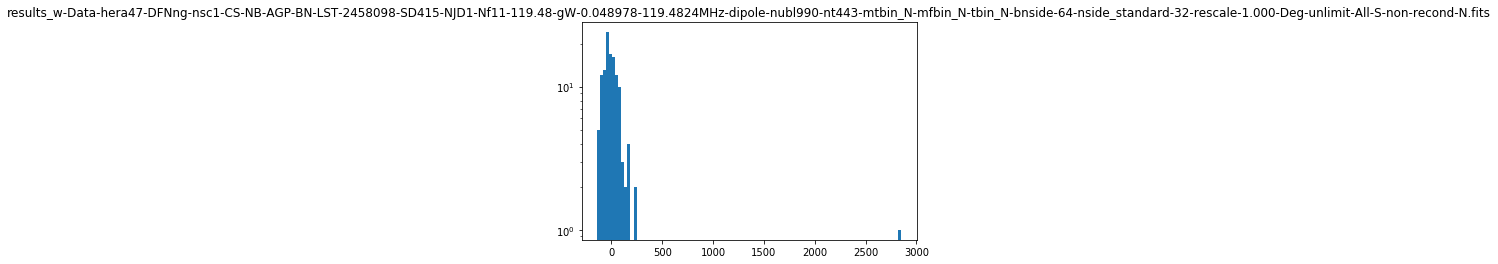

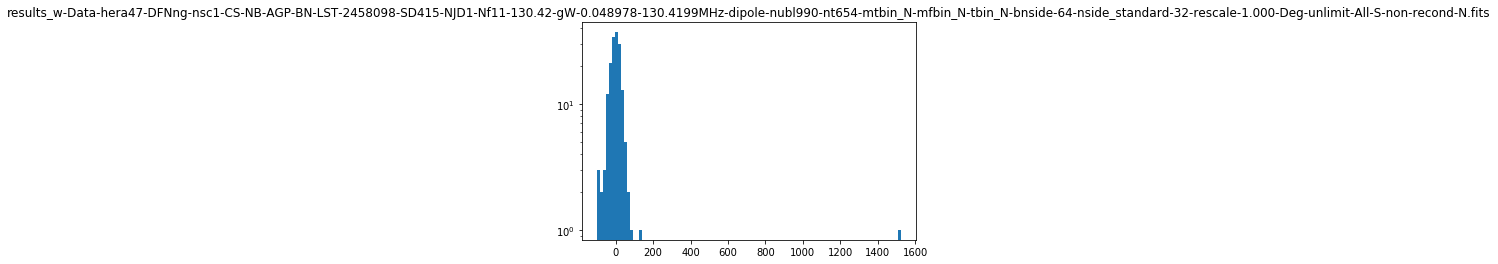

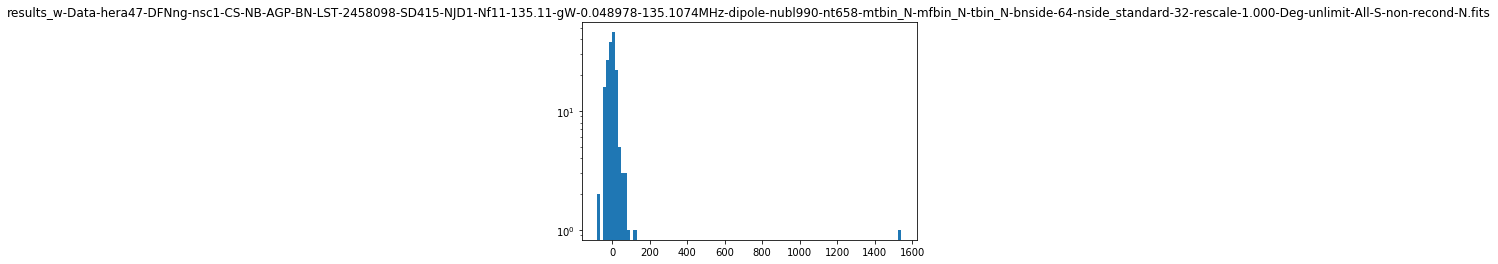

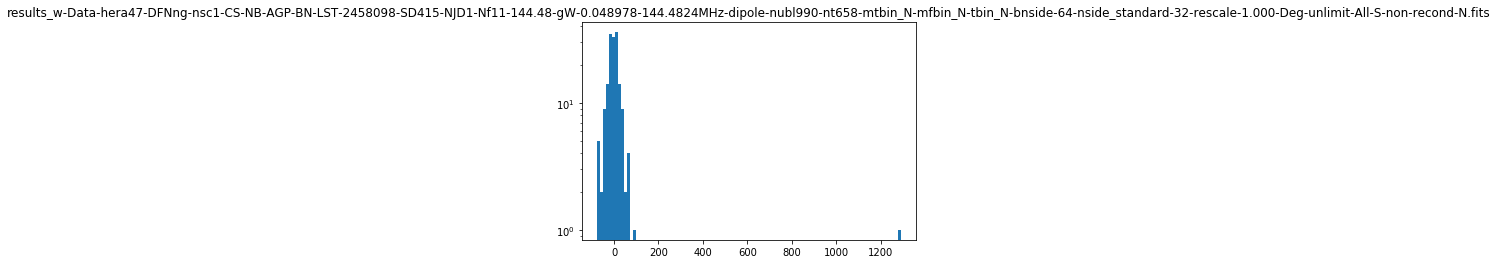

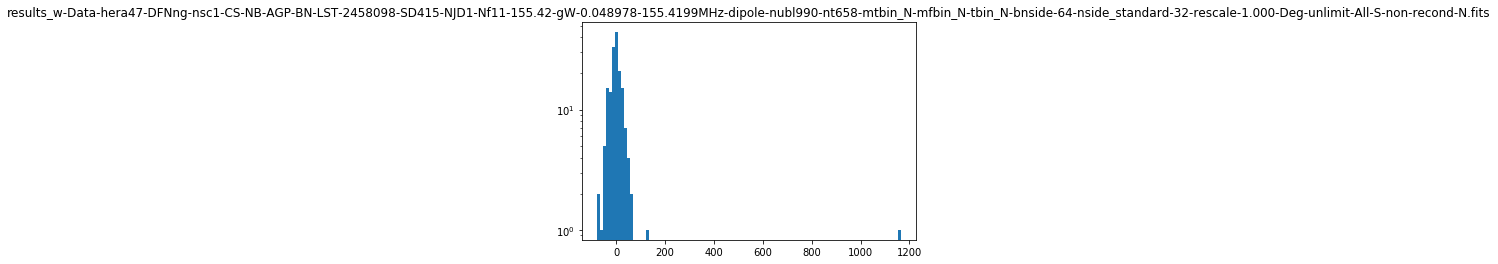

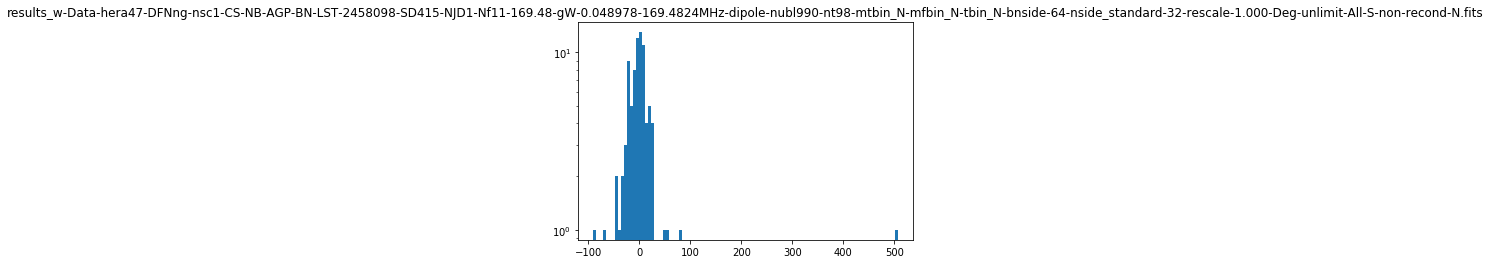

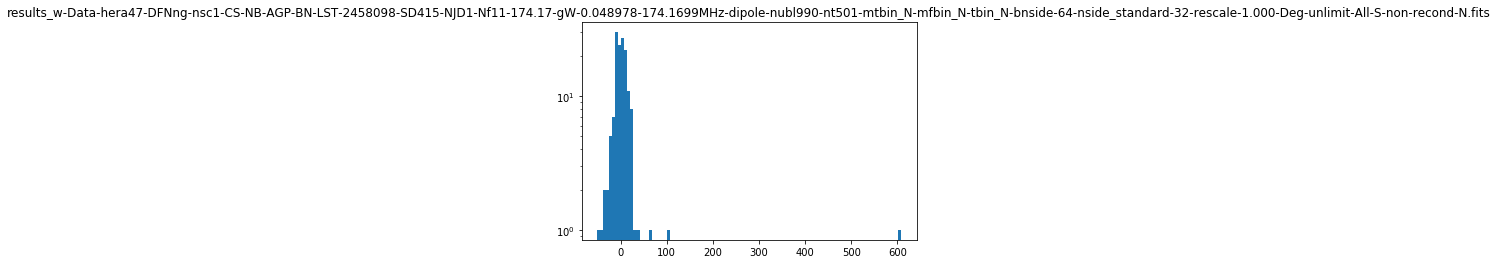

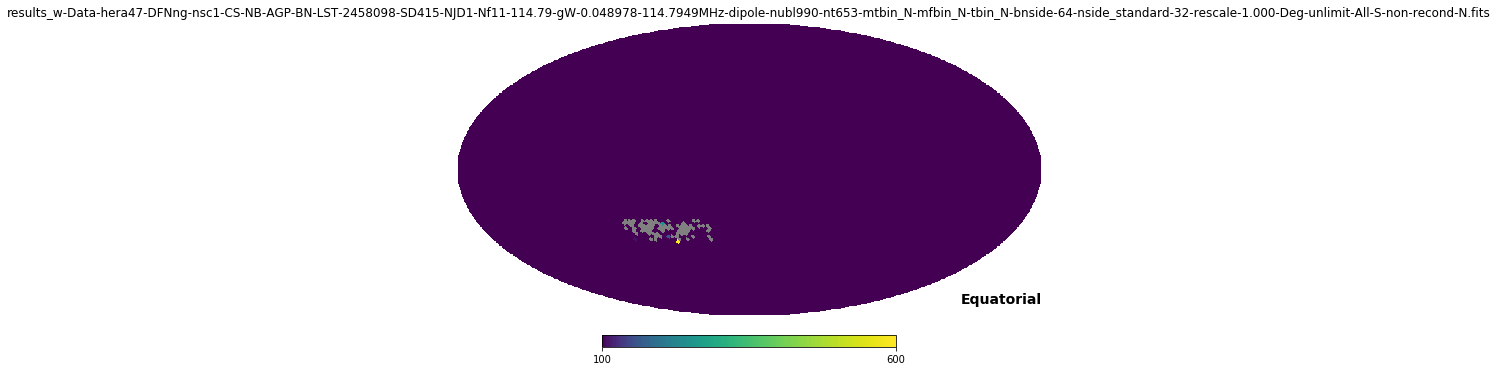

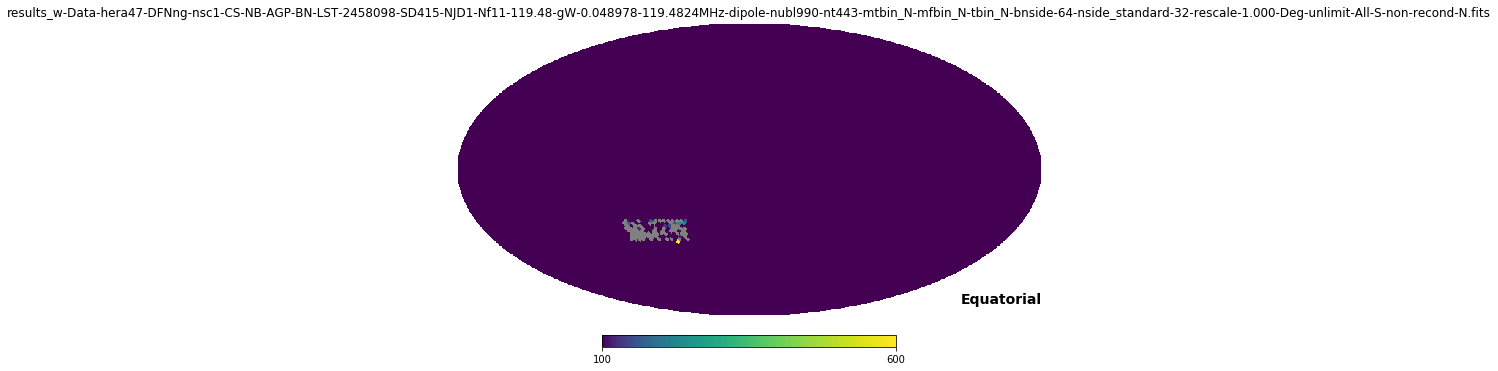

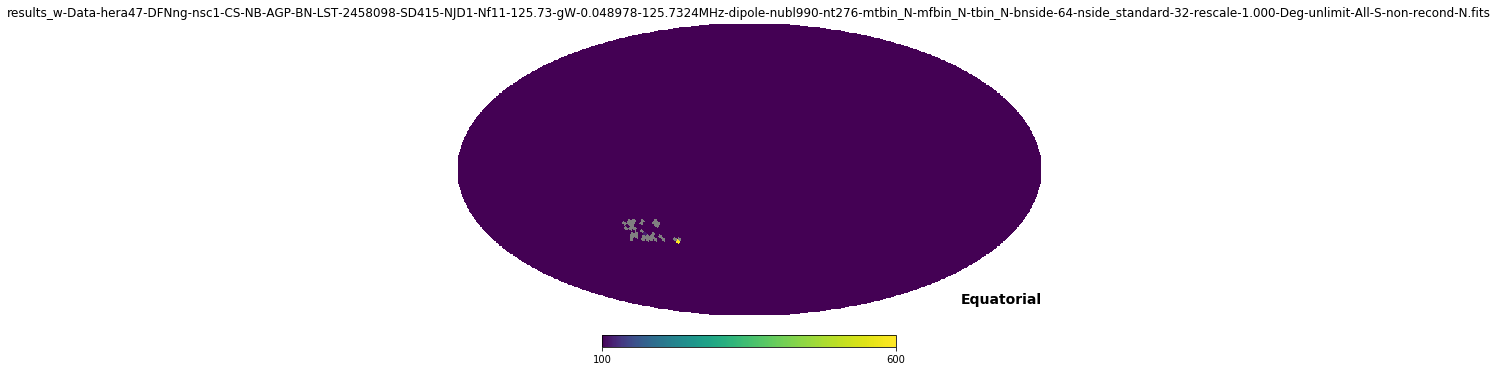

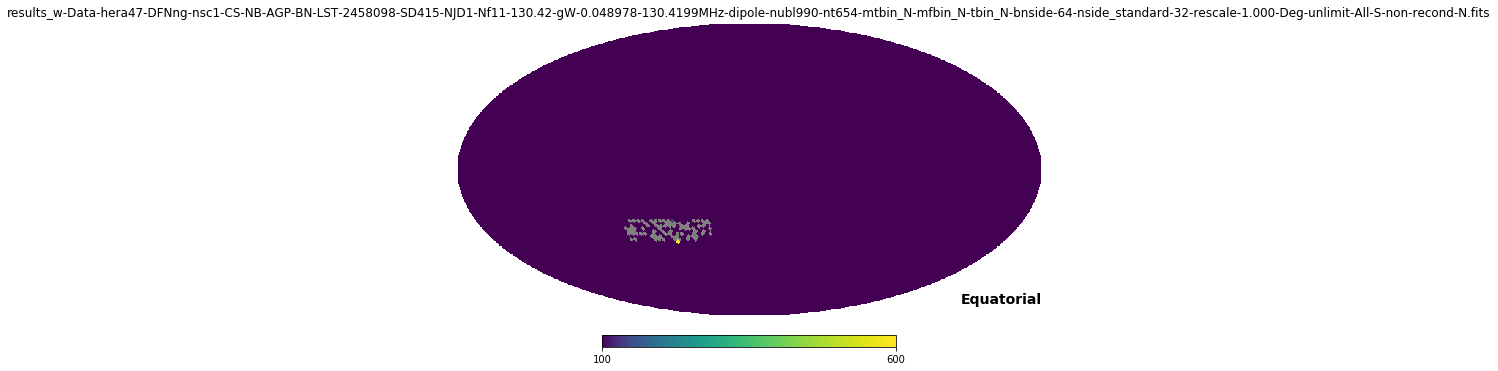

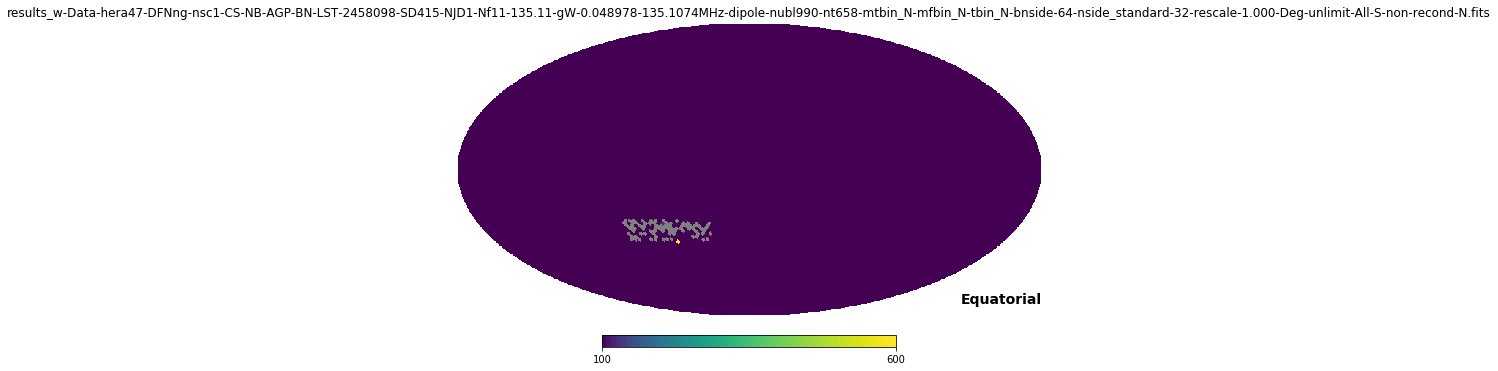

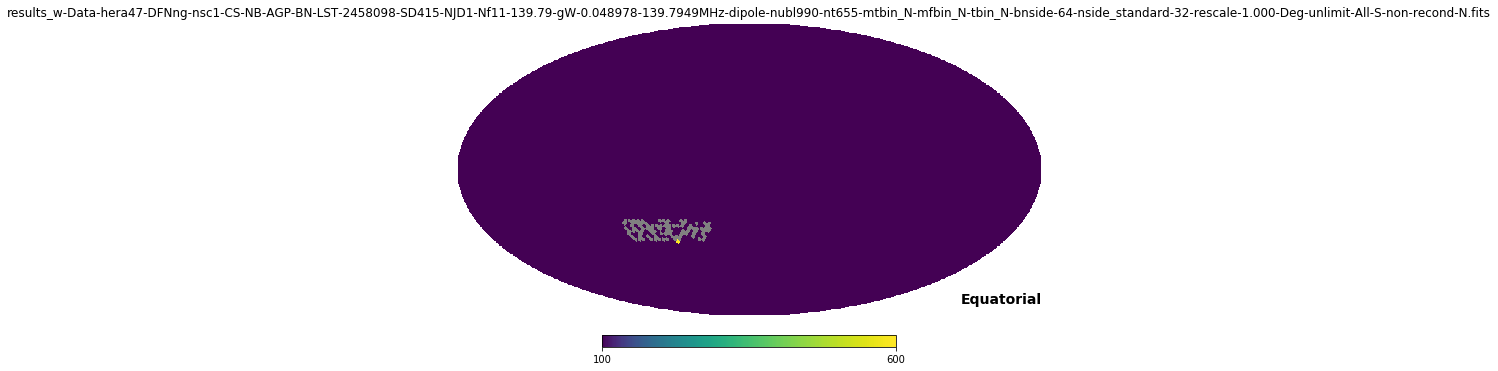

In [252]:
for id_file, fitfile in enumerate(filenames_32_415):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map32-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(35000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(75000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 121
>>>>>>>> Number of Valid Pixels: 71
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 165
>>>>>>>> Number of Valid Pixels: 85
>>>>>>>> Number of Valid Pixels: 145
>>>>>>>> Number of Valid Pixels: 149
maps_mfreq_32_415 shape: (13, 12288)
maps_mfreq_common_32_415 shape: (13, 121)
Number of Common Valid Pixels-32_415: 121
EigenValues: 
[2.96053018e+03 7.81182336e+02 5.27922617e+02 4.23744751e+02
 3.81743112e+02 3.56011950e+02 3.08458939e+02 2.97650649e+02
 2.73608258e+02 2.35115157e+02 2.32913853e+02 1.61338204e+02
 1.66698119e-13]

EigenValuesRatio: 
[8.34746477e-01 5.81193084e-02 2.65433752e-02 1.71011088e-02
 1.38789953e-02 1.20710420e-02 

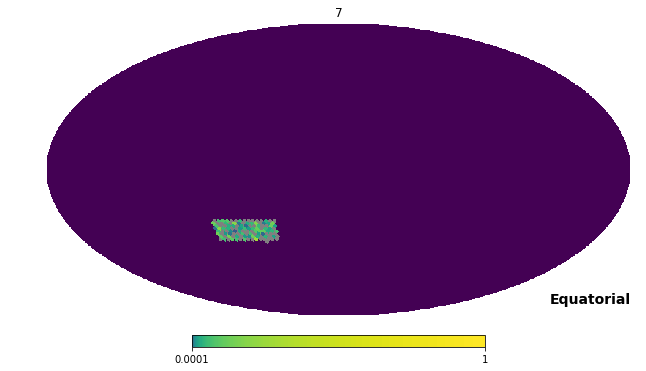

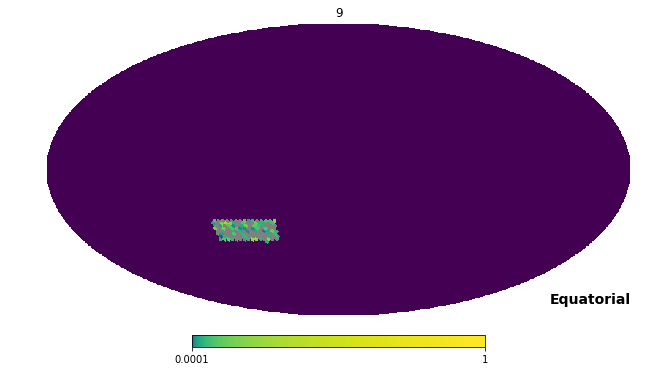

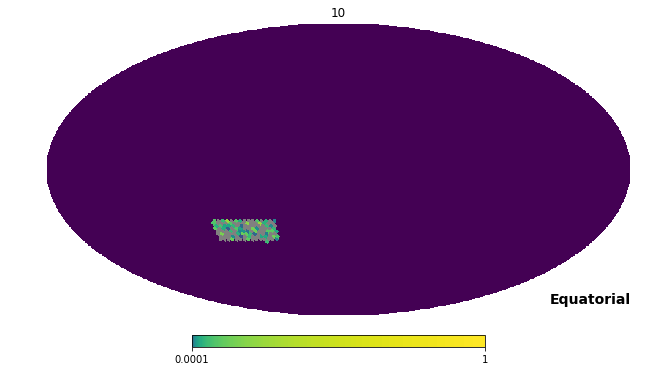

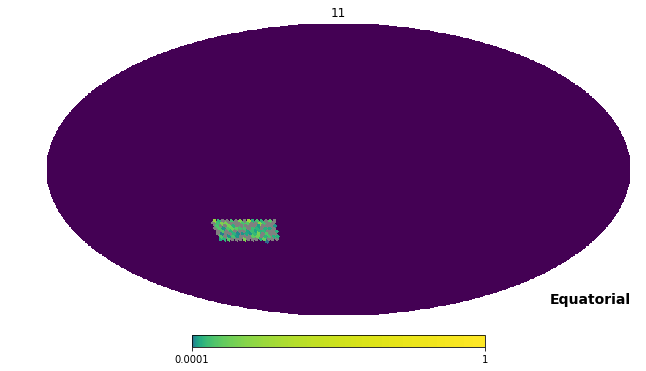

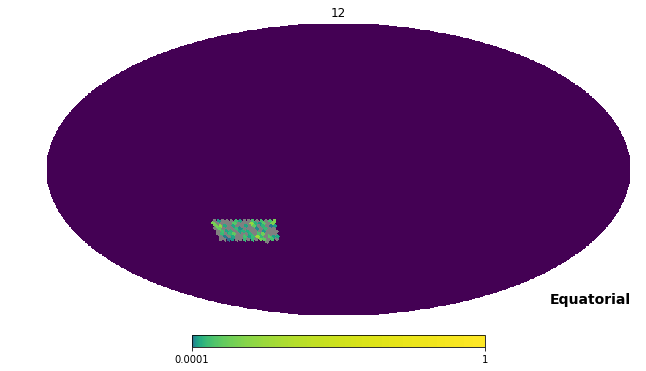

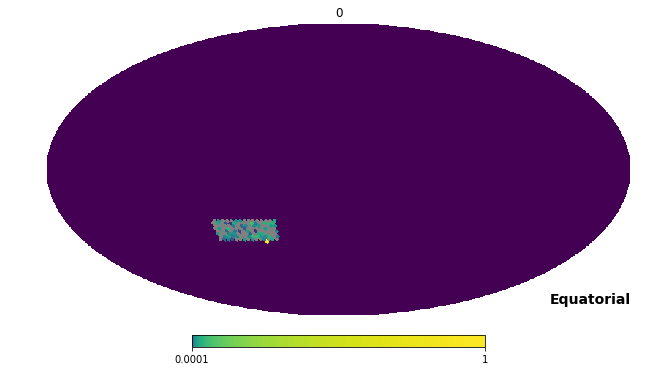

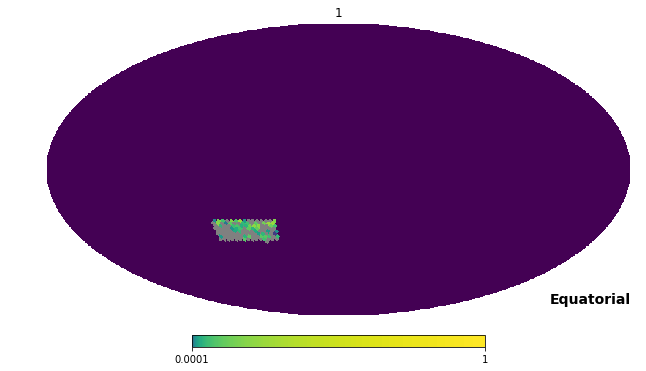

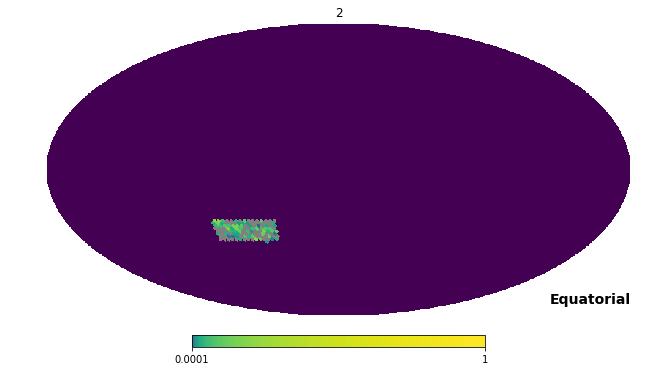

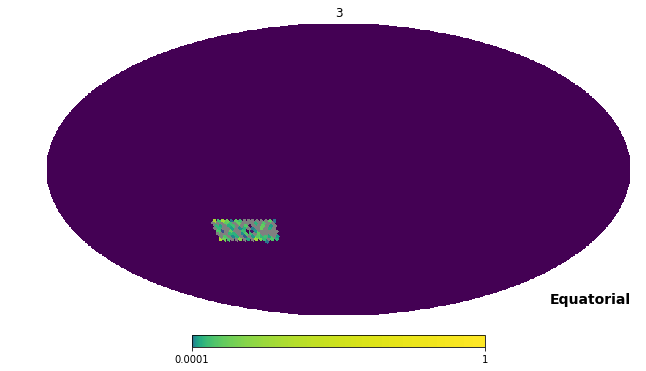

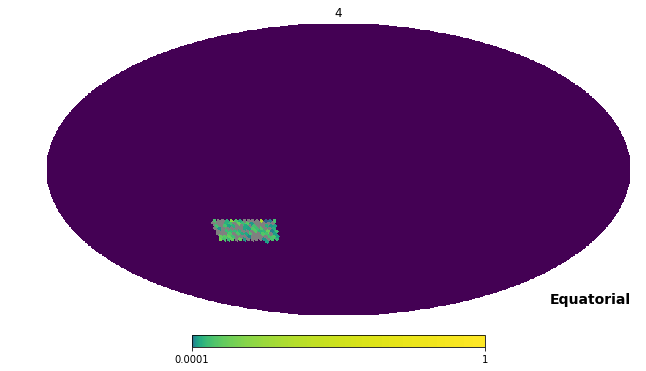

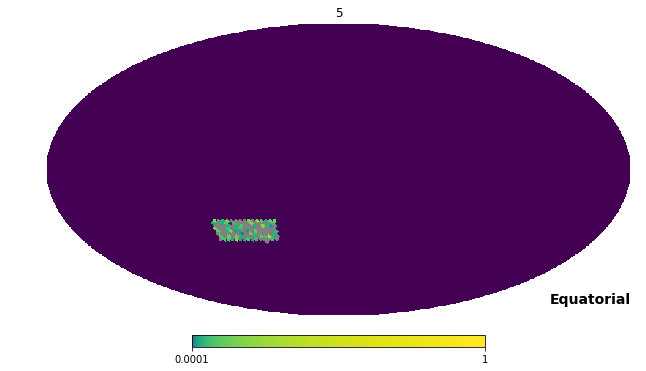

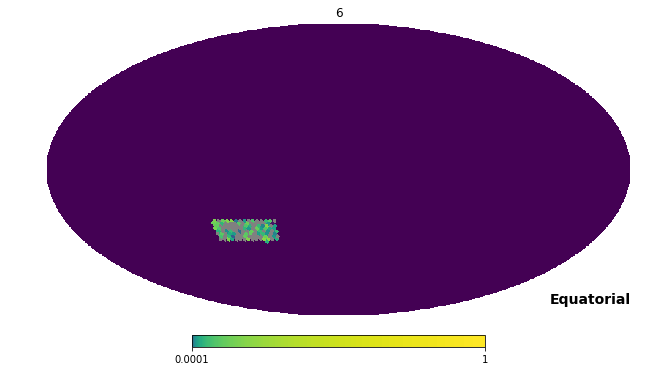

In [516]:
maps_mfreq_32_415 = []
for id_file, fitfile in enumerate(filenames_32_415):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 100.:
        maps_mfreq_32_415.append(map_fit)
        
maps_mfreq_32_415 = np.array(maps_mfreq_32_415)
commom_vp_mask_32_415 = np.prod(np.abs(maps_mfreq_32_415) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_32_415 = maps_mfreq_32_415[:, commom_vp_mask_32_415]
print('maps_mfreq_32_415 shape: {}'.format(maps_mfreq_32_415.shape))
print('maps_mfreq_common_32_415 shape: {}'.format(maps_mfreq_common_32_415.shape))
print('Number of Common Valid Pixels-32_415: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_32_415) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_32_415)
maps_mfreq_common_32_415_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_32_415_eigValues = pca.singular_values_
maps_mfreq_common_32_415_eigVectors = pca.components_
maps_mfreq_common_32_415_newspace = pca.fit_transform(maps_mfreq_common_32_415)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_32_415_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_32_415_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_32_415_eigVectors.shape))
print('Maps32_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_32_415_newspace.shape))
print('Maps32_Common_NewSpace: {}'.format(maps_mfreq_common_32_415_newspace))

id_freq = 8
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_415[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_32_415_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_32_415_newspace[id_freq].dot(maps_mfreq_common_32_415_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_32_415[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_32_415_newspace[id_freq].dot(maps_mfreq_common_32_415_eigVectors))[-number_to_show:])

maps_mfreq_common_32_415_eigVectors_full = np.ones_like(maps_mfreq_32_415) * 10**(-5)
maps_mfreq_common_32_415_eigVectors_full[:, commom_vp_mask_32_415] = maps_mfreq_common_32_415_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_32_415_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-4), max=10.**(-0), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [253]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part415_32 = fits.getdata(filenames_32_415[3]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part415_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part415_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part415_32[np.argsort(ww_solution_part415_32)[-40:]]))




Bright_Pixels_Data: [[-28.63098984 -27.27961274 -27.27961274 -25.94447977 -25.94447977
  -24.62431835 -24.62431835 -23.31795707 -25.94447977 -24.62431835
  -24.62431835 -23.31795707 -23.31795707 -22.02431284 -22.02431284
  -20.74237995 -28.63098984 -27.27961274  72.38756093  -1.19374844
   84.14973294  73.86549609  73.86549609  78.28414761  72.38756093
   78.28414761  85.61313404  75.34073424  76.81353334  67.93492865
   76.81353334  79.75282793  69.42254649  78.28414761  69.42254649
   78.28414761  70.90666664  76.81353334  73.86549609  70.90666664
   72.38756093  72.38756093  73.86549609  73.86549609  72.38756093
   70.90666664  75.34073424  76.81353334  73.86549609  75.34073424
   75.34073424  76.81353334  75.34073424  79.75282793  75.34073424
   76.81353334  78.28414761  78.28414761  79.75282793  76.81353334
   78.28414761  78.28414761  79.75282793  79.75282793  81.21982232
   81.21982232  82.68537621  79.75282793  81.21982232  81.21982232
   82.68537621  82.68537621  84.14973294  

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt658-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-part without Fornax A: 511.345114584
>>>>>>>> Maximum in the Map: 5530.78778905
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-114.79-gW-0.048978-114.7949MHz-dipole-nubl990-nt653-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-part without Fornax A: 717.455437484
>>>>>>>> Maximum in the Map: 8172.06374422
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt443-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
>>>>>>>> STD of the Map64-part without Fornax A: 622.089238069
>>>>>>>> Maximum in the

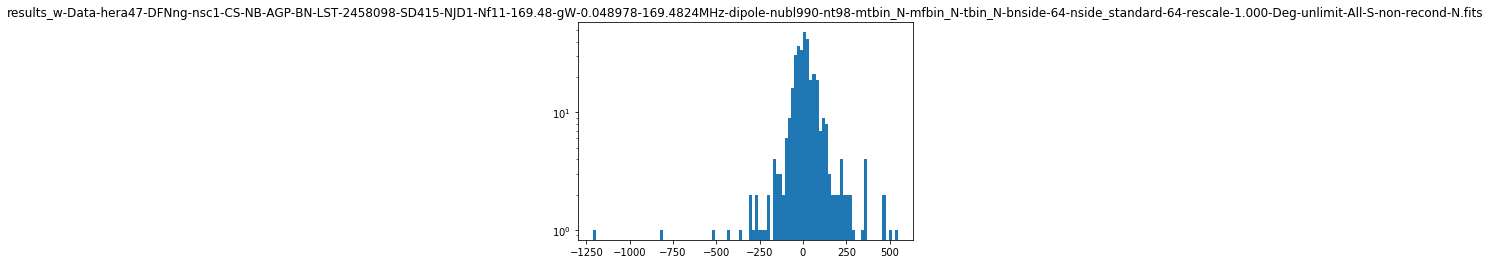

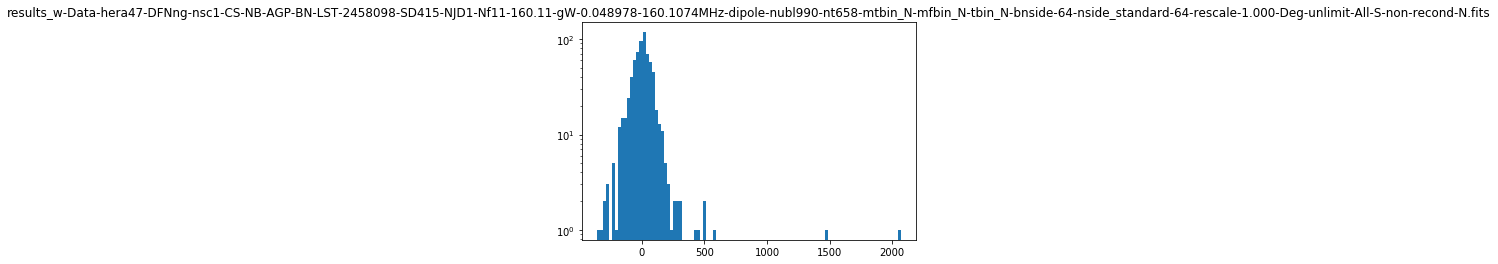

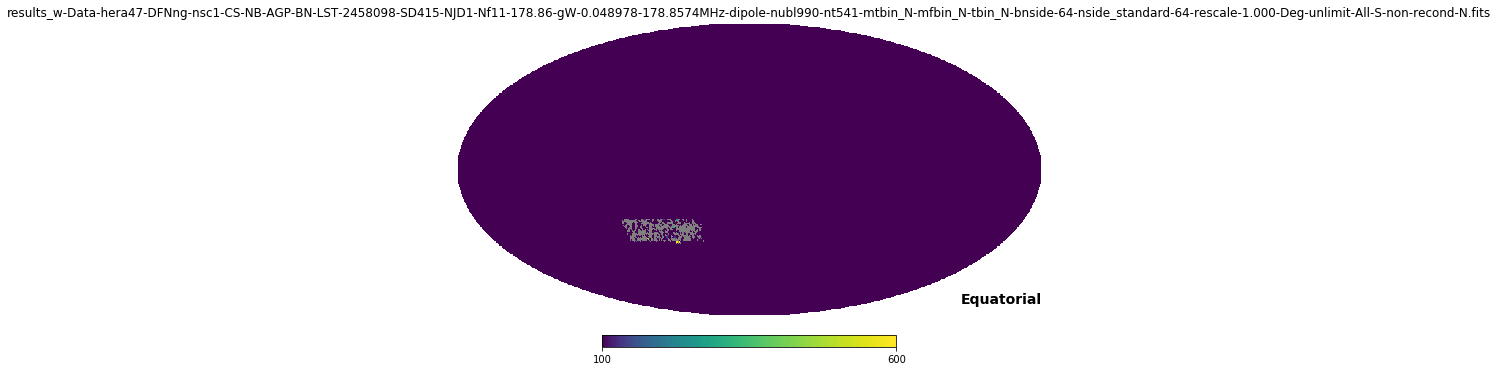

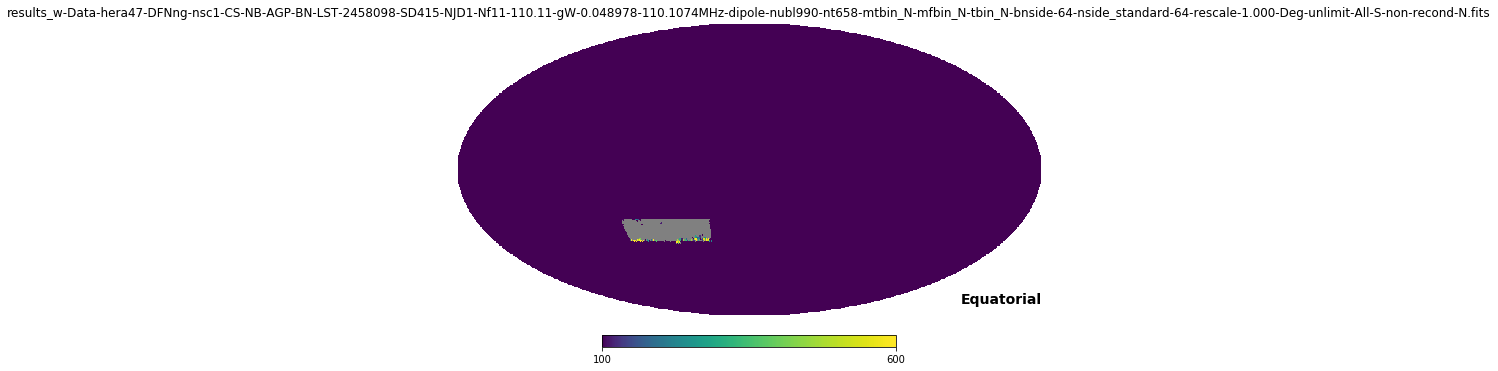

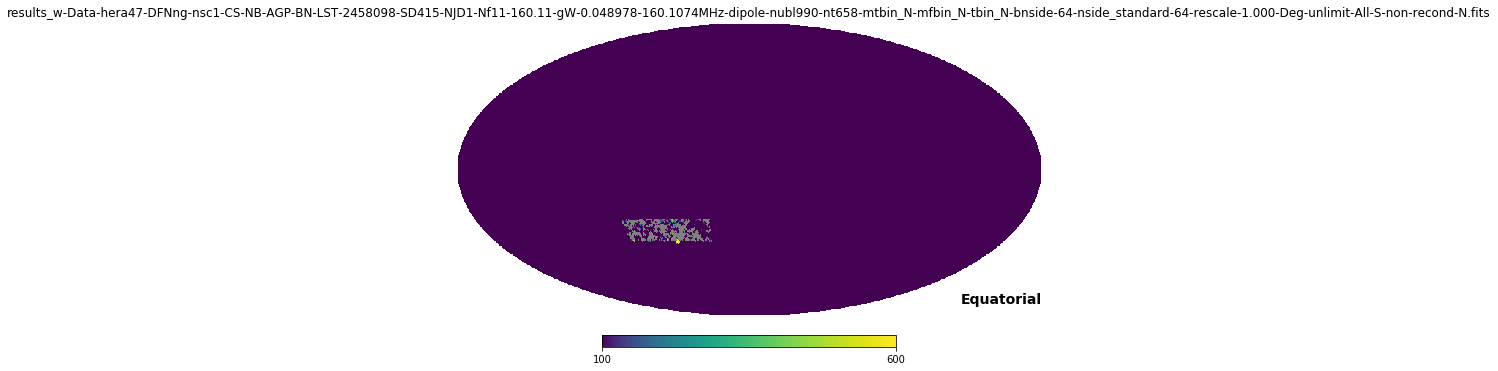

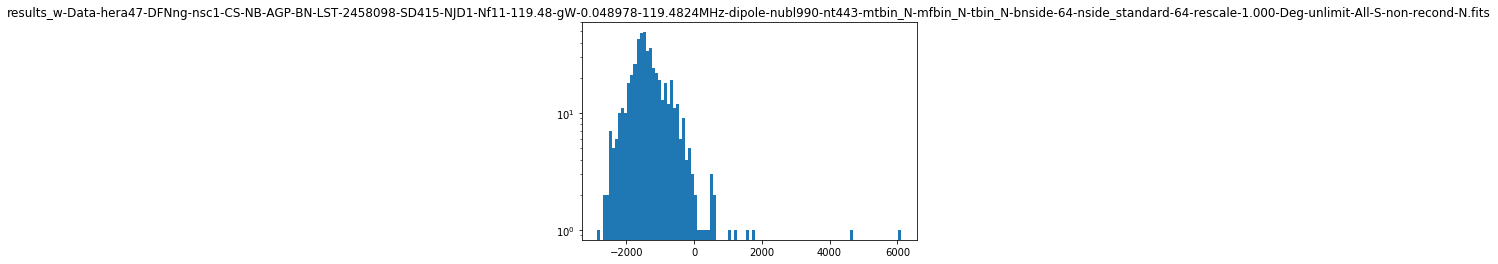

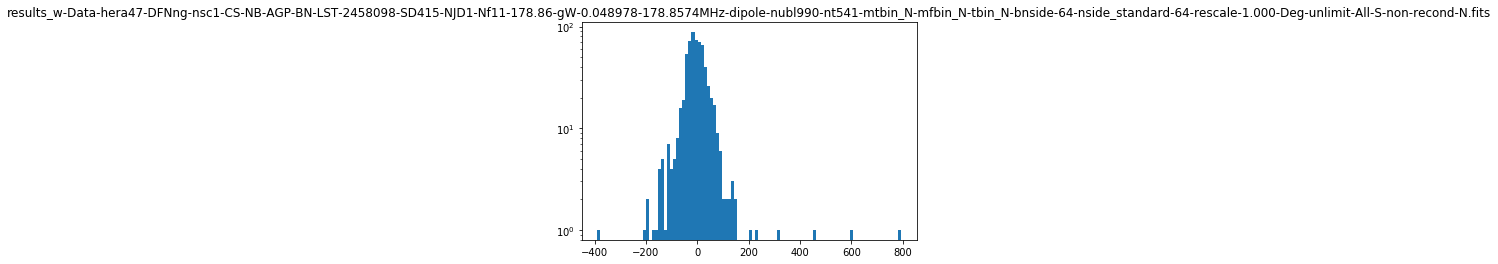

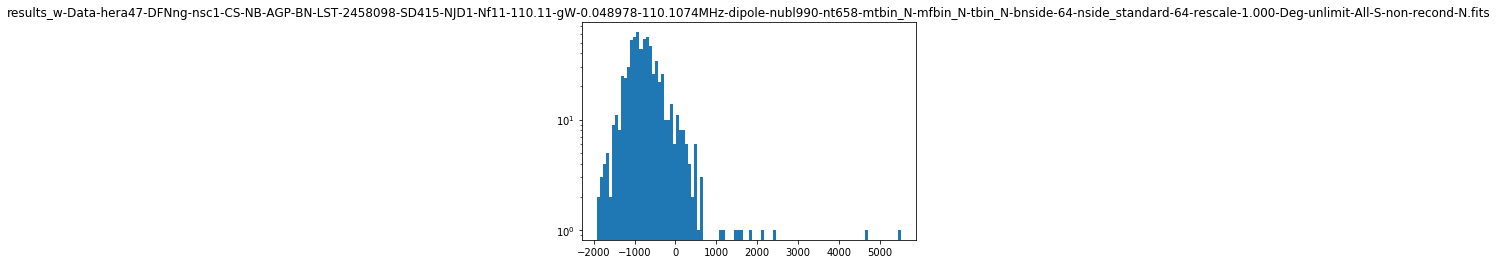

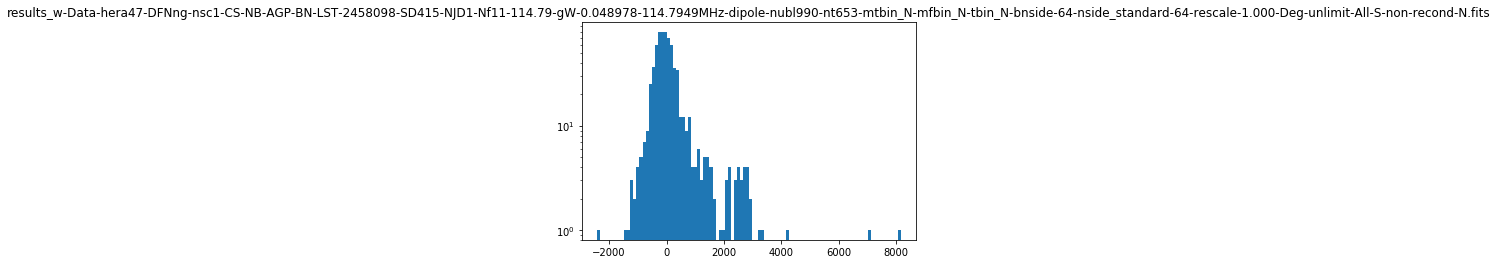

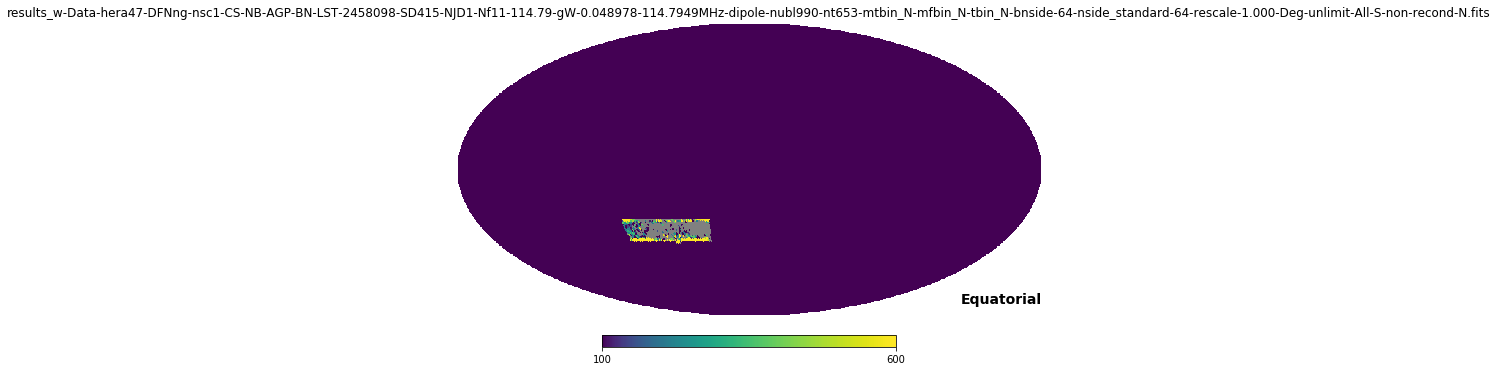

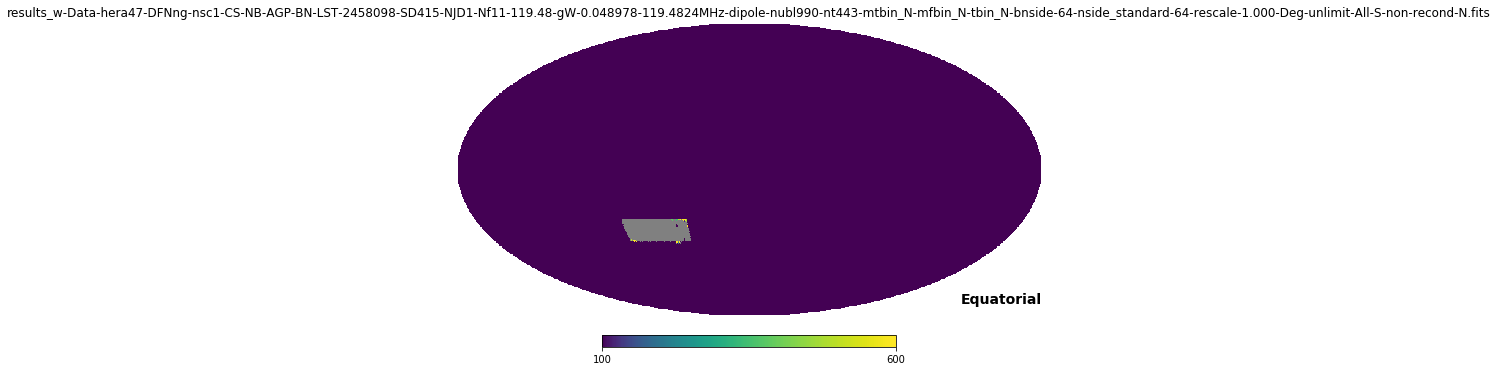

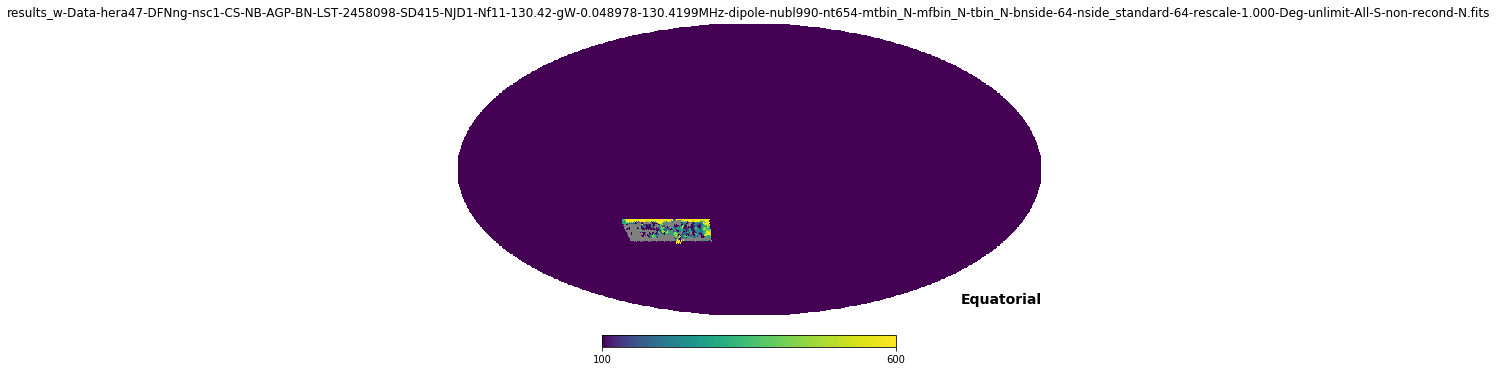

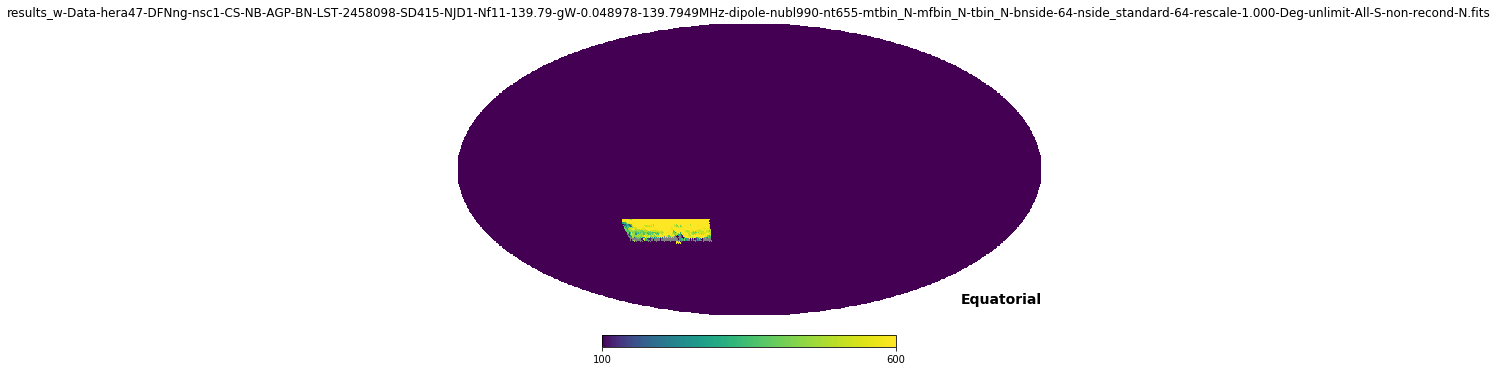

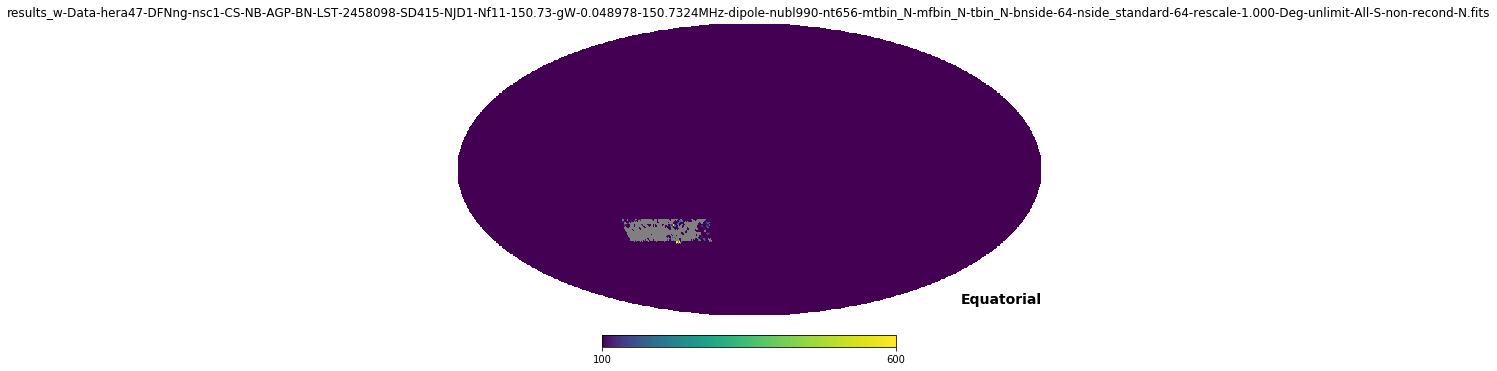

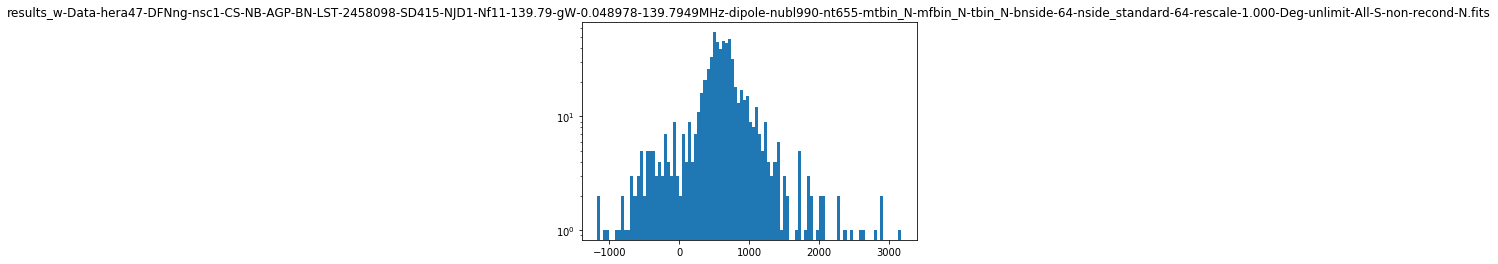

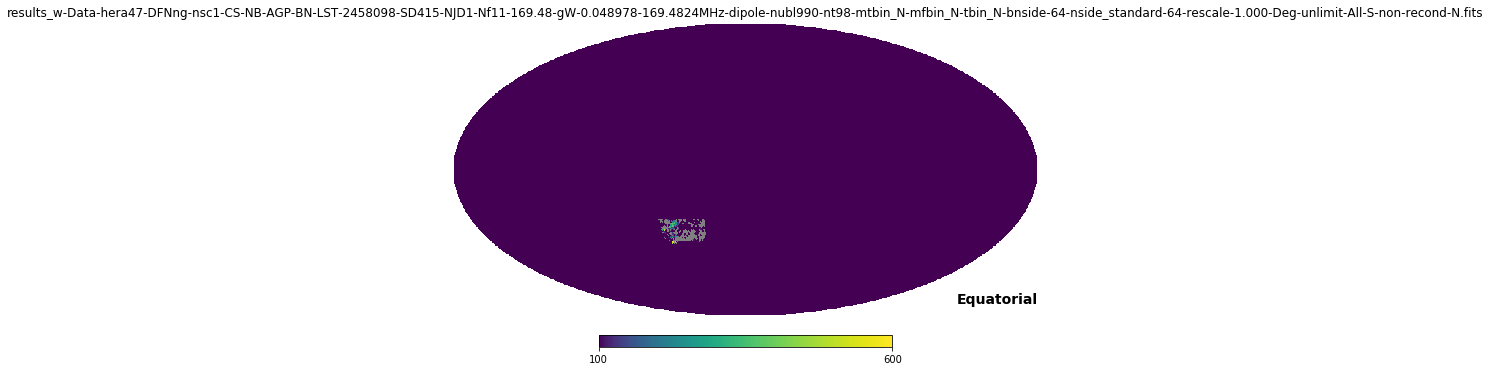

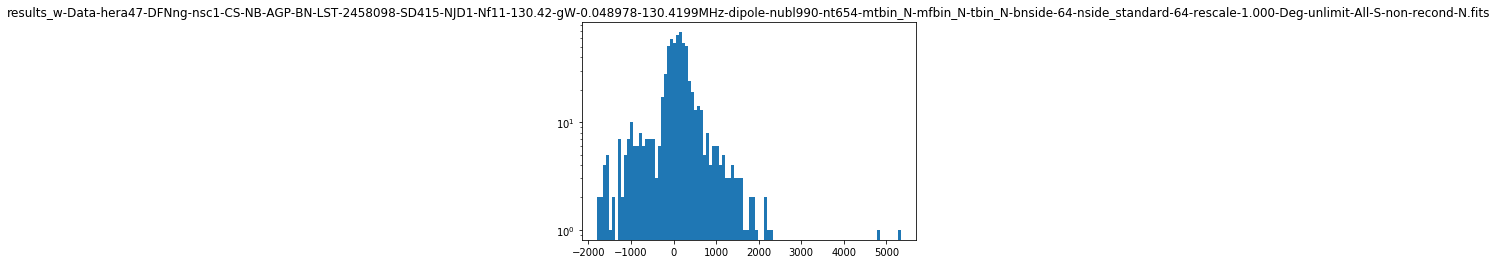

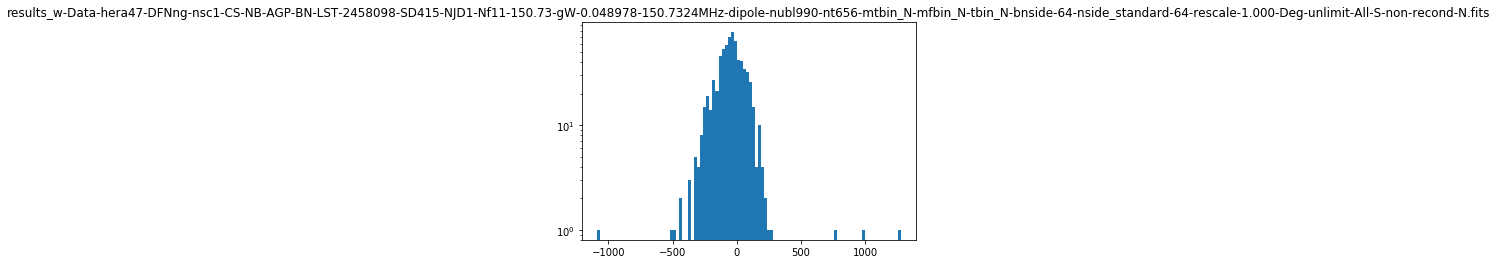

In [254]:
for id_file, fitfile in enumerate(filenames_64_415):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> STD of the Map64-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    print('>>>>>>>> Maximum in the Map: {}'.format(map_fit.max()))
    plt.figure(350000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(750000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

>>>>>>>> Number of Valid Pixels: 702
>>>>>>>> Number of Valid Pixels: 702
>>>>>>>> Number of Valid Pixels: 523
>>>>>>>> Number of Valid Pixels: 702
>>>>>>>> Number of Valid Pixels: 702
>>>>>>>> Number of Valid Pixels: 702
>>>>>>>> Number of Valid Pixels: 702
>>>>>>>> Number of Valid Pixels: 362
>>>>>>>> Number of Valid Pixels: 634
maps_mfreq_64_415 shape: (8, 49152)
maps_mfreq_common_64_415 shape: (8, 523)
Number of Common Valid Pixels-64_415: 523
EigenValues: 
[3.79907036e+04 2.06866572e+04 1.27883633e+04 1.02982053e+04
 8.49633111e+03 2.70973981e+03 1.68939845e+03 4.68585854e-12]

EigenValuesRatio: 
[6.49193239e-01 1.92486356e-01 7.35612749e-02 4.77026386e-02
 3.24699913e-02 3.30274085e-03 1.28375899e-03 9.87637708e-33]

EigenVectorsShape: (8, 523)

Maps64_Common_NewSpace shape: (8, 8)

Maps64_Common_NewSpace: [[ 1.42686453e+04  5.16346617e+03  2.68696197e+03  7.21046309e+03
   3.14698278e+03  1.32031312e+01 -1.08132909e+01  1.65670118e-12]
 [-5.44922113e+03  1.60491100e+04  2.658434

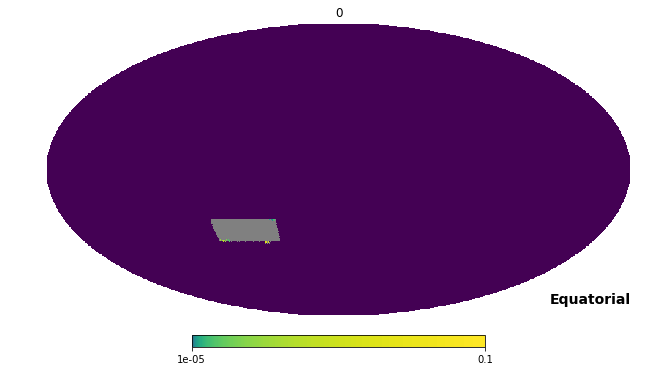

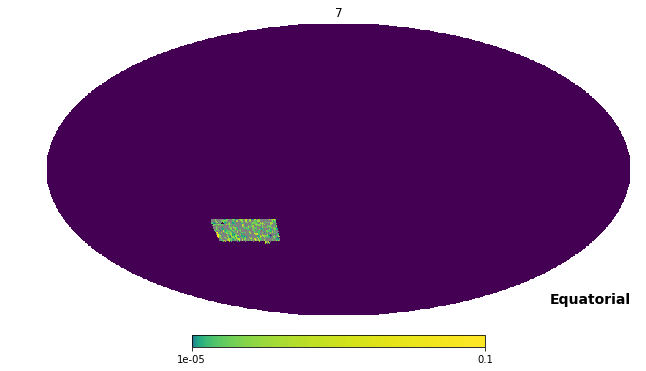

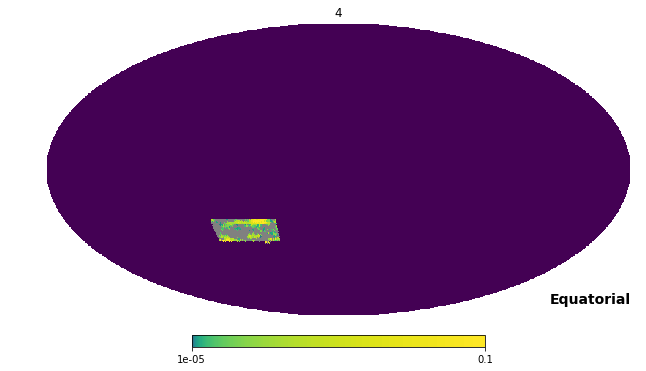

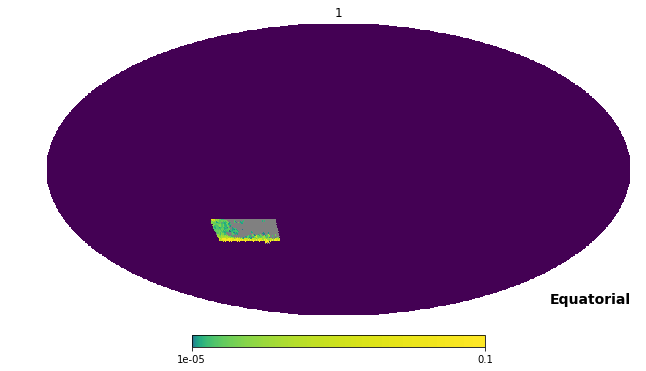

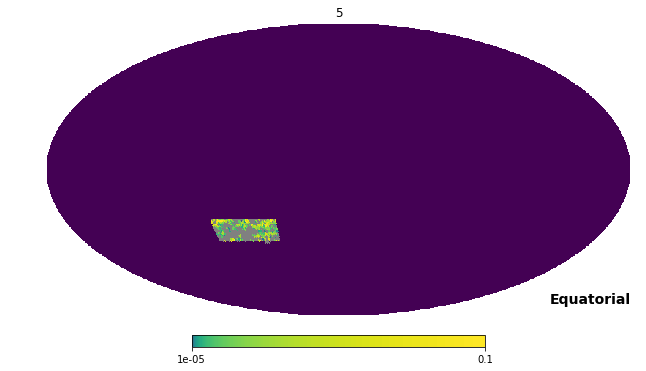

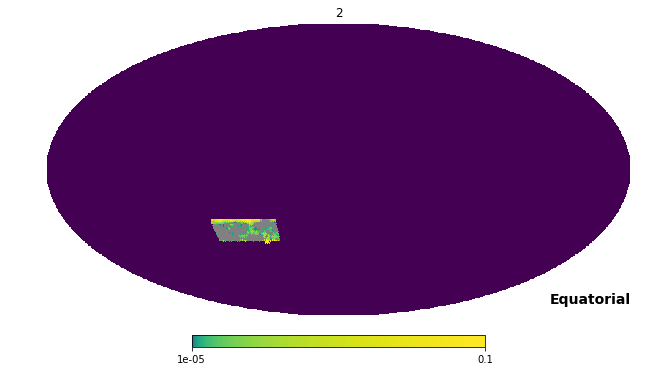

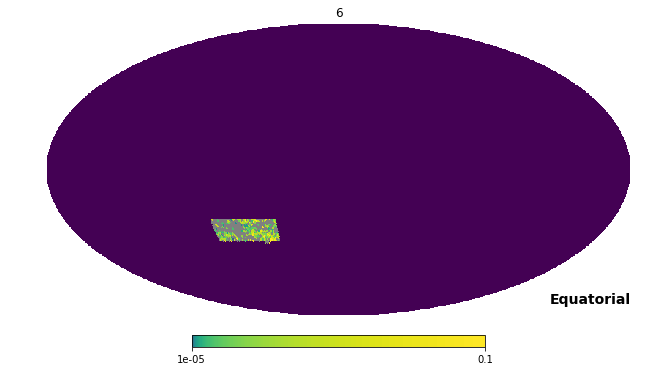

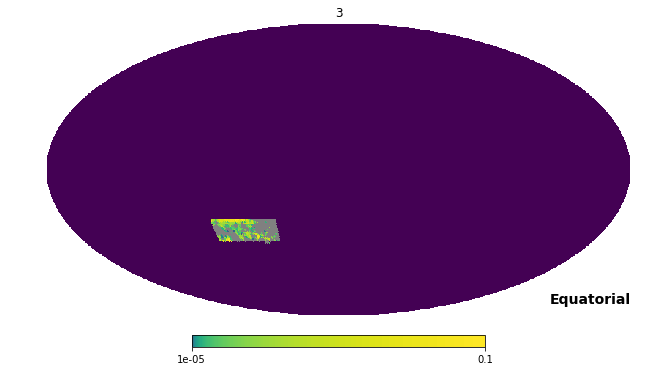

In [517]:
maps_mfreq_64_415 = []
for id_file, fitfile in enumerate(filenames_64_415):
    name = fitfile.split('/')[-1]
#     print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('>>>>>>>> Number of Valid Pixels: {}'.format(len(map_fit[np.abs(map_fit) > 10**(-5)])))
    
    if len(map_fit[np.abs(map_fit) > 10**(-5)]) > 500.:
        maps_mfreq_64_415.append(map_fit)
        
maps_mfreq_64_415 = np.array(maps_mfreq_64_415)
commom_vp_mask_64_415 = np.prod(np.abs(maps_mfreq_64_415) > 10.**(-5), axis=0).astype('bool')
maps_mfreq_common_64_415 = maps_mfreq_64_415[:, commom_vp_mask_64_415]
print('maps_mfreq_64_415 shape: {}'.format(maps_mfreq_64_415.shape))
print('maps_mfreq_common_64_415 shape: {}'.format(maps_mfreq_common_64_415.shape))
print('Number of Common Valid Pixels-64_415: {}'.format(np.sum(np.prod(np.abs(maps_mfreq_64_415) > 10.**(-5), axis=0))))

from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca = PCA()
pca = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(maps_mfreq_common_64_415)
maps_mfreq_common_64_415_eigValues_ratio = pca.explained_variance_ratio_
maps_mfreq_common_64_415_eigValues = pca.singular_values_
maps_mfreq_common_64_415_eigVectors = pca.components_
maps_mfreq_common_64_415_newspace = pca.fit_transform(maps_mfreq_common_64_415)
print('EigenValues: \n{}\n'.format(maps_mfreq_common_64_415_eigValues))
print('EigenValuesRatio: \n{}\n'.format(maps_mfreq_common_64_415_eigValues_ratio))
print('EigenVectorsShape: {}\n'.format(maps_mfreq_common_64_415_eigVectors.shape))
print('Maps64_Common_NewSpace shape: {}\n'.format(maps_mfreq_common_64_415_newspace.shape))
print('Maps64_Common_NewSpace: {}'.format(maps_mfreq_common_64_415_newspace))

id_freq = 5
number_to_show = 30
print('maps_common pixel rank at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_415[id_freq])[-number_to_show:]))
print('eignen_vectors pixel rank: \n{}\n'.format(np.argsort(maps_mfreq_common_64_415_eigVectors, axis=1)[:, -10:]))
print('reconstructed maps_common at {0}th freq: \n{1}\n'.format(id_freq, np.argsort(maps_mfreq_common_64_415_newspace[id_freq].dot(maps_mfreq_common_64_415_eigVectors))[-number_to_show:]))
print(np.sort(maps_mfreq_common_64_415[id_freq])[-number_to_show:])
print(np.sort(maps_mfreq_common_64_415_newspace[id_freq].dot(maps_mfreq_common_64_415_eigVectors))[-number_to_show:])

maps_mfreq_common_64_415_eigVectors_full = np.ones_like(maps_mfreq_64_415) * 10**(-5)
maps_mfreq_common_64_415_eigVectors_full[:, commom_vp_mask_64_415] = maps_mfreq_common_64_415_eigVectors
for id_eigvector,eigvector in enumerate(maps_mfreq_common_64_415_eigVectors_full):
    
#     print(np.linalg.norm(eigvector))
    plt.figure(1000000 + id_eigvector * 10)
    hp.mollview(eigvector, title=id_eigvector, norm='log', min=10.**(-5), max=10.**(-1), coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
#     plt.close()


In [255]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part415_64 = fits.getdata(filenames_64_415[5]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part415_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part415_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part415_64[np.argsort(ww_solution_part415_64)[-80:]]))





Bright_Pixels_Data: [[-36.42357364 -29.31319896 -28.63098984 -25.94447977 -34.95386526
  -29.31319896 -27.95318688 -30.         -29.31319896 -32.08995126
  -33.51005607 -28.63098984 -28.63098984 -30.69158768 -33.51005607
  -30.         -29.31319896 -36.42357364 -25.28260304 -32.7971683
  -32.7971683  -30.         -33.51005607 -30.69158768 -34.95386526
  -25.28260304 -25.28260304 -30.         -32.08995126 -25.28260304
  -25.28260304 -26.61009781 -27.95318688 -35.68533471 -27.95318688
  -26.61009781 -36.42357364 -25.94447977 -31.38816646 -28.63098984
  -31.38816646 -36.42357364 -26.61009781 -34.22886633 -27.27961274
  -26.61009781 -27.95318688 -28.63098984 -25.94447977 -29.31319896
  -28.63098984 -32.08995126 -27.27961274 -28.63098984 -32.08995126
  -25.28260304 -36.42357364 -25.94447977 -32.7971683  -27.95318688
  -27.27961274 -36.42357364 -27.27961274 -27.95318688 -35.68533471
  -25.28260304 -25.94447977 -33.51005607 -30.         -34.95386526
  -34.22886633 -29.31319896 -28.63098984 -2

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) 123.393245559361 7350.223968374633
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Bright_Pixels_Data: [[ 13.24801491 -58.91977535   2.38801546   7.18075578 -25.94447977
   14.47751219  -7.18075578 -46.57184741 -13.24801491 -20.74237995
  -40.22818473  40.22818473   9.59406823 -41.8103149    2.38801546
    8.38553865 -16.9577633  -25.94447977  -2.38801546 -44.99388015
  -24.62431835 -32.7971683  -61.94383702  -1.19374844  -4.78019185
  -55.87335044 -49.70239033   5.9791568  -46.57184741 -27.27961274
  -22.02431284 -54.3409123  -51.25580695  57.39952354 -43.40685849
  -18.2099568

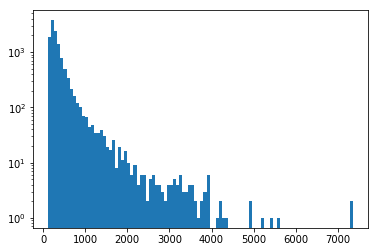

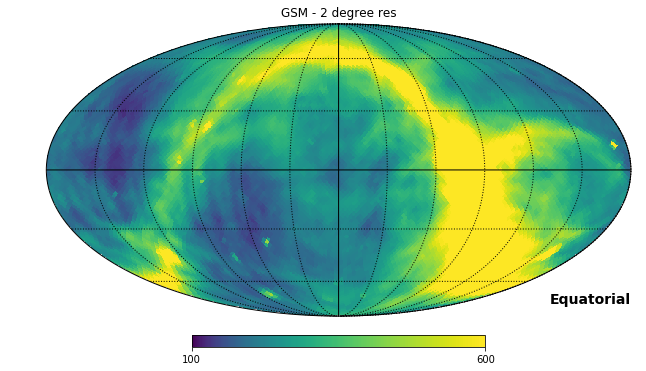

In [256]:
# GSM map with two degrees resolution
GSM32_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits'
hdul = fits.open(GSM32_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM32_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 2 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 119.61854632832329 12303.862241998748
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Bright_Pixels_Data: [[ -9.59406823 -41.01449967 -16.33482278 -34.95386526 -49.70239033
  -30.         -40.22818473 -13.24801491 -12.63562509 -39.45089471
  -10.80692287 -17.58277601 -21.38194258 -44.99388015 -42.60980698
  -11.41515774 -19.47122063 -45.78396716 -53.57223328 -52.80185378
  -32.7971683  -50.48004426 -23.96948232 -15.0947871  -20.74237995
  -37.16889966 -40.22818473  -6.57959294 -10.19991809 -32.08995126
  -32.7971683  -38.68218745 -46.57184741 -37.92165078 -52.02972742
  -48.1412

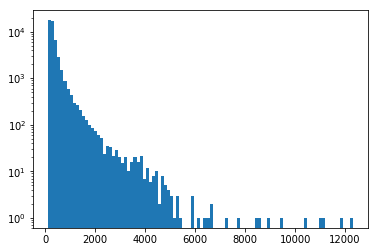

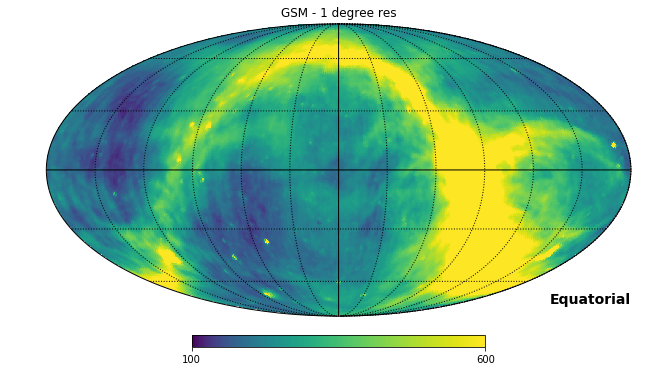

In [257]:
# GSM map with 1 degree resolution
GSM64_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM64_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 119.61854632832329 12303.862241998748
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Bright_Pixels_Data: [[-25.61308322 -25.94447977 -26.27681156 -34.95386526 -30.
  -31.03924001 -20.74237995 -22.02431284 -24.62431835 -22.3465879
  -26.94435818 -21.38194258  40.62018519 -32.08995126 -31.73839424
  -47.35757623 -47.74965083 -21.0618176  -25.94447977 -30.69158768
  -26.61009781 -22.3465879  -31.38816646 -21.0618176  -34.59057498
  -28.63098984 -22.99339431 -23.96948232 -46.57184741 -47.35757623
  -31.03924001 -22.66960987 -30.69158768 -22.02431284 -27.61588198
  -27.27961274 -28.

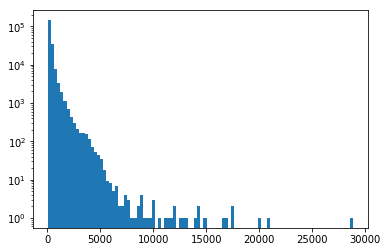

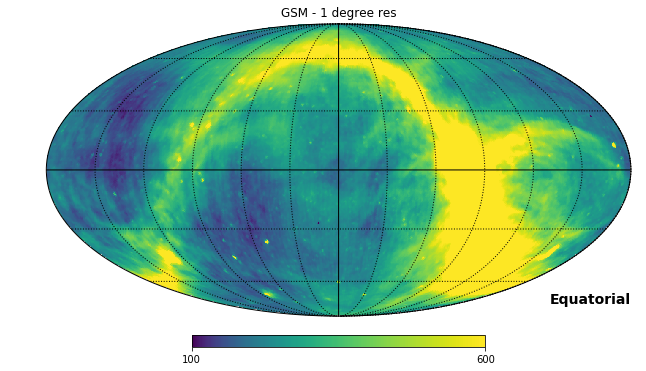

In [258]:
# GSM map with 1 degree resolution
GSM128_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard128-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM128_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 128
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))